In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-v0_8")

 # Loading the data

In [3]:
YEARS = [year for year in range(2015, 2024)]
DATASET_DIR = "./dataset"

dfs = []
for year in YEARS:
    dataset_path = f"{DATASET_DIR}/{year}.csv"
    dfs.append(pd.read_csv(dataset_path).assign(year=year))

df_2023 = pd.read_csv(f"{DATASET_DIR}/2023.csv")

# Processing the data

In [4]:
all_dfs = pd.concat(dfs)

In [5]:
df = all_dfs.copy()

# 2015 - 2023 DataFrame
# Country
df["country"] = df["Country"].fillna(df["Country or region"]).fillna(df["Country name"])
df.drop(columns=["Country or region", "Country name"], inplace=True)
df = df[df["country"] != "xx"]
df["country"].replace({"Turkey": "Turkiye", "Macedonia": "North Macedonia", "Czech Republic": "Czechia", "Taiwan": "Taiwan Province of China", "Palestinian Territories": "State of Palestine"}, inplace=True)
df["country"].replace({"Hong Kong": "Hong Kong S.A.R. of China", "Hong Kong, S.A.R. of China": "Hong Kong S.A.R. of China", "Hong Kong S.A.R., China": "Hong Kong S.A.R. of China"}, inplace=True)
df["country"] = df["country"].str.replace(r"(.+)\*", lambda m: m.group(1), regex=True)

# Region
df["region"] = df["country"].replace(df[["country", "Region"]].set_index("country").dropna().to_dict()["Region"])

# Happiness score
df["happiness_score"] = df["Happiness Score"].fillna(df["Happiness.Score"])\
                                             .fillna(df["Score"])\
                                             .fillna(df["Ladder score"])\
                                             .fillna(df["Happiness score"])\
                                             .astype(str).str.replace(",", ".").astype(float)

df = df[["year", "country", "region", "happiness_score"]]

# 2023 DataFrame
df_2023 = df_2023.rename(columns={'Country name': 'country', 'Ladder score': 'happiness_score', 'Logged GDP per capita': "gdp", "Social support": "social_support", "Healthy life expectancy": "life_expectancy", "Freedom to make life choices": "freedom", "Generosity": "generosity", "Perceptions of corruption": "corruption"})
df_2023['region'] = df_2023["country"].replace(df[df['year'] == 2015][["country", "region"]].set_index("country").dropna().to_dict()["region"]) 
df_2023 = df_2023[["country", "region", "happiness_score", "gdp", "social_support", "life_expectancy", "freedom", "generosity", "corruption"]]
df_2023['region'] = df_2023['region'].replace({"Namibia": "Sub-Saharan Africa", "Gambia": "Sub-Saharan Africa"})

In [6]:
print(df['country'].value_counts().to_string())

Switzerland                  9
Lebanon                      9
North Macedonia              9
Albania                      9
Bosnia and Herzegovina       9
Dominican Republic           9
Mongolia                     9
Greece                       9
Hungary                      9
South Africa                 9
Honduras                     9
Tajikistan                   9
Tunisia                      9
Bangladesh                   9
Iran                         9
Ukraine                      9
Morocco                      9
Philippines                  9
Latvia                       9
Portugal                     9
Serbia                       9
Iceland                      9
Zambia                       9
China                        9
Montenegro                   9
Jordan                       9
Pakistan                     9
Nigeria                      9
Kyrgyzstan                   9
Turkiye                      9
Vietnam                      9
Indonesia                    9
Estonia 

# 2023 data

In [7]:
df_2023.describe()

,happiness_score,gdp,social_support,life_expectancy,freedom,generosity,corruption
count,137.000000,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000
mean,5.539796,9.449796,0.799073,64.967632,0.787394,0.022431,0.725401
std,1.139929,1.207302,0.129222,5.750390,0.112371,0.141707,0.176956
min,1.859000,5.527000,0.341000,51.530000,0.382000,-0.254000,0.146000
25%,4.724000,8.591000,0.722000,60.648500,0.724000,-0.074000,0.668000
50%,5.684000,9.567000,0.827000,65.837500,0.801000,0.001000,0.774000
75%,6.334000,10.540000,0.896000,69.412500,0.874000,0.117000,0.846000
max,7.804000,11.660000,0.983000,77.280000,0.961000,0.531000,0.929000


In [8]:
df_2023['region'].value_counts()

Sub-Saharan Africa                 33
Central and Eastern Europe         26
Western Europe                     20
Latin America and Caribbean        19
Middle East and Northern Africa    14
Southeastern Asia                   9
Eastern Asia                        6
Southern Asia                       6
Australia and New Zealand           2
North America                       2
Name: region, dtype: int64

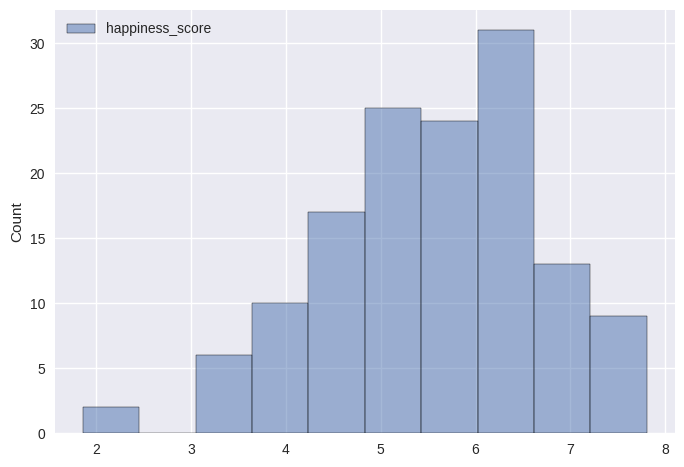

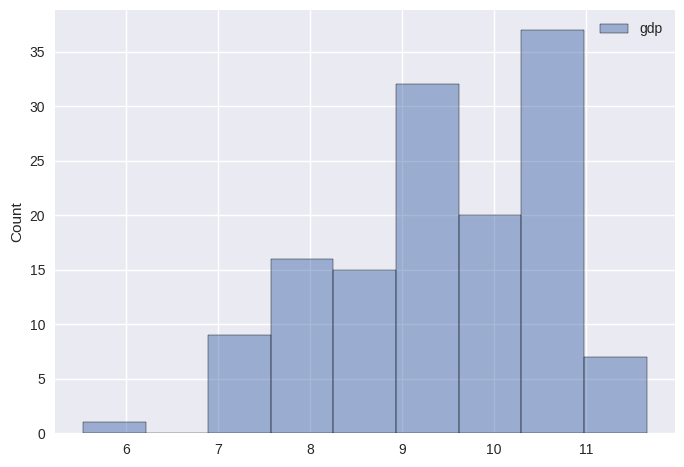

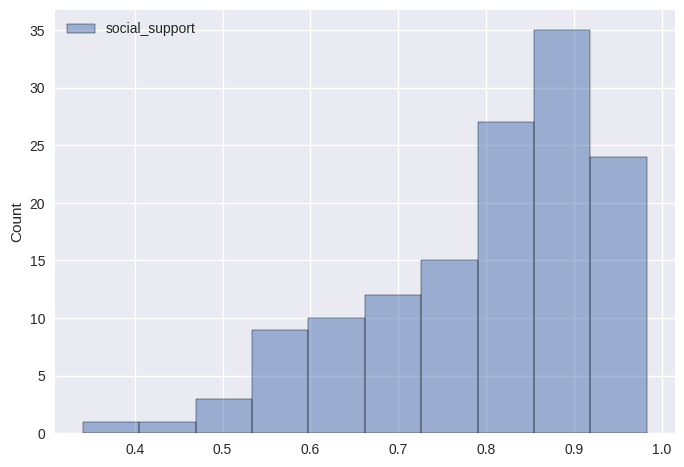

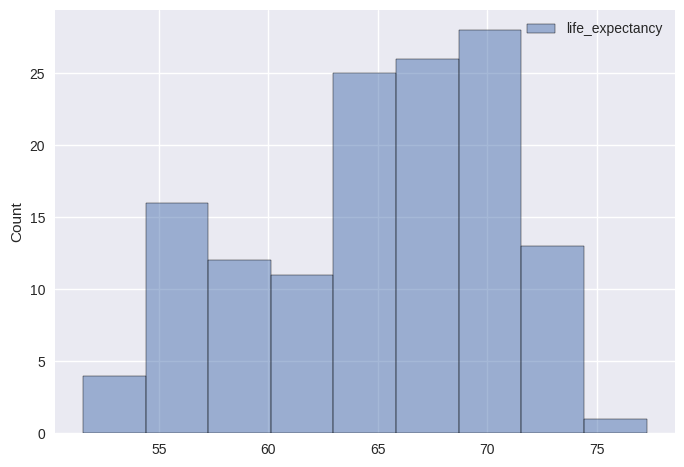

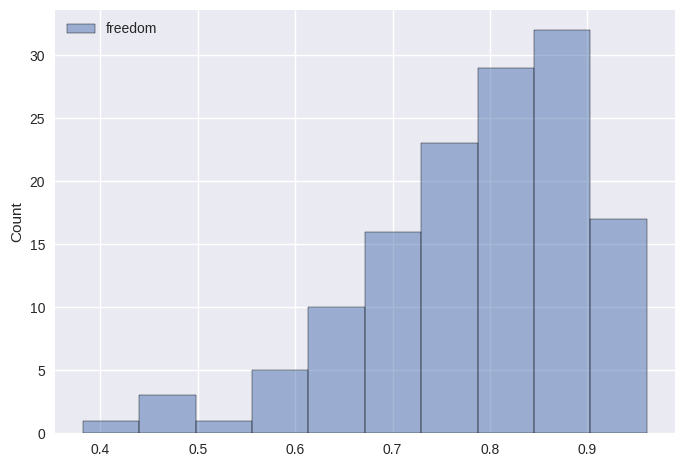

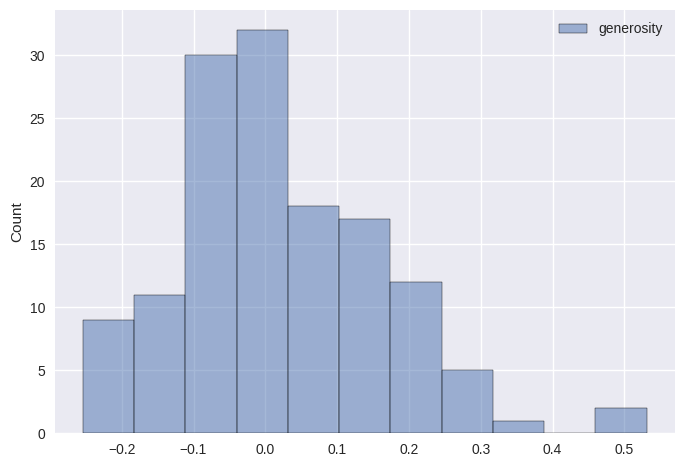

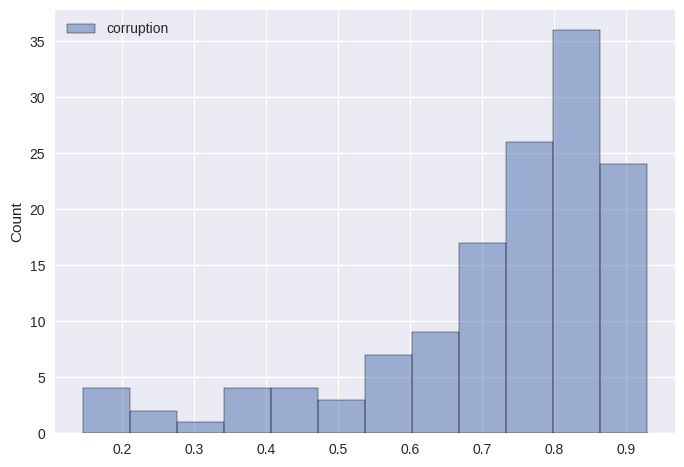

In [9]:
for column in df_2023.columns[2:]:
    sns.histplot(df_2023[[column]])
    plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Western Europe'),
  Text(1, 0, 'Middle East and Northern Africa'),
  Text(2, 0, 'Australia and New Zealand'),
  Text(3, 0, 'North America'),
  Text(4, 0, 'Central and Eastern Europe'),
  Text(5, 0, 'Latin America and Caribbean'),
  Text(6, 0, 'Southeastern Asia'),
  Text(7, 0, 'Eastern Asia'),
  Text(8, 0, 'Sub-Saharan Africa'),
  Text(9, 0, 'Southern Asia')])

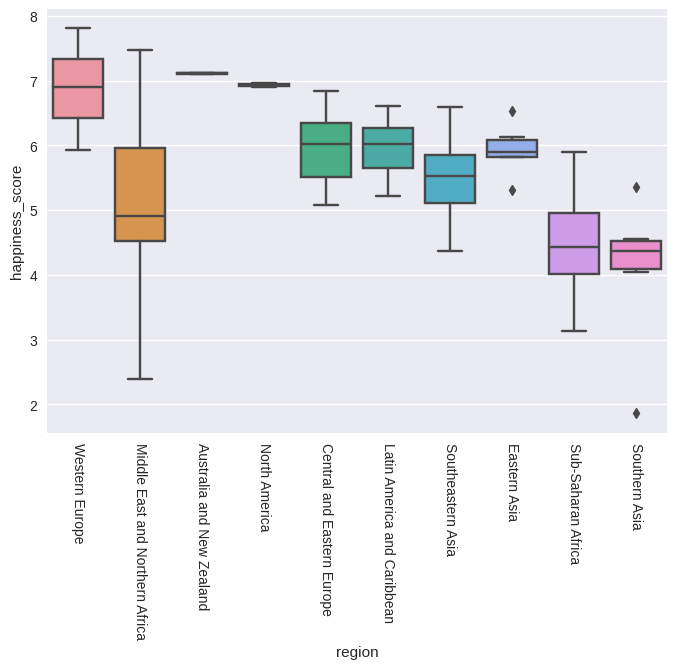

In [10]:
sns.boxplot(x=df_2023['region'], y=df_2023['happiness_score'])
plt.xticks(rotation=-90)

In [22]:
print(df_2023[df_2023['region'] == "Western Europe"]['happiness_score'].median())
print(df_2023[df_2023['region'] == "Sub-Saharan Africa"]['happiness_score'].median())
print(df_2023[df_2023['region'] == "Southern Asia"]['happiness_score'].median())

6.9015
4.432
4.362


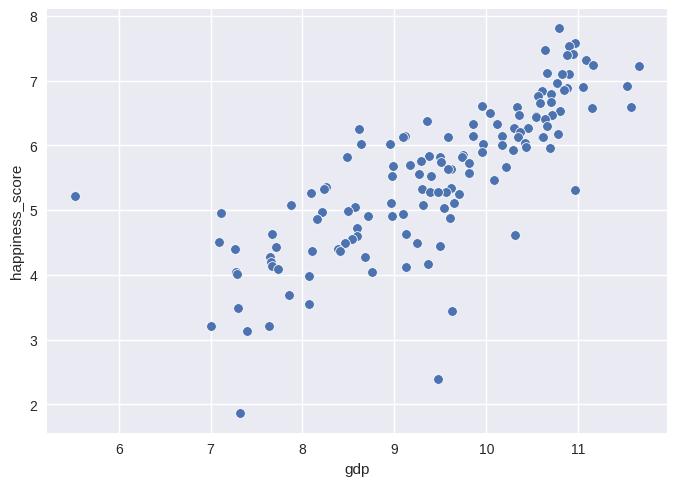

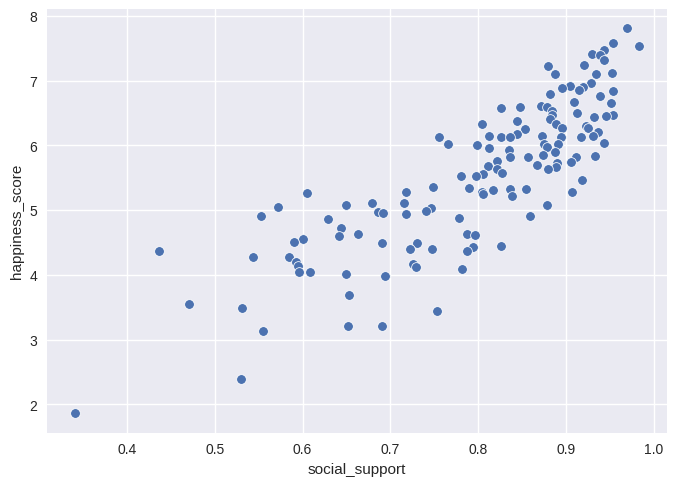

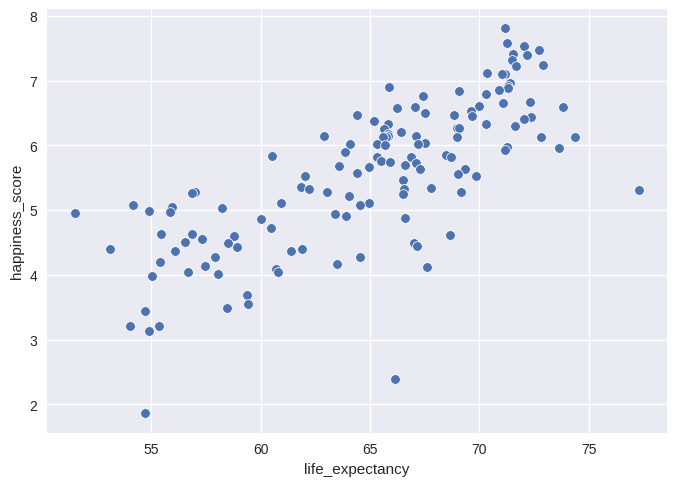

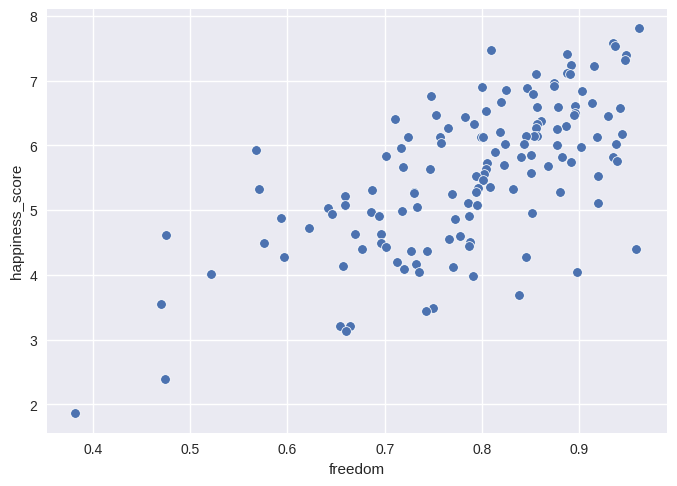

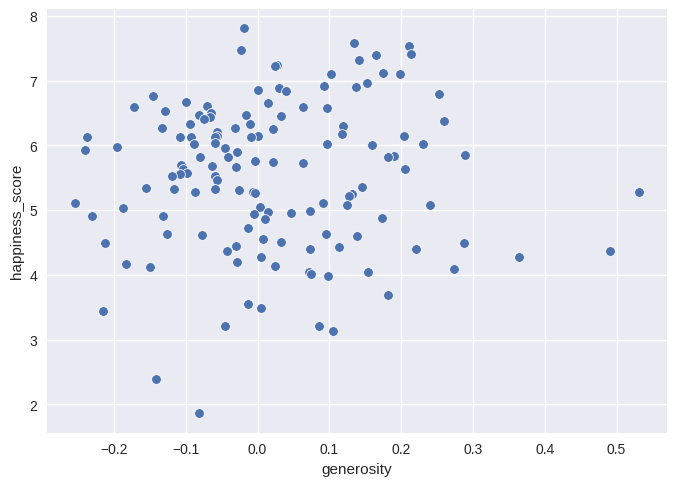

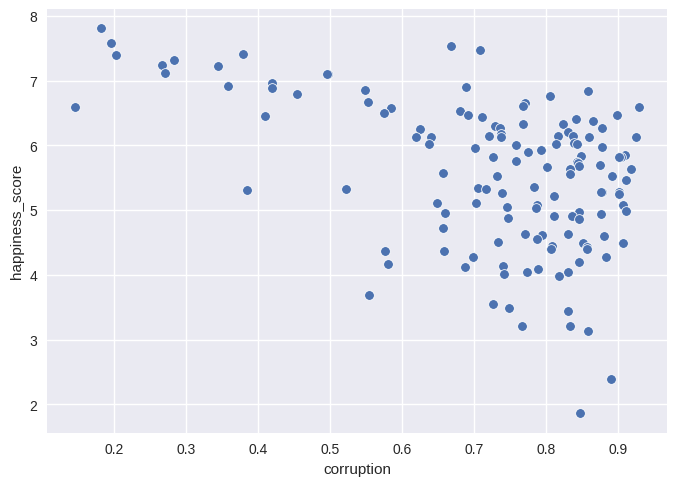

In [24]:
for factor in df_2023.columns[3:]:
    sns.scatterplot(x=df_2023[factor], y=df_2023['happiness_score'])
    plt.show()

# 2015 - 2023 data

In [12]:
df.describe()

,year,happiness_score
count,1367.000000,1367.000000
mean,2018.903438,5.441086
std,2.561006,1.117909
min,2015.000000,1.859000
25%,2017.000000,4.599500
50%,2019.000000,5.440000
75%,2021.000000,6.256300
max,2023.000000,7.842000


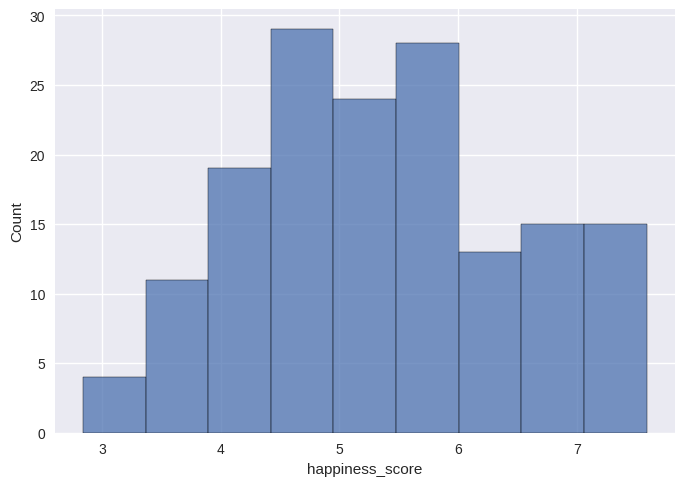

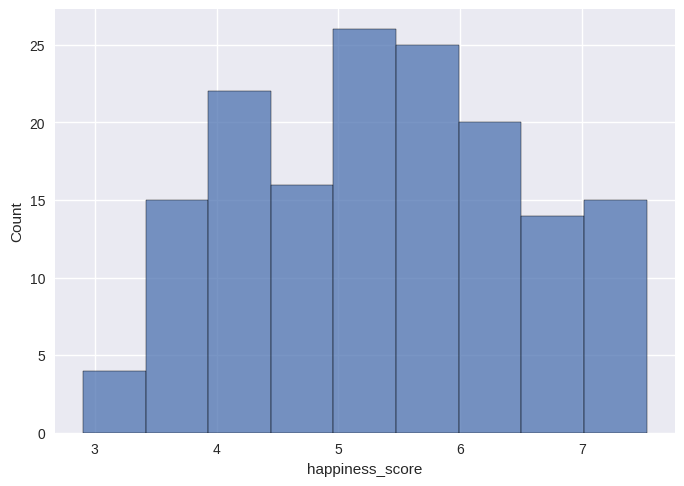

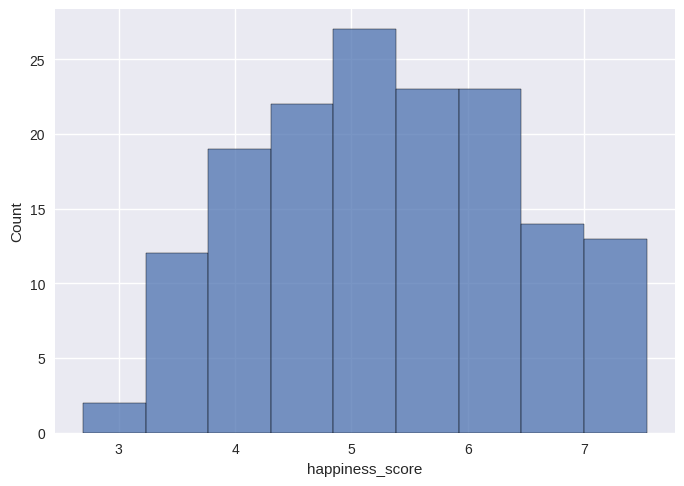

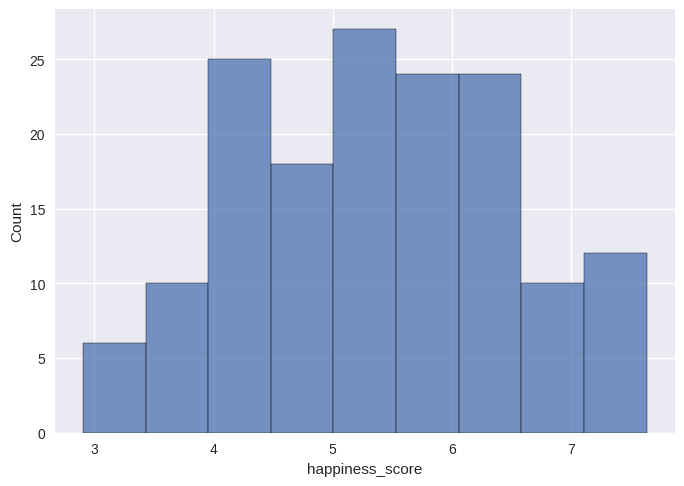

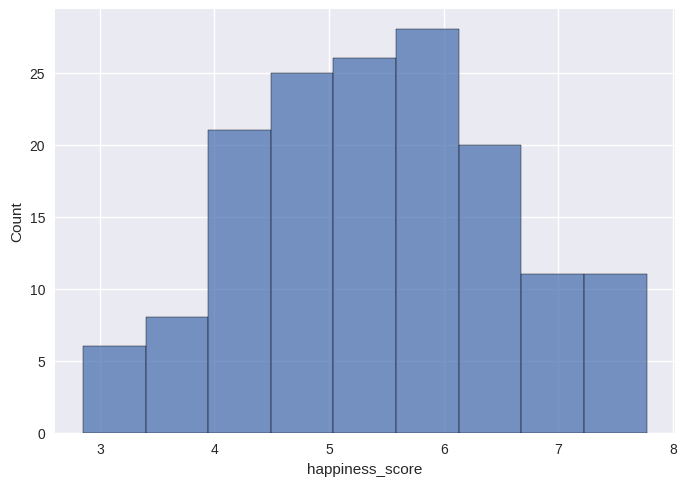

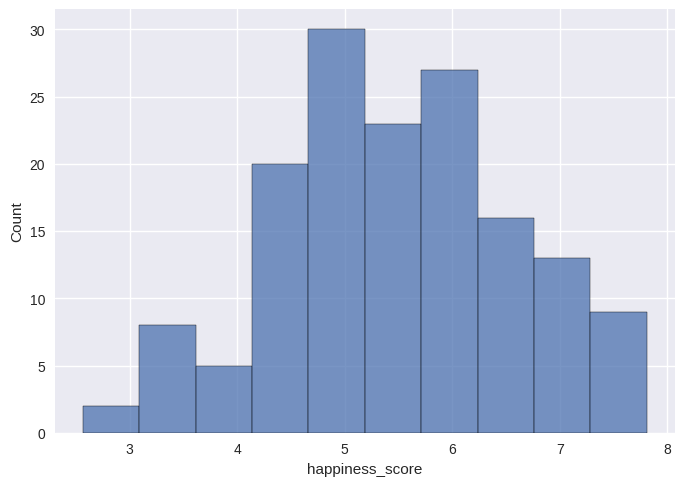

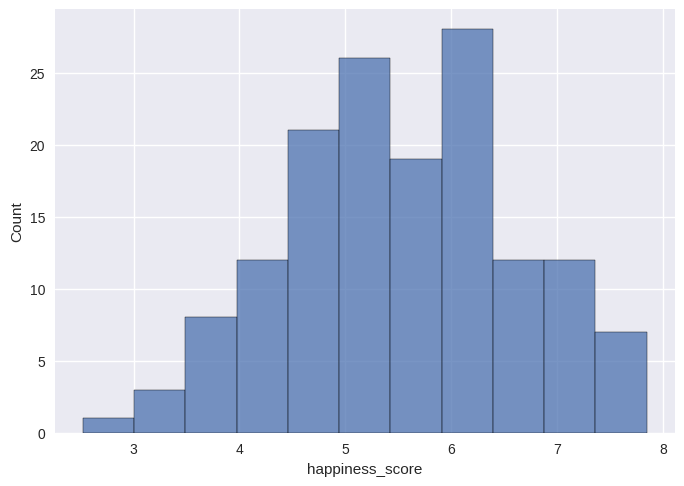

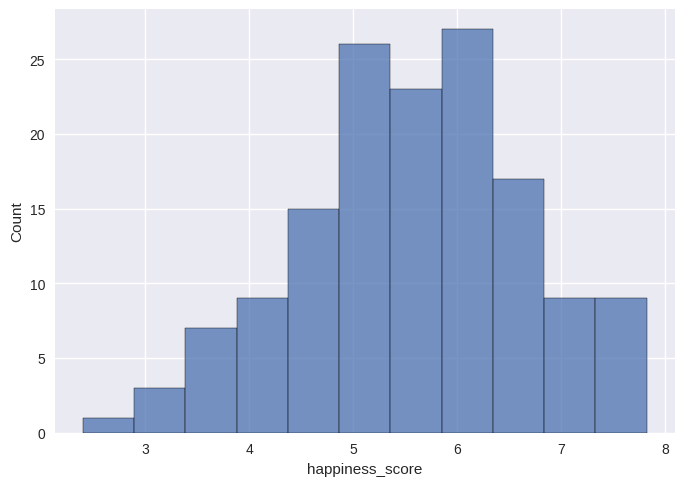

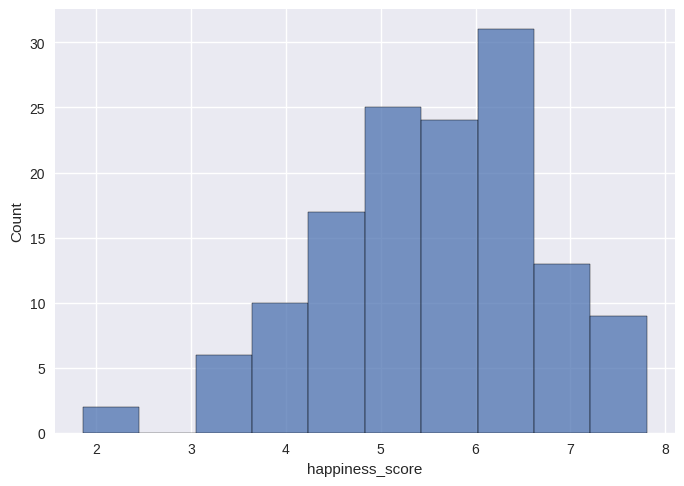

In [13]:
for year in range(2015, 2024):
    df_year = df[df['year'] == year]
    sns.histplot(df_year['happiness_score'])
    plt.show()

Switzerland
   year      country          region  happiness_score
0  2015  Switzerland  Western Europe           7.5870
1  2016  Switzerland  Western Europe           7.5090
3  2017  Switzerland  Western Europe           7.4940
4  2018  Switzerland  Western Europe           7.4870
5  2019  Switzerland  Western Europe           7.4800
2  2020  Switzerland  Western Europe           7.5599
2  2021  Switzerland  Western Europe           7.5710
3  2022  Switzerland  Western Europe           7.5120
7  2023  Switzerland  Western Europe           7.2400


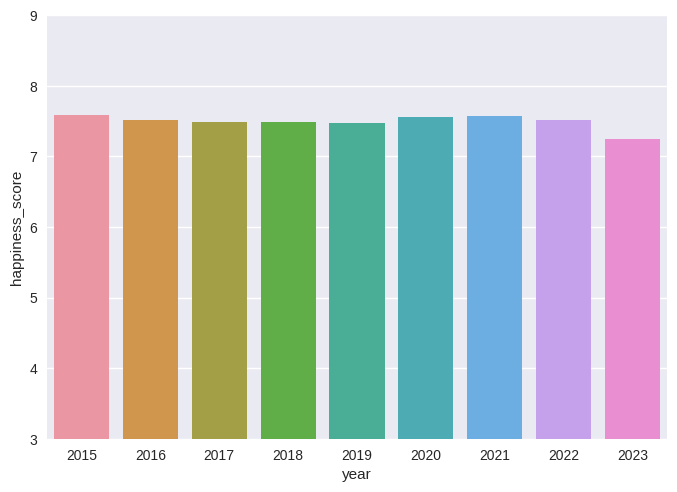

Iceland
   year  country          region  happiness_score
1  2015  Iceland  Western Europe           7.5610
2  2016  Iceland  Western Europe           7.5010
2  2017  Iceland  Western Europe           7.5040
3  2018  Iceland  Western Europe           7.4950
3  2019  Iceland  Western Europe           7.4940
3  2020  Iceland  Western Europe           7.5045
3  2021  Iceland  Western Europe           7.5540
2  2022  Iceland  Western Europe           7.5570
2  2023  Iceland  Western Europe           7.5300


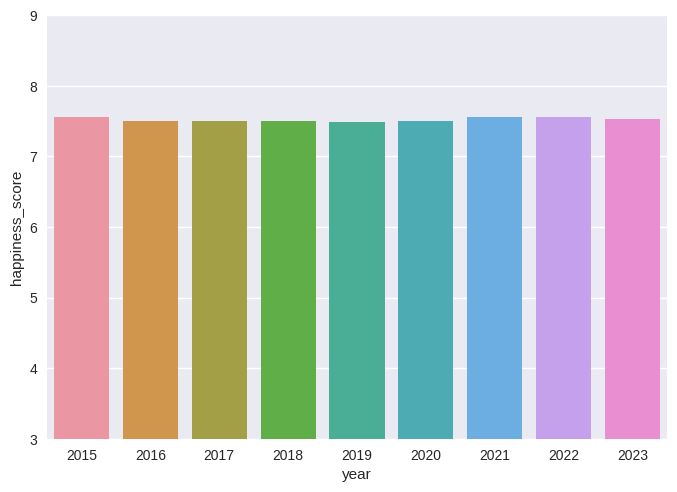

Denmark
   year  country          region  happiness_score
2  2015  Denmark  Western Europe           7.5270
0  2016  Denmark  Western Europe           7.5260
1  2017  Denmark  Western Europe           7.5220
2  2018  Denmark  Western Europe           7.5550
1  2019  Denmark  Western Europe           7.6000
1  2020  Denmark  Western Europe           7.6456
1  2021  Denmark  Western Europe           7.6200
1  2022  Denmark  Western Europe           7.6360
1  2023  Denmark  Western Europe           7.5860


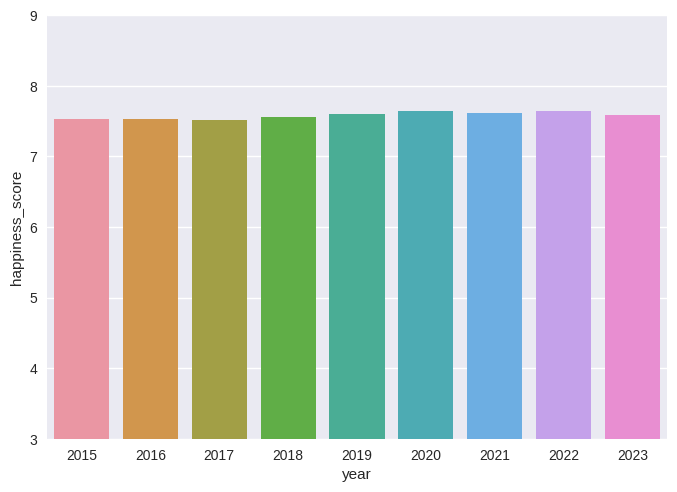

Norway
   year country          region  happiness_score
3  2015  Norway  Western Europe            7.522
3  2016  Norway  Western Europe            7.498
0  2017  Norway  Western Europe            7.537
1  2018  Norway  Western Europe            7.594
2  2019  Norway  Western Europe            7.554
4  2020  Norway  Western Europe            7.488
5  2021  Norway  Western Europe            7.392
7  2022  Norway  Western Europe            7.365
6  2023  Norway  Western Europe            7.315


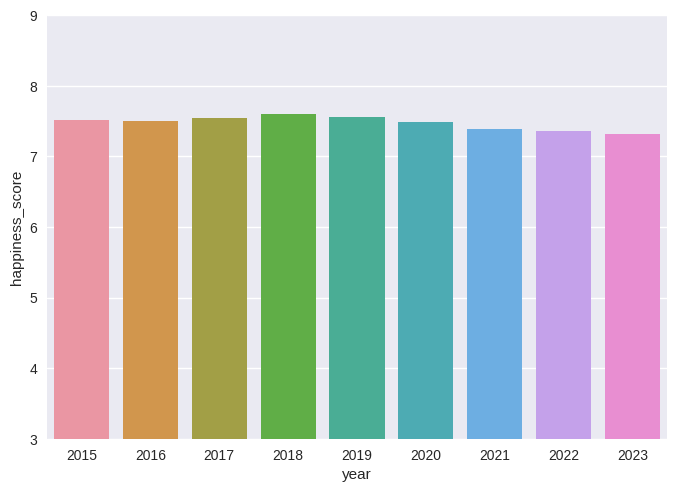

Canada
    year country         region  happiness_score
4   2015  Canada  North America           7.4270
5   2016  Canada  North America           7.4040
6   2017  Canada  North America           7.3160
6   2018  Canada  North America           7.3280
8   2019  Canada  North America           7.2780
10  2020  Canada  North America           7.2321
13  2021  Canada  North America           7.1030
14  2022  Canada  North America           7.0250
12  2023  Canada  North America           6.9610


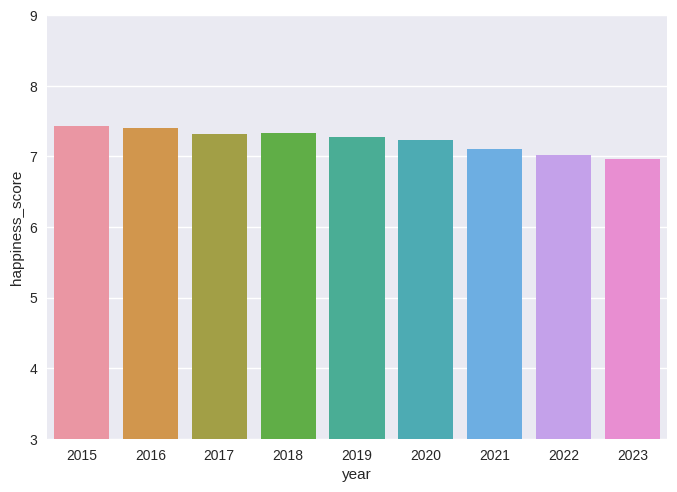

Finland
   year  country          region  happiness_score
5  2015  Finland  Western Europe           7.4060
4  2016  Finland  Western Europe           7.4130
4  2017  Finland  Western Europe           7.4690
0  2018  Finland  Western Europe           7.6320
0  2019  Finland  Western Europe           7.7690
0  2020  Finland  Western Europe           7.8087
0  2021  Finland  Western Europe           7.8420
0  2022  Finland  Western Europe           7.8210
0  2023  Finland  Western Europe           7.8040


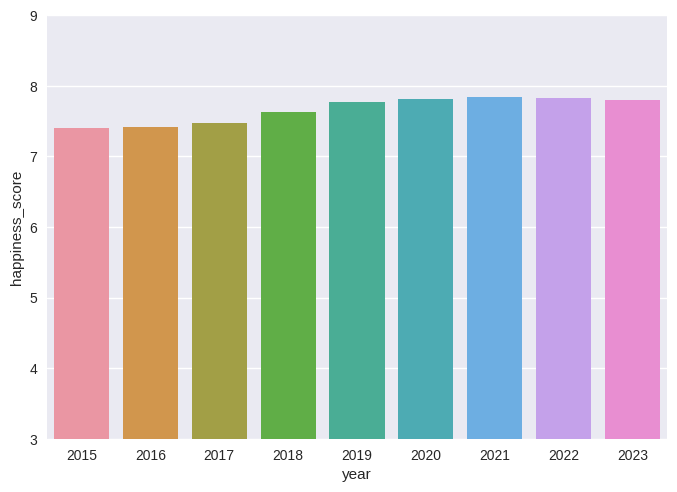

Netherlands
   year      country          region  happiness_score
6  2015  Netherlands  Western Europe           7.3780
6  2016  Netherlands  Western Europe           7.3390
5  2017  Netherlands  Western Europe           7.3770
5  2018  Netherlands  Western Europe           7.4410
4  2019  Netherlands  Western Europe           7.4880
5  2020  Netherlands  Western Europe           7.4489
4  2021  Netherlands  Western Europe           7.4640
4  2022  Netherlands  Western Europe           7.4150
4  2023  Netherlands  Western Europe           7.4030


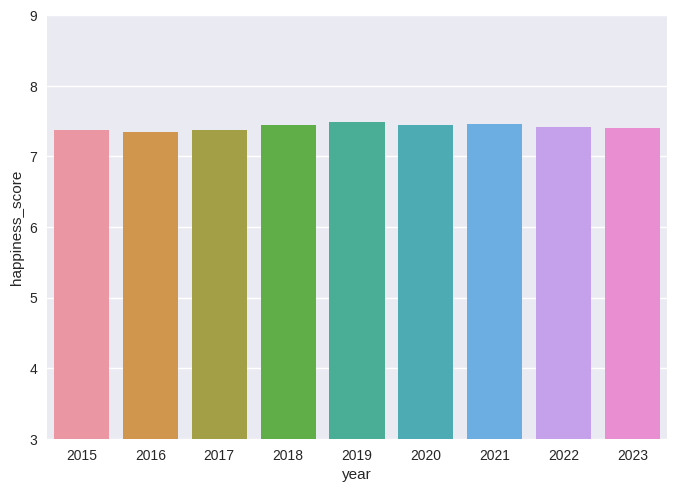

Sweden
   year country          region  happiness_score
7  2015  Sweden  Western Europe           7.3640
9  2016  Sweden  Western Europe           7.2910
8  2017  Sweden  Western Europe           7.2840
8  2018  Sweden  Western Europe           7.3140
6  2019  Sweden  Western Europe           7.3430
6  2020  Sweden  Western Europe           7.3535
6  2021  Sweden  Western Europe           7.3630
6  2022  Sweden  Western Europe           7.3840
5  2023  Sweden  Western Europe           7.3950


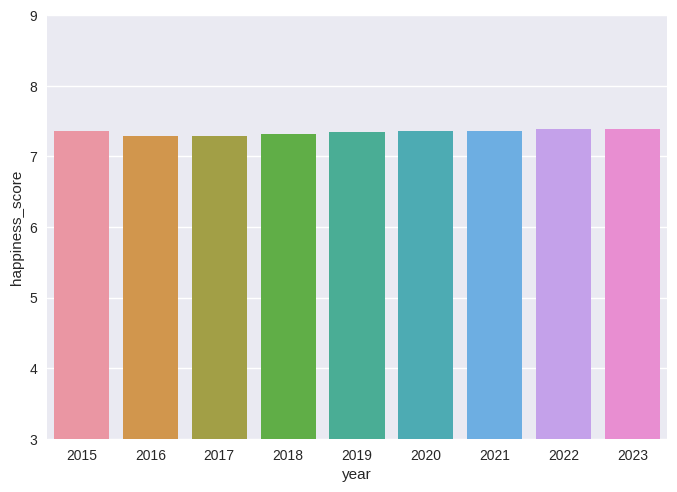

New Zealand
   year      country                     region  happiness_score
8  2015  New Zealand  Australia and New Zealand           7.2860
7  2016  New Zealand  Australia and New Zealand           7.3340
7  2017  New Zealand  Australia and New Zealand           7.3140
7  2018  New Zealand  Australia and New Zealand           7.3240
7  2019  New Zealand  Australia and New Zealand           7.3070
7  2020  New Zealand  Australia and New Zealand           7.2996
8  2021  New Zealand  Australia and New Zealand           7.2770
9  2022  New Zealand  Australia and New Zealand           7.2000
9  2023  New Zealand  Australia and New Zealand           7.1230


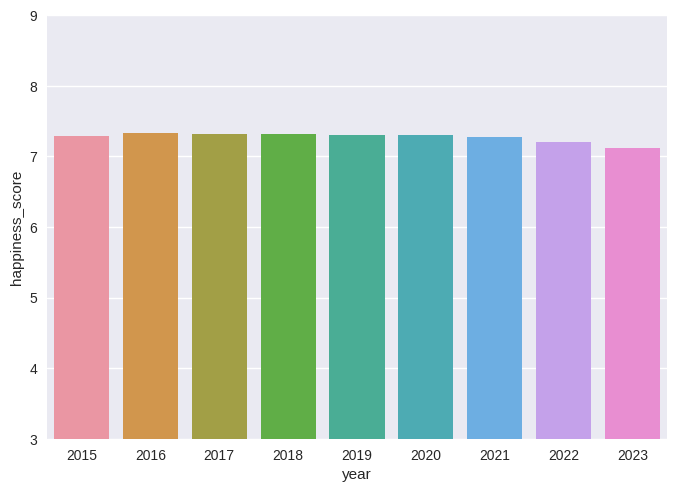

Australia
    year    country                     region  happiness_score
9   2015  Australia  Australia and New Zealand           7.2840
8   2016  Australia  Australia and New Zealand           7.3130
9   2017  Australia  Australia and New Zealand           7.2840
9   2018  Australia  Australia and New Zealand           7.2720
10  2019  Australia  Australia and New Zealand           7.2280
11  2020  Australia  Australia and New Zealand           7.2228
10  2021  Australia  Australia and New Zealand           7.1830
11  2022  Australia  Australia and New Zealand           7.1620
11  2023  Australia  Australia and New Zealand           7.0950


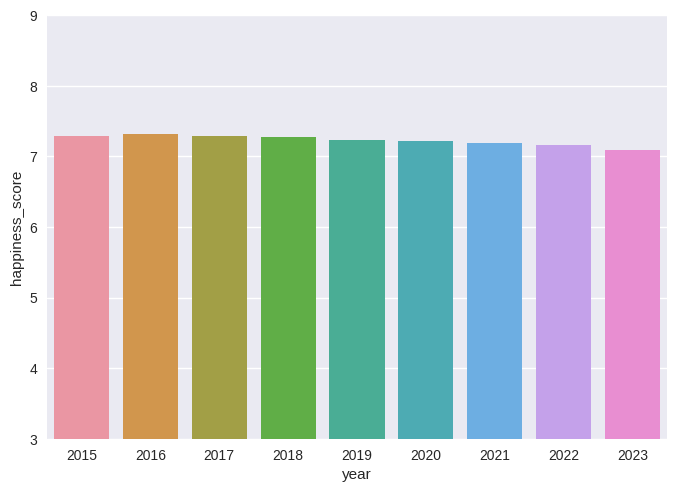

Israel
    year country                           region  happiness_score
10  2015  Israel  Middle East and Northern Africa           7.2780
10  2016  Israel  Middle East and Northern Africa           7.2670
10  2017  Israel  Middle East and Northern Africa           7.2130
18  2018  Israel  Middle East and Northern Africa           6.8140
12  2019  Israel  Middle East and Northern Africa           7.1390
13  2020  Israel  Middle East and Northern Africa           7.1286
11  2021  Israel  Middle East and Northern Africa           7.1570
8   2022  Israel  Middle East and Northern Africa           7.3640
3   2023  Israel  Middle East and Northern Africa           7.4730


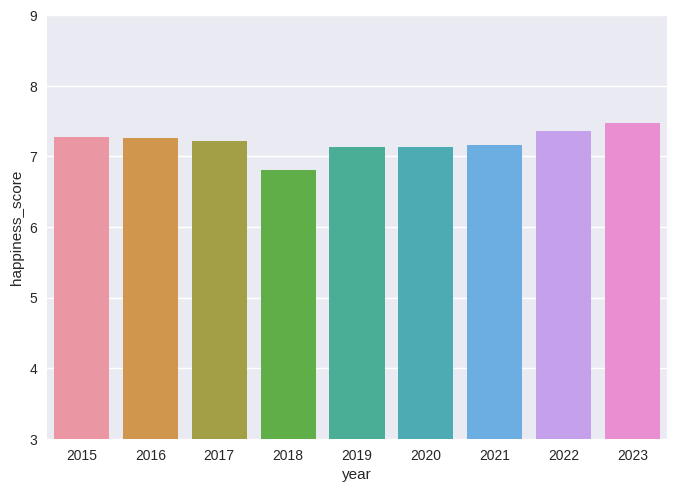

Costa Rica
    year     country                       region  happiness_score
11  2015  Costa Rica  Latin America and Caribbean           7.2260
13  2016  Costa Rica  Latin America and Caribbean           7.0870
11  2017  Costa Rica  Latin America and Caribbean           7.0790
12  2018  Costa Rica  Latin America and Caribbean           7.0720
11  2019  Costa Rica  Latin America and Caribbean           7.1670
14  2020  Costa Rica  Latin America and Caribbean           7.1214
15  2021  Costa Rica  Latin America and Caribbean           7.0690
22  2022  Costa Rica  Latin America and Caribbean           6.5820
22  2023  Costa Rica  Latin America and Caribbean           6.6090


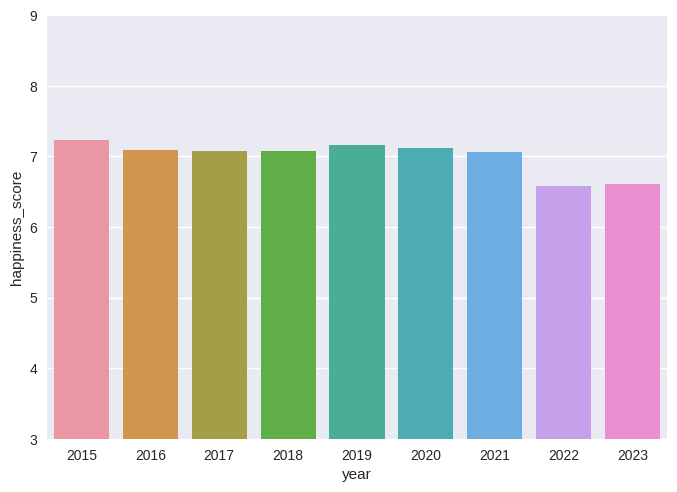

Austria
    year  country          region  happiness_score
12  2015  Austria  Western Europe           7.2000
11  2016  Austria  Western Europe           7.1190
12  2017  Austria  Western Europe           7.0060
11  2018  Austria  Western Europe           7.1390
9   2019  Austria  Western Europe           7.2460
8   2020  Austria  Western Europe           7.2942
9   2021  Austria  Western Europe           7.2680
10  2022  Austria  Western Europe           7.1630
10  2023  Austria  Western Europe           7.0970


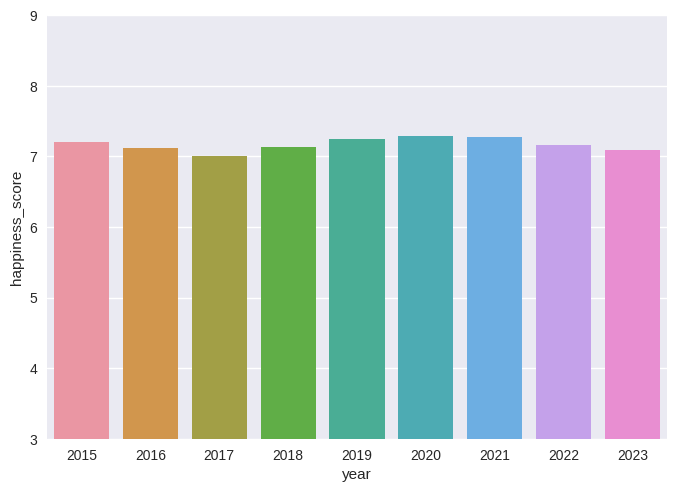

Mexico
    year country                       region  happiness_score
13  2015  Mexico  Latin America and Caribbean            7.187
20  2016  Mexico  Latin America and Caribbean            6.778
24  2017  Mexico  Latin America and Caribbean            6.578
23  2018  Mexico  Latin America and Caribbean            6.488
22  2019  Mexico  Latin America and Caribbean            6.595
23  2020  Mexico  Latin America and Caribbean            6.465
35  2021  Mexico  Latin America and Caribbean            6.317
45  2022  Mexico  Latin America and Caribbean            6.128
35  2023  Mexico  Latin America and Caribbean            6.330


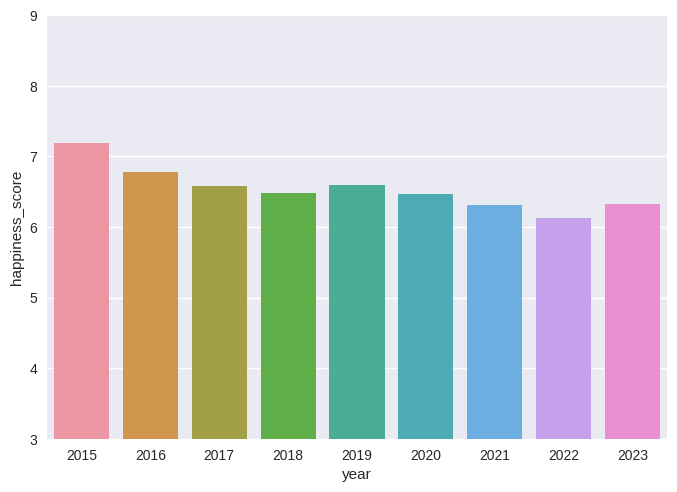

United States
    year        country         region  happiness_score
14  2015  United States  North America           7.1190
12  2016  United States  North America           7.1040
13  2017  United States  North America           6.9930
17  2018  United States  North America           6.8860
18  2019  United States  North America           6.8920
17  2020  United States  North America           6.9396
18  2021  United States  North America           6.9510
15  2022  United States  North America           6.9770
14  2023  United States  North America           6.8940


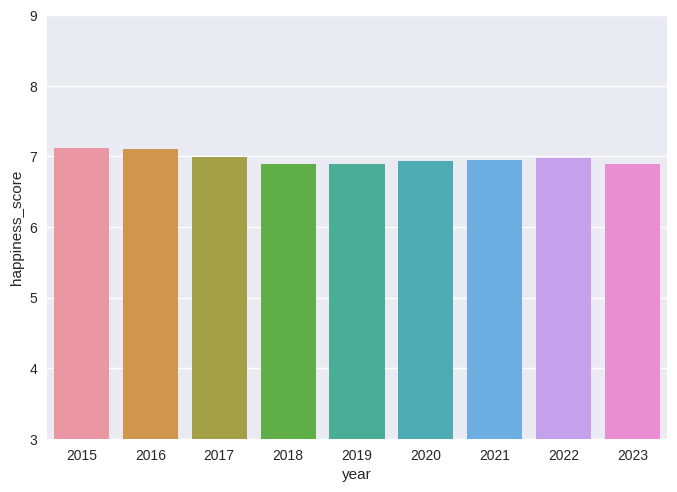

Brazil
    year country                       region  happiness_score
15  2015  Brazil  Latin America and Caribbean           6.9830
16  2016  Brazil  Latin America and Caribbean           6.9520
21  2017  Brazil  Latin America and Caribbean           6.6350
27  2018  Brazil  Latin America and Caribbean           6.4190
31  2019  Brazil  Latin America and Caribbean           6.3000
31  2020  Brazil  Latin America and Caribbean           6.3756
34  2021  Brazil  Latin America and Caribbean           6.3300
37  2022  Brazil  Latin America and Caribbean           6.2930
48  2023  Brazil  Latin America and Caribbean           6.1250


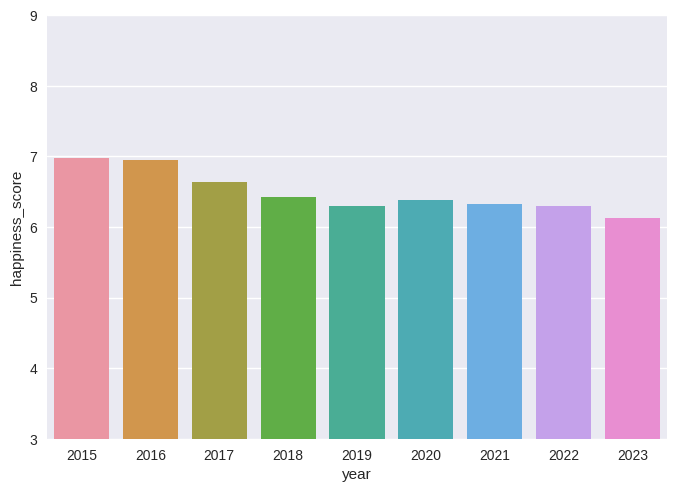

Luxembourg
    year     country          region  happiness_score
16  2015  Luxembourg  Western Europe           6.9460
19  2016  Luxembourg  Western Europe           6.8710
17  2017  Luxembourg  Western Europe           6.8630
16  2018  Luxembourg  Western Europe           6.9100
13  2019  Luxembourg  Western Europe           7.0900
9   2020  Luxembourg  Western Europe           7.2375
7   2021  Luxembourg  Western Europe           7.3240
5   2022  Luxembourg  Western Europe           7.4040
8   2023  Luxembourg  Western Europe           7.2280


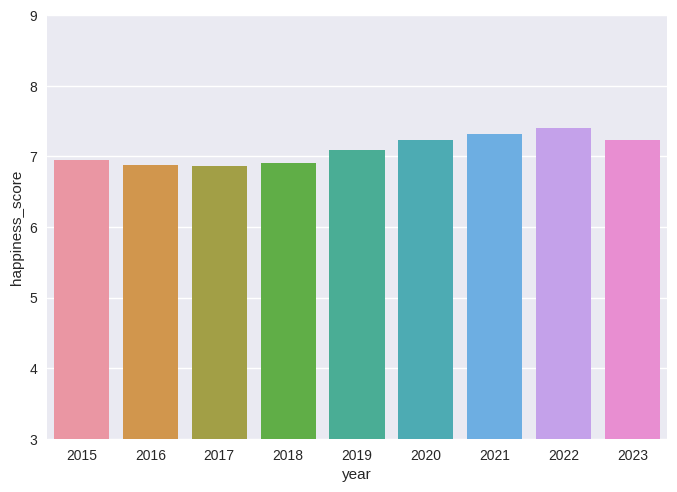

Ireland
    year  country          region  happiness_score
17  2015  Ireland  Western Europe           6.9400
18  2016  Ireland  Western Europe           6.9070
14  2017  Ireland  Western Europe           6.9770
13  2018  Ireland  Western Europe           6.9770
15  2019  Ireland  Western Europe           7.0210
15  2020  Ireland  Western Europe           7.0937
14  2021  Ireland  Western Europe           7.0850
12  2022  Ireland  Western Europe           7.0410
13  2023  Ireland  Western Europe           6.9110


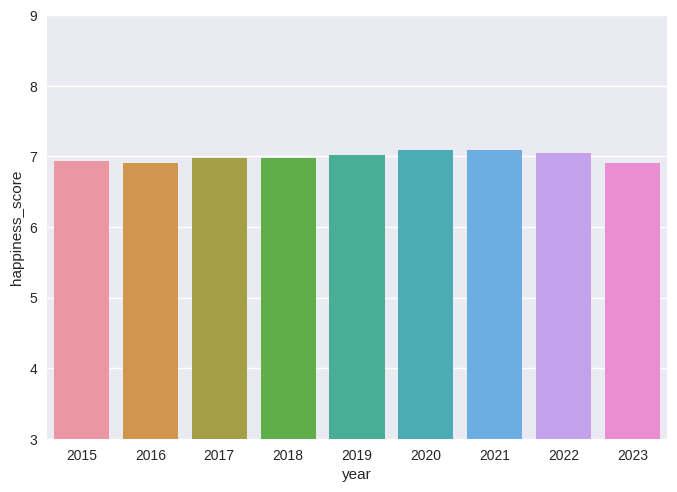

Belgium
    year  country          region  happiness_score
18  2015  Belgium  Western Europe           6.9370
17  2016  Belgium  Western Europe           6.9290
16  2017  Belgium  Western Europe           6.8910
15  2018  Belgium  Western Europe           6.9270
17  2019  Belgium  Western Europe           6.9230
19  2020  Belgium  Western Europe           6.8635
19  2021  Belgium  Western Europe           6.8340
18  2022  Belgium  Western Europe           6.8050
16  2023  Belgium  Western Europe           6.8590


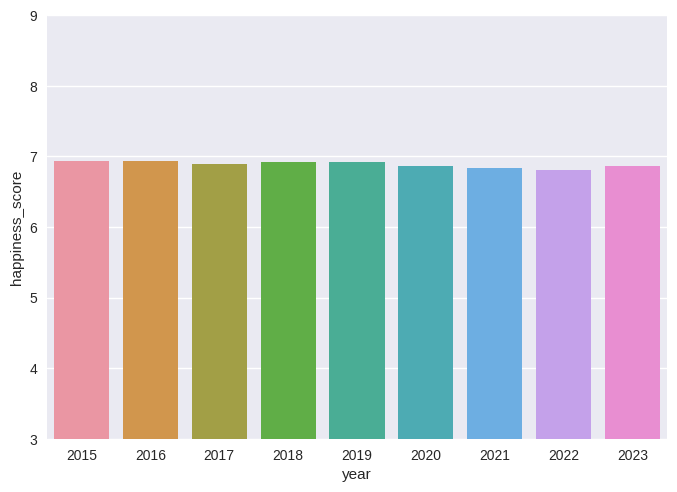

United Arab Emirates
    year               country                           region  \
19  2015  United Arab Emirates  Middle East and Northern Africa   
27  2016  United Arab Emirates  Middle East and Northern Africa   
20  2017  United Arab Emirates  Middle East and Northern Africa   
19  2018  United Arab Emirates  Middle East and Northern Africa   
20  2019  United Arab Emirates  Middle East and Northern Africa   
20  2020  United Arab Emirates  Middle East and Northern Africa   
24  2021  United Arab Emirates  Middle East and Northern Africa   
23  2022  United Arab Emirates  Middle East and Northern Africa   
25  2023  United Arab Emirates  Middle East and Northern Africa   

    happiness_score  
19           6.9010  
27           6.5730  
20           6.6480  
19           6.7740  
20           6.8250  
20           6.7908  
24           6.5610  
23           6.5760  
25           6.5710  


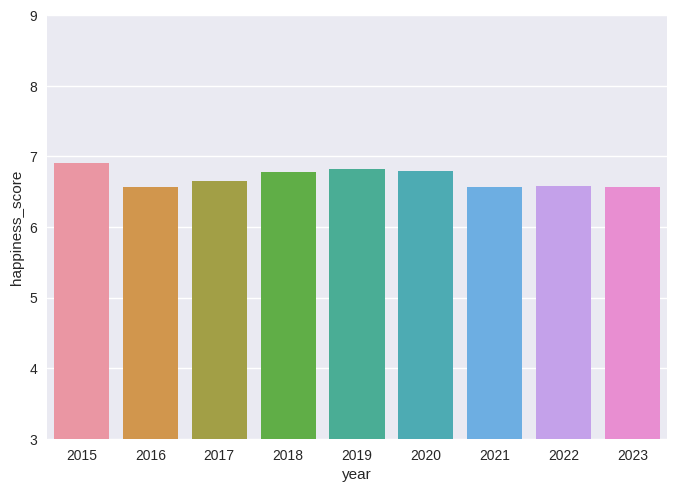

United Kingdom
    year         country          region  happiness_score
20  2015  United Kingdom  Western Europe           6.8670
22  2016  United Kingdom  Western Europe           6.7250
18  2017  United Kingdom  Western Europe           6.7140
10  2018  United Kingdom  Western Europe           7.1900
14  2019  United Kingdom  Western Europe           7.0540
12  2020  United Kingdom  Western Europe           7.1645
16  2021  United Kingdom  Western Europe           7.0640
16  2022  United Kingdom  Western Europe           6.9430
18  2023  United Kingdom  Western Europe           6.7960


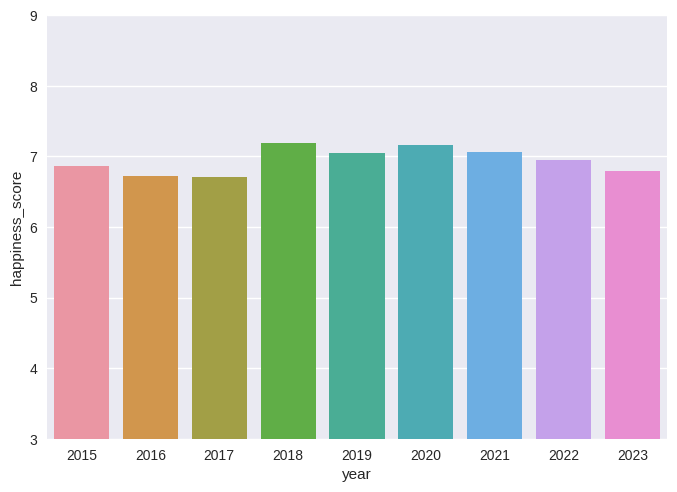

Oman
    year country                           region  happiness_score
21  2015    Oman  Middle East and Northern Africa            6.853


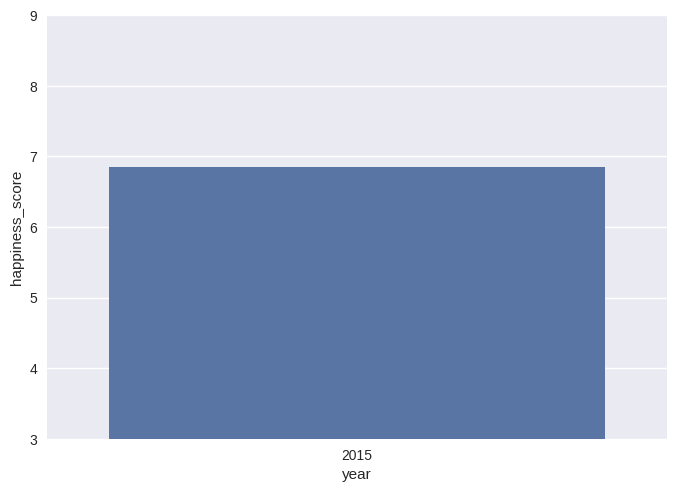

Venezuela
     year    country                       region  happiness_score
22   2015  Venezuela  Latin America and Caribbean           6.8100
43   2016  Venezuela  Latin America and Caribbean           6.0840
81   2017  Venezuela  Latin America and Caribbean           5.2500
101  2018  Venezuela  Latin America and Caribbean           4.8060
107  2019  Venezuela  Latin America and Caribbean           4.7070
98   2020  Venezuela  Latin America and Caribbean           5.0532
106  2021  Venezuela  Latin America and Caribbean           4.8920
107  2022  Venezuela  Latin America and Caribbean           4.9250
87   2023  Venezuela  Latin America and Caribbean           5.2110


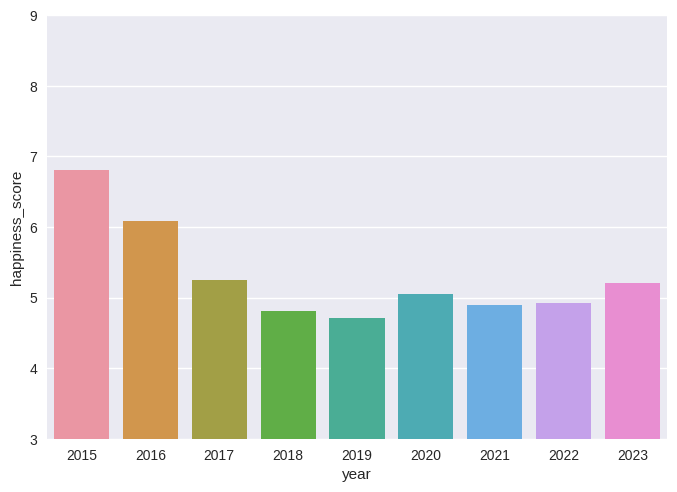

Singapore
    year    country             region  happiness_score
23  2015  Singapore  Southeastern Asia           6.7980
21  2016  Singapore  Southeastern Asia           6.7390
25  2017  Singapore  Southeastern Asia           6.5720
33  2018  Singapore  Southeastern Asia           6.3430
33  2019  Singapore  Southeastern Asia           6.2620
30  2020  Singapore  Southeastern Asia           6.3771
31  2021  Singapore  Southeastern Asia           6.3770
26  2022  Singapore  Southeastern Asia           6.4800
24  2023  Singapore  Southeastern Asia           6.5870


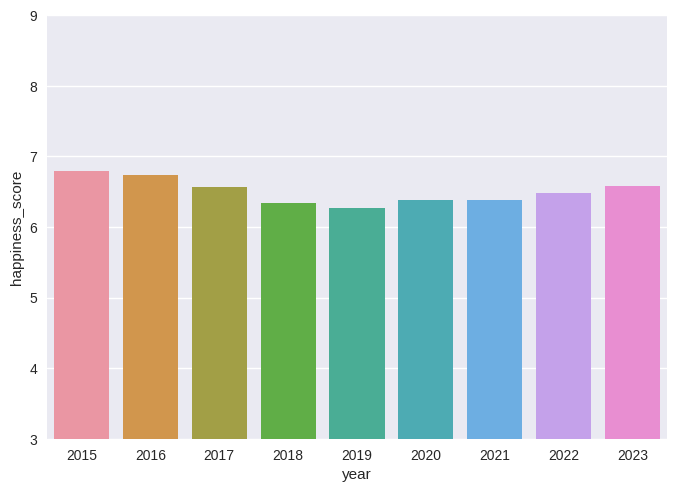

Panama
    year country                       region  happiness_score
24  2015  Panama  Latin America and Caribbean           6.7860
24  2016  Panama  Latin America and Caribbean           6.7010
29  2017  Panama  Latin America and Caribbean           6.4520
26  2018  Panama  Latin America and Caribbean           6.4300
30  2019  Panama  Latin America and Caribbean           6.3210
35  2020  Panama  Latin America and Caribbean           6.3048
40  2021  Panama  Latin America and Caribbean           6.1800
36  2022  Panama  Latin America and Caribbean           6.3090
37  2023  Panama  Latin America and Caribbean           6.2650


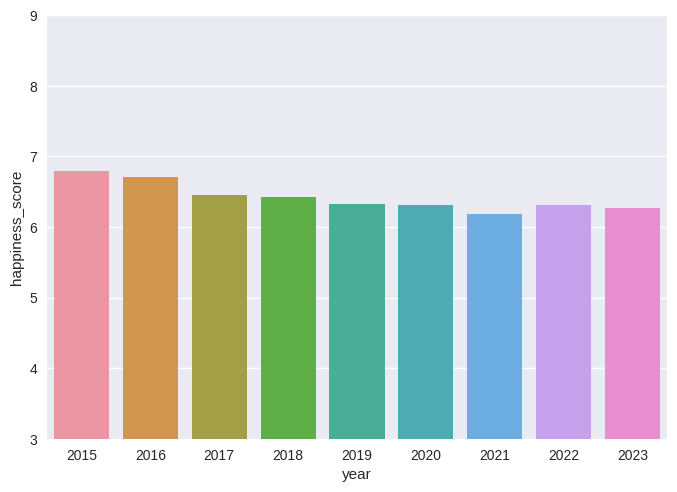

Germany
    year  country          region  happiness_score
25  2015  Germany  Western Europe           6.7500
15  2016  Germany  Western Europe           6.9940
15  2017  Germany  Western Europe           6.9510
14  2018  Germany  Western Europe           6.9650
16  2019  Germany  Western Europe           6.9850
16  2020  Germany  Western Europe           7.0758
12  2021  Germany  Western Europe           7.1550
13  2022  Germany  Western Europe           7.0340
15  2023  Germany  Western Europe           6.8920


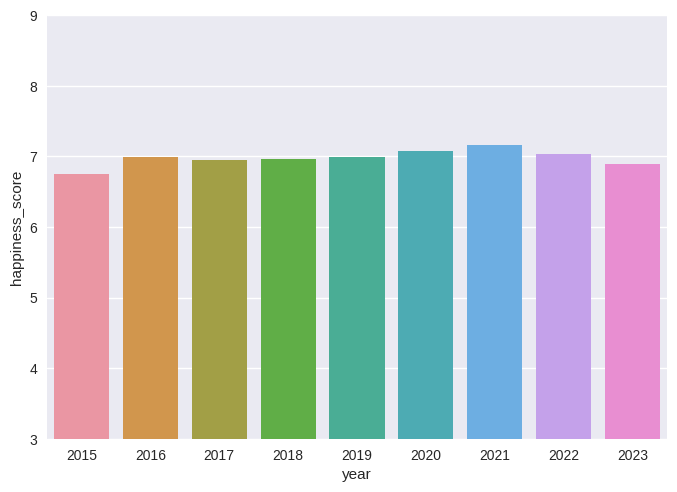

Chile
    year country                       region  happiness_score
26  2015   Chile  Latin America and Caribbean           6.6700
23  2016   Chile  Latin America and Caribbean           6.7050
19  2017   Chile  Latin America and Caribbean           6.6520
24  2018   Chile  Latin America and Caribbean           6.4760
25  2019   Chile  Latin America and Caribbean           6.4440
38  2020   Chile  Latin America and Caribbean           6.2285
42  2021   Chile  Latin America and Caribbean           6.1720
43  2022   Chile  Latin America and Caribbean           6.1720
34  2023   Chile  Latin America and Caribbean           6.3340


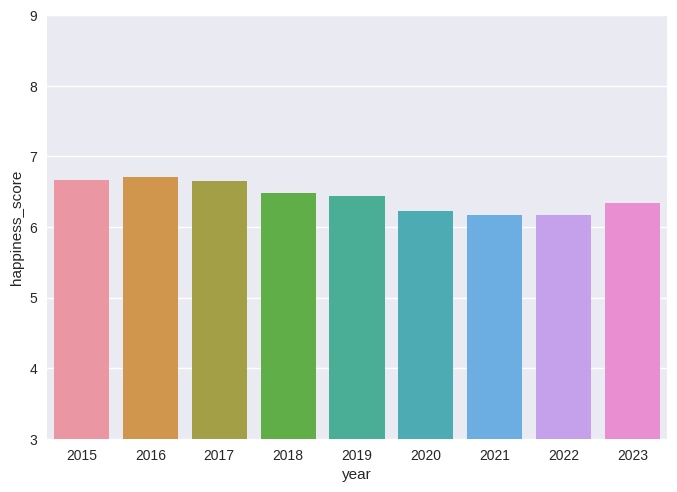

Qatar
    year country                           region  happiness_score
27  2015   Qatar  Middle East and Northern Africa            6.611
35  2016   Qatar  Middle East and Northern Africa            6.375
34  2017   Qatar  Middle East and Northern Africa            6.375
31  2018   Qatar  Middle East and Northern Africa            6.374
28  2019   Qatar  Middle East and Northern Africa            6.374


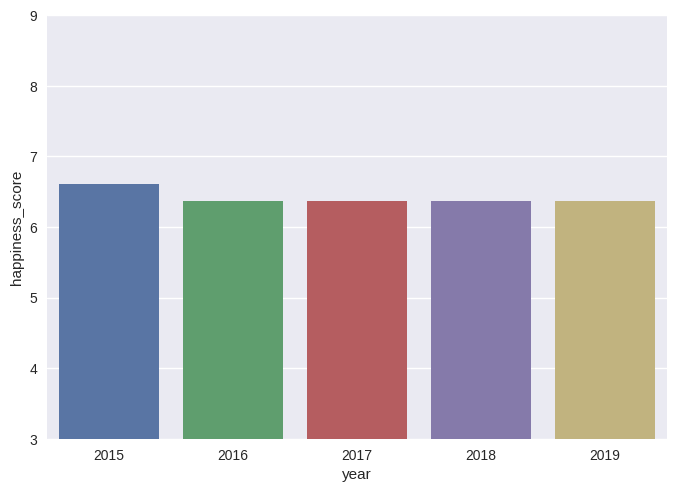

France
    year country          region  happiness_score
28  2015  France  Western Europe           6.5750
31  2016  France  Western Europe           6.4780
30  2017  France  Western Europe           6.4420
22  2018  France  Western Europe           6.4890
23  2019  France  Western Europe           6.5920
22  2020  France  Western Europe           6.6638
20  2021  France  Western Europe           6.6900
19  2022  France  Western Europe           6.6870
20  2023  France  Western Europe           6.6610


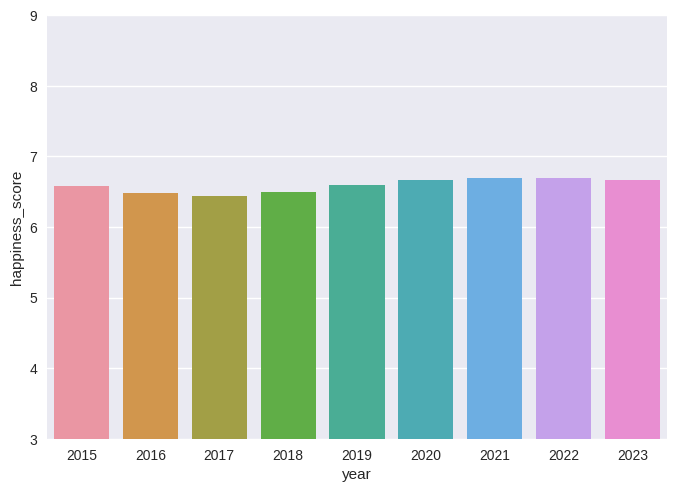

Argentina
    year    country                       region  happiness_score
29  2015  Argentina  Latin America and Caribbean           6.5740
25  2016  Argentina  Latin America and Caribbean           6.6500
23  2017  Argentina  Latin America and Caribbean           6.5990
28  2018  Argentina  Latin America and Caribbean           6.3880
46  2019  Argentina  Latin America and Caribbean           6.0860
54  2020  Argentina  Latin America and Caribbean           5.9747
56  2021  Argentina  Latin America and Caribbean           5.9290
56  2022  Argentina  Latin America and Caribbean           5.9670
51  2023  Argentina  Latin America and Caribbean           6.0240


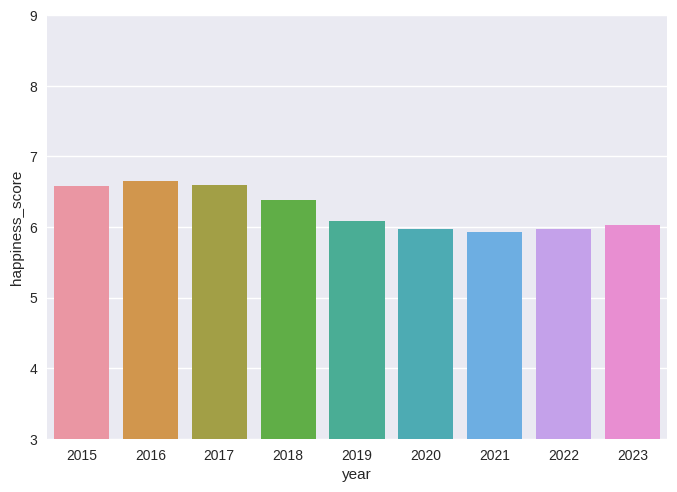

Czechia
    year  country                      region  happiness_score
30  2015  Czechia  Central and Eastern Europe           6.5050
26  2016  Czechia  Central and Eastern Europe           6.5960
22  2017  Czechia  Central and Eastern Europe           6.6090
20  2018  Czechia  Central and Eastern Europe           6.7110
19  2019  Czechia  Central and Eastern Europe           6.8520
18  2020  Czechia  Central and Eastern Europe           6.9109
17  2021  Czechia  Central and Eastern Europe           6.9650
17  2022  Czechia  Central and Eastern Europe           6.9200
17  2023  Czechia  Central and Eastern Europe           6.8450


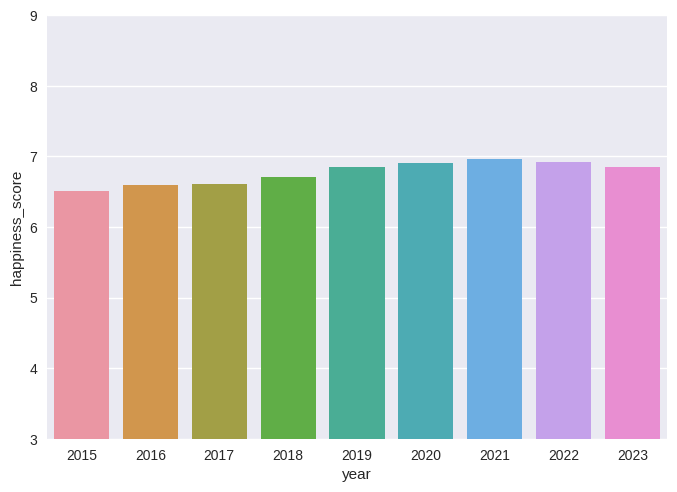

Uruguay
    year  country                       region  happiness_score
31  2015  Uruguay  Latin America and Caribbean           6.4850
28  2016  Uruguay  Latin America and Caribbean           6.5450
27  2017  Uruguay  Latin America and Caribbean           6.4540
30  2018  Uruguay  Latin America and Caribbean           6.3790
32  2019  Uruguay  Latin America and Caribbean           6.2930
25  2020  Uruguay  Latin America and Caribbean           6.4401
30  2021  Uruguay  Latin America and Caribbean           6.4310
29  2022  Uruguay  Latin America and Caribbean           6.4740
27  2023  Uruguay  Latin America and Caribbean           6.4940


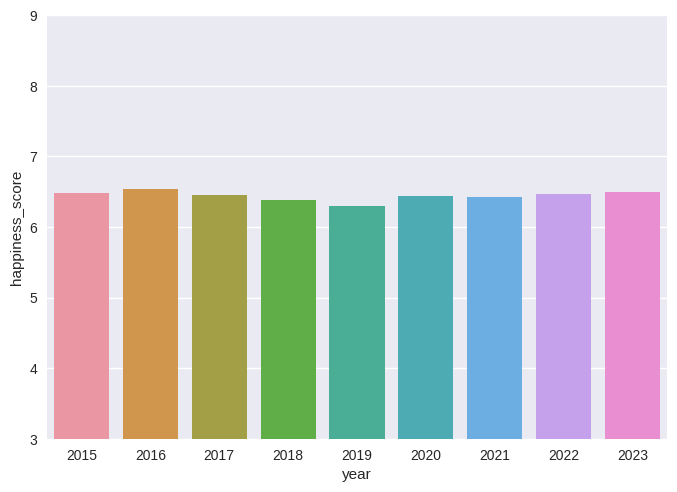

Colombia
    year   country                       region  happiness_score
32  2015  Colombia  Latin America and Caribbean           6.4770
30  2016  Colombia  Latin America and Caribbean           6.4810
35  2017  Colombia  Latin America and Caribbean           6.3570
36  2018  Colombia  Latin America and Caribbean           6.2600
42  2019  Colombia  Latin America and Caribbean           6.1250
43  2020  Colombia  Latin America and Caribbean           6.1634
51  2021  Colombia  Latin America and Caribbean           6.0120
65  2022  Colombia  Latin America and Caribbean           5.7810
71  2023  Colombia  Latin America and Caribbean           5.6300


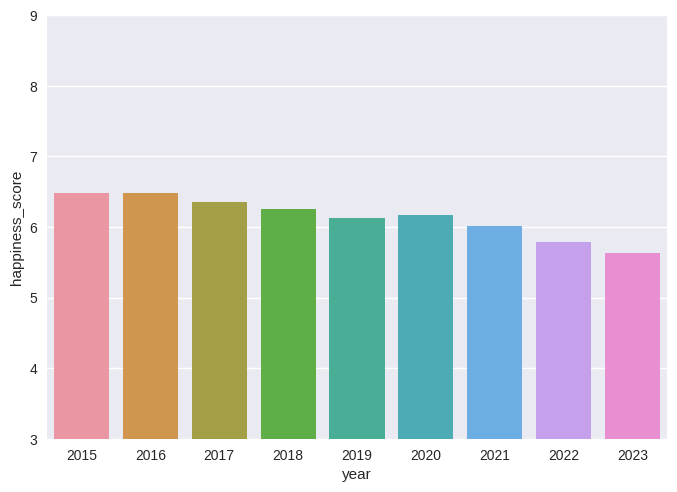

Thailand
    year   country             region  happiness_score
33  2015  Thailand  Southeastern Asia           6.4550
32  2016  Thailand  Southeastern Asia           6.4740
31  2017  Thailand  Southeastern Asia           6.4240
45  2018  Thailand  Southeastern Asia           6.0720
51  2019  Thailand  Southeastern Asia           6.0080
53  2020  Thailand  Southeastern Asia           5.9988
53  2021  Thailand  Southeastern Asia           5.9850
60  2022  Thailand  Southeastern Asia           5.8910
59  2023  Thailand  Southeastern Asia           5.8430


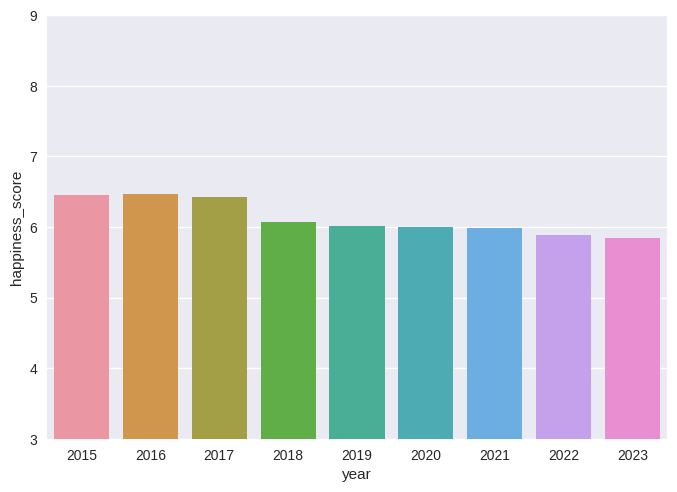

Saudi Arabia
    year       country                           region  happiness_score
34  2015  Saudi Arabia  Middle East and Northern Africa           6.4110
33  2016  Saudi Arabia  Middle East and Northern Africa           6.3790
36  2017  Saudi Arabia  Middle East and Northern Africa           6.3440
32  2018  Saudi Arabia  Middle East and Northern Africa           6.3710
27  2019  Saudi Arabia  Middle East and Northern Africa           6.3750
26  2020  Saudi Arabia  Middle East and Northern Africa           6.4065
25  2021  Saudi Arabia  Middle East and Northern Africa           6.4940
24  2022  Saudi Arabia  Middle East and Northern Africa           6.5230
29  2023  Saudi Arabia  Middle East and Northern Africa           6.4630


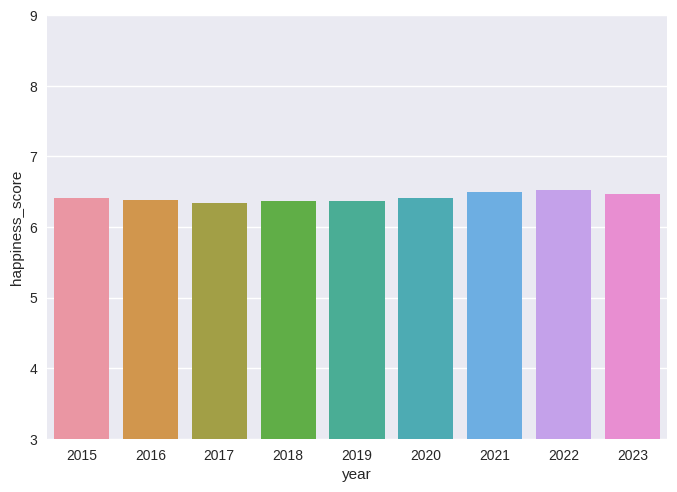

Spain
    year country          region  happiness_score
35  2015   Spain  Western Europe           6.3290
36  2016   Spain  Western Europe           6.3610
33  2017   Spain  Western Europe           6.4030
35  2018   Spain  Western Europe           6.3100
29  2019   Spain  Western Europe           6.3540
27  2020   Spain  Western Europe           6.4009
26  2021   Spain  Western Europe           6.4910
28  2022   Spain  Western Europe           6.4760
31  2023   Spain  Western Europe           6.4360


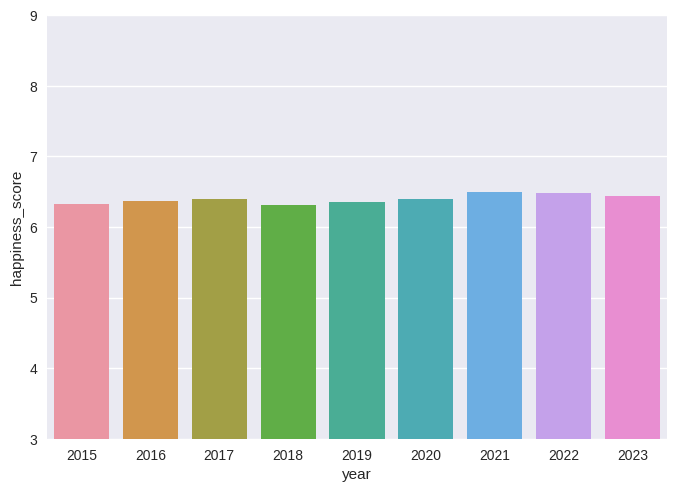

Malta
    year country          region  happiness_score
36  2015   Malta  Western Europe           6.3020
29  2016   Malta  Western Europe           6.4880
26  2017   Malta  Western Europe           6.5270
21  2018   Malta  Western Europe           6.6270
21  2019   Malta  Western Europe           6.7260
21  2020   Malta  Western Europe           6.7728
22  2021   Malta  Western Europe           6.6020
32  2022   Malta  Western Europe           6.4470
36  2023   Malta  Western Europe           6.3000


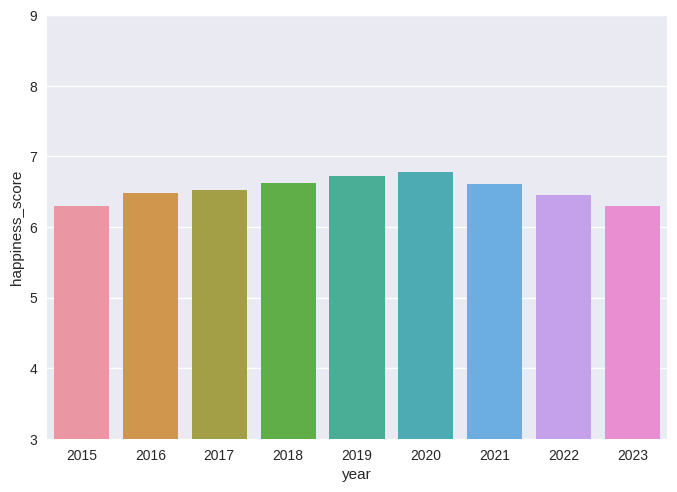

Taiwan Province of China
    year                   country        region  happiness_score
37  2015  Taiwan Province of China  Eastern Asia           6.2980
34  2016  Taiwan Province of China  Eastern Asia           6.3790
32  2017  Taiwan Province of China  Eastern Asia           6.4220
25  2018  Taiwan Province of China  Eastern Asia           6.4410
24  2019  Taiwan Province of China  Eastern Asia           6.4460
24  2020  Taiwan Province of China  Eastern Asia           6.4554
23  2021  Taiwan Province of China  Eastern Asia           6.5840
25  2022  Taiwan Province of China  Eastern Asia           6.5120
26  2023  Taiwan Province of China  Eastern Asia           6.5350


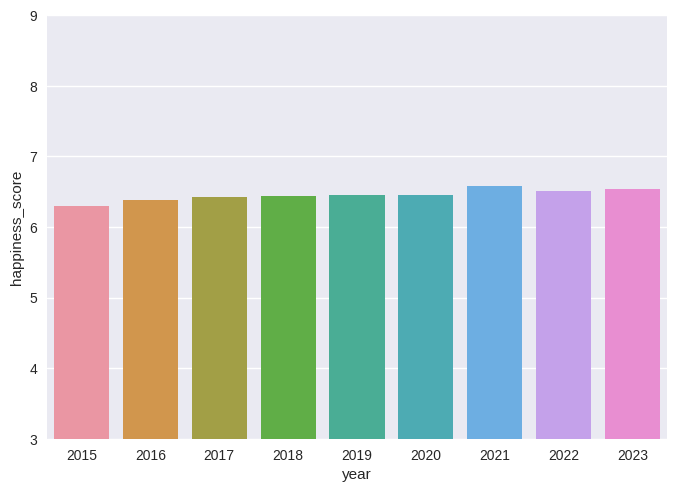

Kuwait
    year country                           region  happiness_score
38  2015  Kuwait  Middle East and Northern Africa           6.2950
40  2016  Kuwait  Middle East and Northern Africa           6.2390
38  2017  Kuwait  Middle East and Northern Africa           6.1050
44  2018  Kuwait  Middle East and Northern Africa           6.0830
50  2019  Kuwait  Middle East and Northern Africa           6.0210
47  2020  Kuwait  Middle East and Northern Africa           6.1021
46  2021  Kuwait  Middle East and Northern Africa           6.1060
49  2022  Kuwait  Middle East and Northern Africa           6.1060


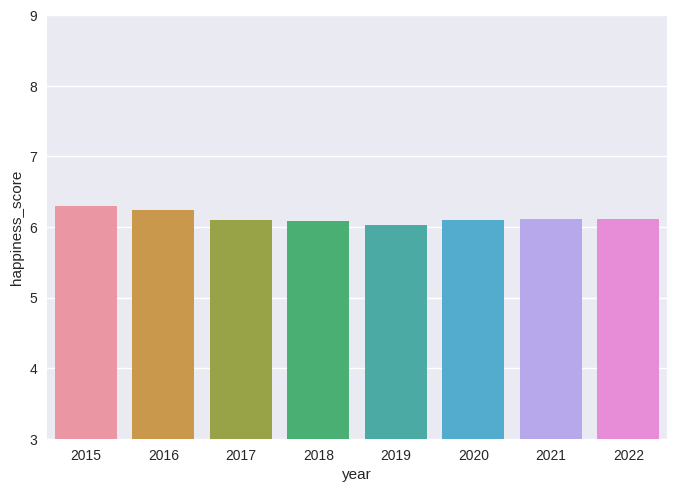

Suriname
    year   country                       region  happiness_score
39  2015  Suriname  Latin America and Caribbean            6.269
39  2016  Suriname  Latin America and Caribbean            6.269


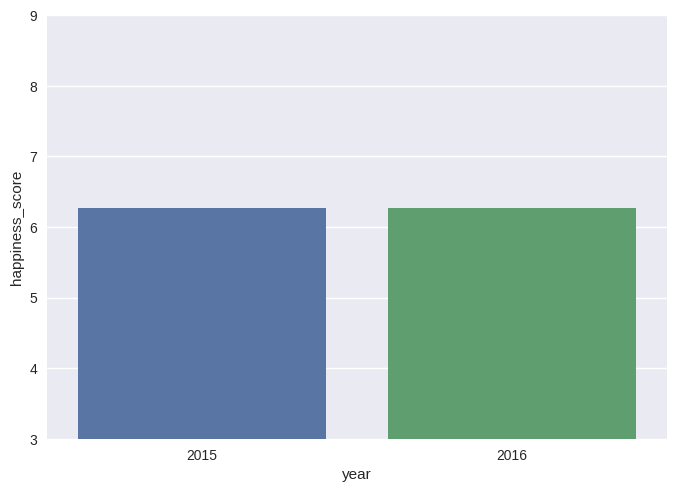

Trinidad and Tobago
    year              country                       region  happiness_score
40  2015  Trinidad and Tobago  Latin America and Caribbean           6.1680
42  2016  Trinidad and Tobago  Latin America and Caribbean           6.1680
37  2017  Trinidad and Tobago  Latin America and Caribbean           6.1680
41  2020  Trinidad and Tobago  Latin America and Caribbean           6.1919


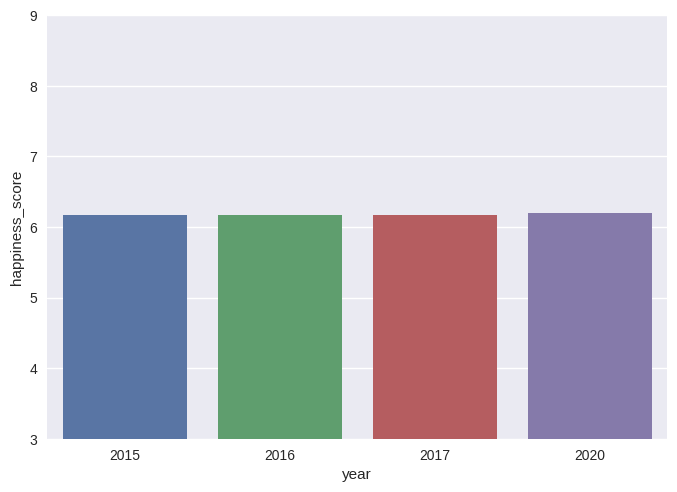

El Salvador
    year      country                       region  happiness_score
41  2015  El Salvador  Latin America and Caribbean           6.1300
45  2016  El Salvador  Latin America and Caribbean           6.0680
44  2017  El Salvador  Latin America and Caribbean           6.0030
39  2018  El Salvador  Latin America and Caribbean           6.1670
34  2019  El Salvador  Latin America and Caribbean           6.2530
33  2020  El Salvador  Latin America and Caribbean           6.3483
48  2021  El Salvador  Latin America and Caribbean           6.0610
48  2022  El Salvador  Latin America and Caribbean           6.1200
49  2023  El Salvador  Latin America and Caribbean           6.1220


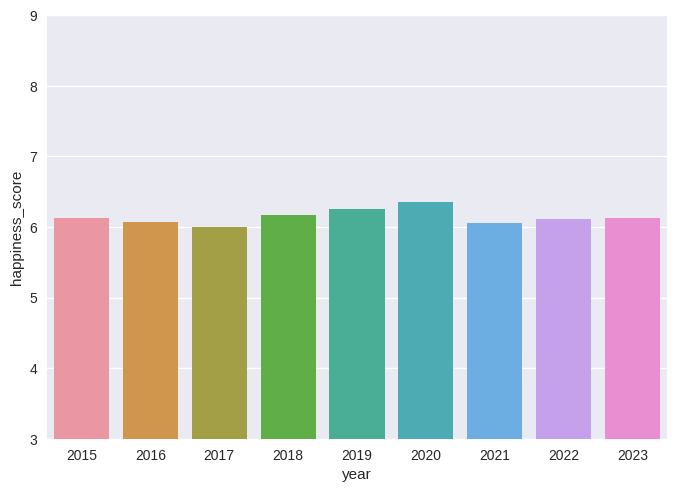

Guatemala
    year    country                       region  happiness_score
42  2015  Guatemala  Latin America and Caribbean           6.1230
38  2016  Guatemala  Latin America and Caribbean           6.3240
28  2017  Guatemala  Latin America and Caribbean           6.4540
29  2018  Guatemala  Latin America and Caribbean           6.3820
26  2019  Guatemala  Latin America and Caribbean           6.4360
28  2020  Guatemala  Latin America and Caribbean           6.3989
29  2021  Guatemala  Latin America and Caribbean           6.4350
38  2022  Guatemala  Latin America and Caribbean           6.2620
42  2023  Guatemala  Latin America and Caribbean           6.1500


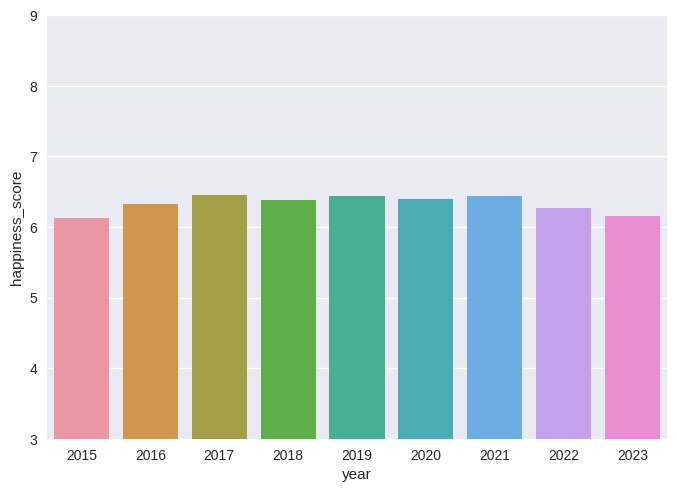

Uzbekistan
    year     country                      region  happiness_score
43  2015  Uzbekistan  Central and Eastern Europe           6.0030
48  2016  Uzbekistan  Central and Eastern Europe           5.9870
46  2017  Uzbekistan  Central and Eastern Europe           5.9710
43  2018  Uzbekistan  Central and Eastern Europe           6.0960
40  2019  Uzbekistan  Central and Eastern Europe           6.1740
37  2020  Uzbekistan  Central and Eastern Europe           6.2576
41  2021  Uzbekistan  Central and Eastern Europe           6.1790
52  2022  Uzbekistan  Central and Eastern Europe           6.0630
53  2023  Uzbekistan  Central and Eastern Europe           6.0140


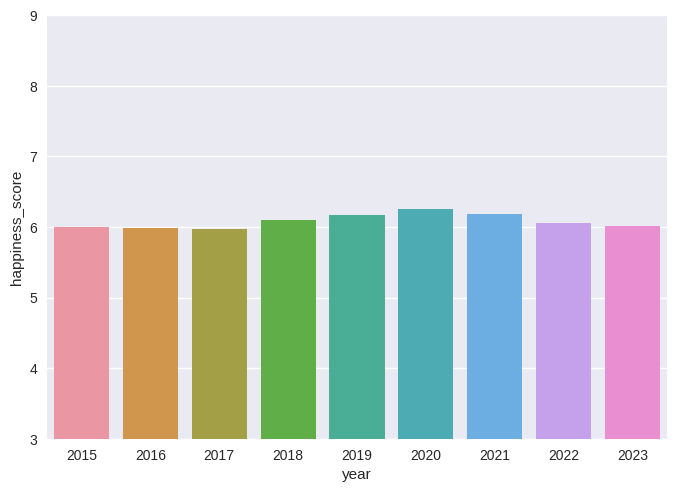

Slovakia
    year   country                      region  happiness_score
44  2015  Slovakia  Central and Eastern Europe           5.9950
44  2016  Slovakia  Central and Eastern Europe           6.0780
39  2017  Slovakia  Central and Eastern Europe           6.0980
38  2018  Slovakia  Central and Eastern Europe           6.1730
37  2019  Slovakia  Central and Eastern Europe           6.1980
36  2020  Slovakia  Central and Eastern Europe           6.2806
33  2021  Slovakia  Central and Eastern Europe           6.3310
34  2022  Slovakia  Central and Eastern Europe           6.3910
28  2023  Slovakia  Central and Eastern Europe           6.4690


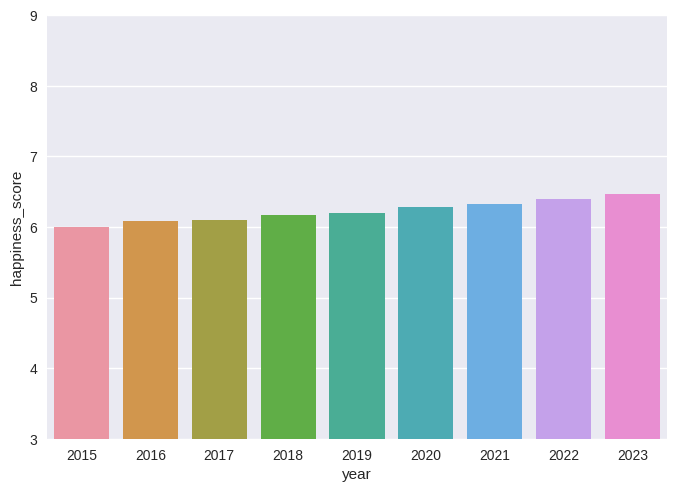

Japan
    year country        region  happiness_score
45  2015   Japan  Eastern Asia           5.9870
52  2016   Japan  Eastern Asia           5.9210
50  2017   Japan  Eastern Asia           5.9200
53  2018   Japan  Eastern Asia           5.9150
57  2019   Japan  Eastern Asia           5.8860
61  2020   Japan  Eastern Asia           5.8708
55  2021   Japan  Eastern Asia           5.9400
53  2022   Japan  Eastern Asia           6.0390
46  2023   Japan  Eastern Asia           6.1290


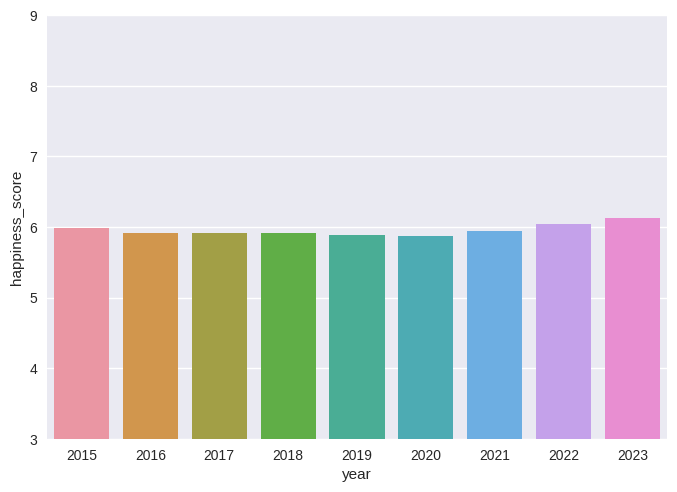

South Korea
    year      country        region  happiness_score
46  2015  South Korea  Eastern Asia           5.9840
57  2016  South Korea  Eastern Asia           5.8350
54  2017  South Korea  Eastern Asia           5.8380
56  2018  South Korea  Eastern Asia           5.8750
53  2019  South Korea  Eastern Asia           5.8950
60  2020  South Korea  Eastern Asia           5.8724
61  2021  South Korea  Eastern Asia           5.8450
58  2022  South Korea  Eastern Asia           5.9350
56  2023  South Korea  Eastern Asia           5.9510


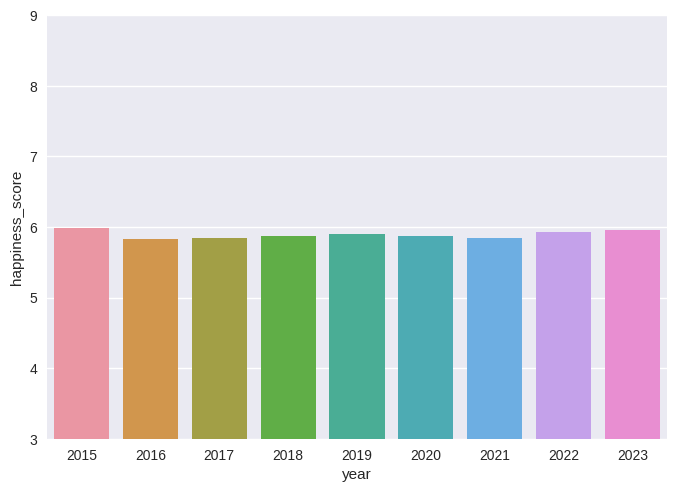

Ecuador
    year  country                       region  happiness_score
47  2015  Ecuador  Latin America and Caribbean           5.9750
50  2016  Ecuador  Latin America and Caribbean           5.9760
43  2017  Ecuador  Latin America and Caribbean           6.0080
47  2018  Ecuador  Latin America and Caribbean           5.9730
49  2019  Ecuador  Latin America and Caribbean           6.0280
57  2020  Ecuador  Latin America and Caribbean           5.9252
65  2021  Ecuador  Latin America and Caribbean           5.7640
75  2022  Ecuador  Latin America and Caribbean           5.5330
73  2023  Ecuador  Latin America and Caribbean           5.5590


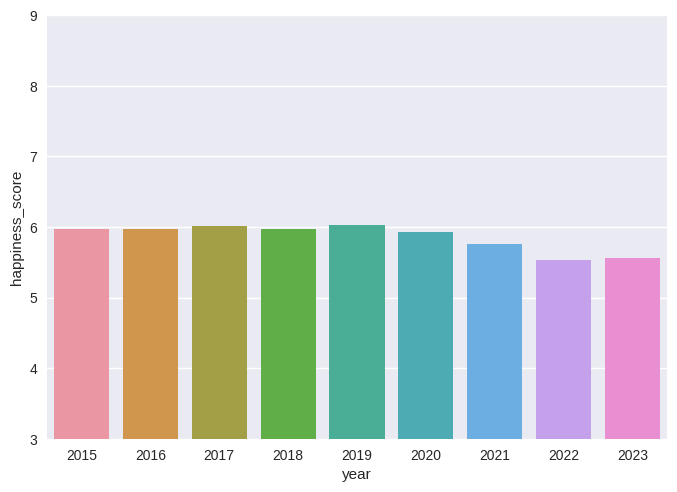

Bahrain
    year  country                           region  happiness_score
48  2015  Bahrain  Middle East and Northern Africa           5.9600
41  2016  Bahrain  Middle East and Northern Africa           6.2180
40  2017  Bahrain  Middle East and Northern Africa           6.0870
42  2018  Bahrain  Middle East and Northern Africa           6.1050
36  2019  Bahrain  Middle East and Northern Africa           6.1990
39  2020  Bahrain  Middle East and Northern Africa           6.2273
21  2021  Bahrain  Middle East and Northern Africa           6.6470
20  2022  Bahrain  Middle East and Northern Africa           6.6470
41  2023  Bahrain  Middle East and Northern Africa           6.1730


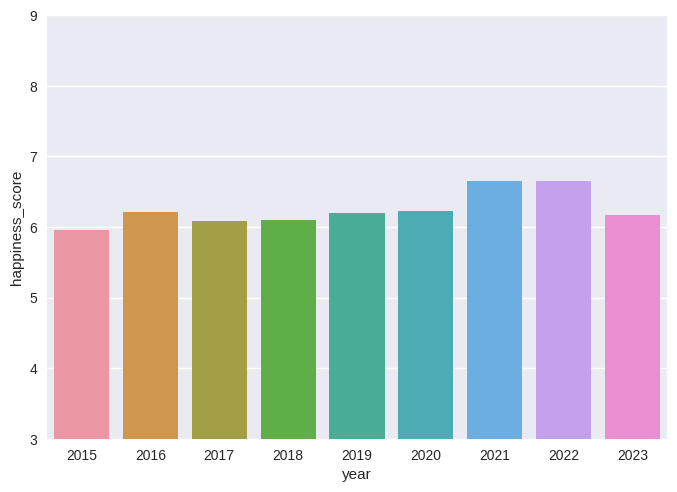

Italy
    year country          region  happiness_score
49  2015   Italy  Western Europe           5.9480
49  2016   Italy  Western Europe           5.9770
47  2017   Italy  Western Europe           5.9640
46  2018   Italy  Western Europe           6.0000
35  2019   Italy  Western Europe           6.2230
29  2020   Italy  Western Europe           6.3874
27  2021   Italy  Western Europe           6.4830
30  2022   Italy  Western Europe           6.4670
32  2023   Italy  Western Europe           6.4050


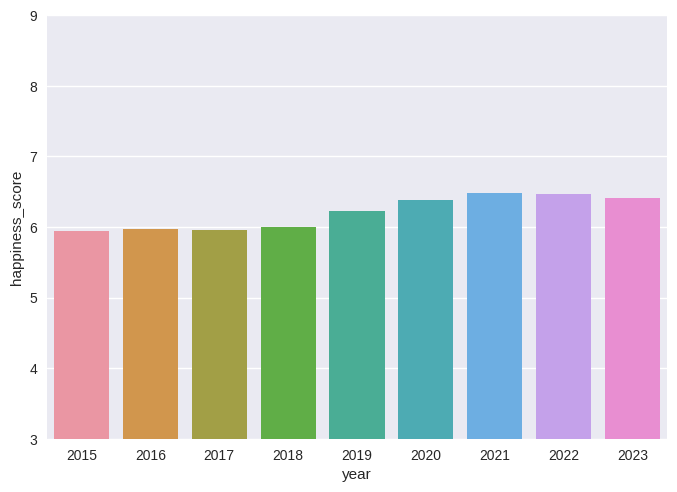

Bolivia
    year  country                       region  happiness_score
50  2015  Bolivia  Latin America and Caribbean           5.8900
58  2016  Bolivia  Latin America and Caribbean           5.8220
57  2017  Bolivia  Latin America and Caribbean           5.8230
61  2018  Bolivia  Latin America and Caribbean           5.7520
60  2019  Bolivia  Latin America and Caribbean           5.7790
64  2020  Bolivia  Latin America and Caribbean           5.7475
68  2021  Bolivia  Latin America and Caribbean           5.7160
70  2022  Bolivia  Latin America and Caribbean           5.6000
68  2023  Bolivia  Latin America and Caribbean           5.6840


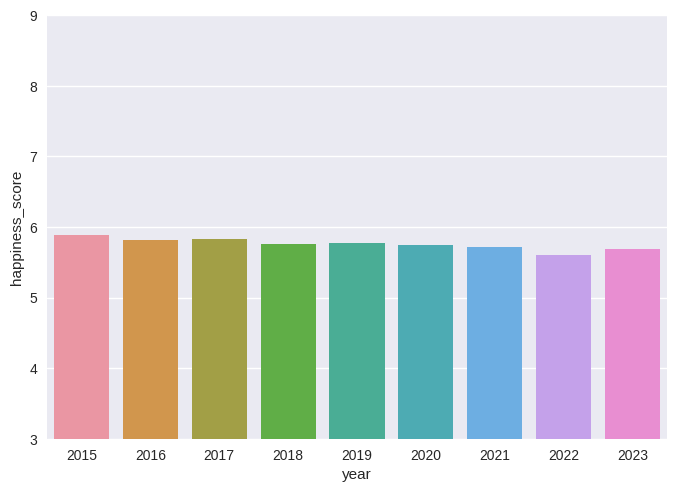

Moldova
    year  country                      region  happiness_score
51  2015  Moldova  Central and Eastern Europe           5.8890
54  2016  Moldova  Central and Eastern Europe           5.8970
55  2017  Moldova  Central and Eastern Europe           5.8380
66  2018  Moldova  Central and Eastern Europe           5.6400
70  2019  Moldova  Central and Eastern Europe           5.5290
69  2020  Moldova  Central and Eastern Europe           5.6075
64  2021  Moldova  Central and Eastern Europe           5.7660
61  2022  Moldova  Central and Eastern Europe           5.8570
62  2023  Moldova  Central and Eastern Europe           5.8190


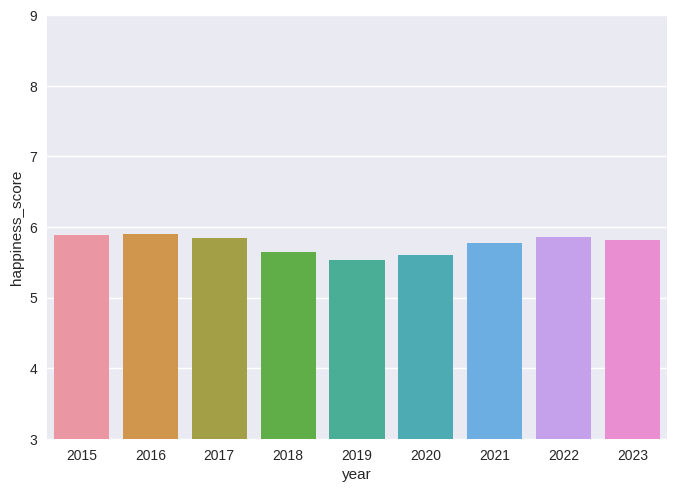

Paraguay
    year   country                       region  happiness_score
52  2015  Paraguay  Latin America and Caribbean           5.8780
69  2016  Paraguay  Latin America and Caribbean           5.5380
69  2017  Paraguay  Latin America and Caribbean           5.4930
63  2018  Paraguay  Latin America and Caribbean           5.6810
62  2019  Paraguay  Latin America and Caribbean           5.7430
66  2020  Paraguay  Latin America and Caribbean           5.6921
70  2021  Paraguay  Latin America and Caribbean           5.6530
72  2022  Paraguay  Latin America and Caribbean           5.5780
65  2023  Paraguay  Latin America and Caribbean           5.7380


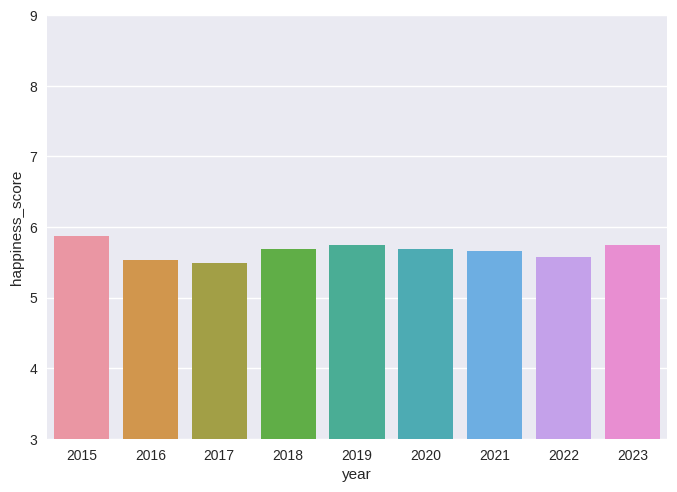

Kazakhstan
    year     country                      region  happiness_score
53  2015  Kazakhstan  Central and Eastern Europe           5.8550
53  2016  Kazakhstan  Central and Eastern Europe           5.9190
59  2017  Kazakhstan  Central and Eastern Europe           5.8190
59  2018  Kazakhstan  Central and Eastern Europe           5.7900
59  2019  Kazakhstan  Central and Eastern Europe           5.8090
49  2020  Kazakhstan  Central and Eastern Europe           6.0579
44  2021  Kazakhstan  Central and Eastern Europe           6.1520
39  2022  Kazakhstan  Central and Eastern Europe           6.2340
43  2023  Kazakhstan  Central and Eastern Europe           6.1440


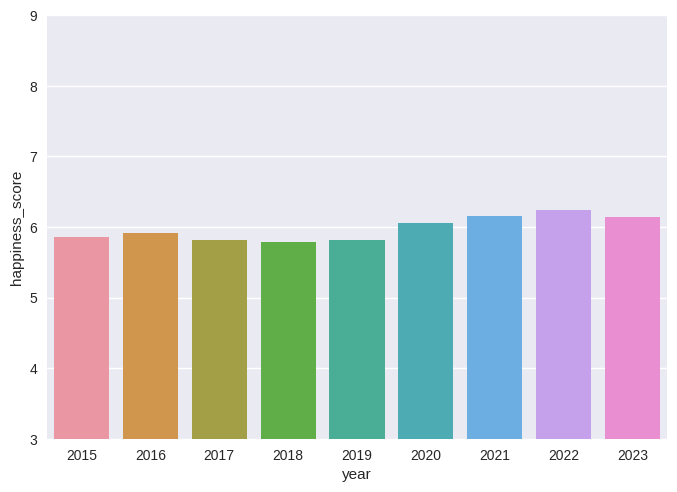

Slovenia
    year   country                      region  happiness_score
54  2015  Slovenia  Central and Eastern Europe           5.8480
62  2016  Slovenia  Central and Eastern Europe           5.7680
61  2017  Slovenia  Central and Eastern Europe           5.7580
50  2018  Slovenia  Central and Eastern Europe           5.9480
43  2019  Slovenia  Central and Eastern Europe           6.1180
32  2020  Slovenia  Central and Eastern Europe           6.3634
28  2021  Slovenia  Central and Eastern Europe           6.4610
21  2022  Slovenia  Central and Eastern Europe           6.6300
21  2023  Slovenia  Central and Eastern Europe           6.6500


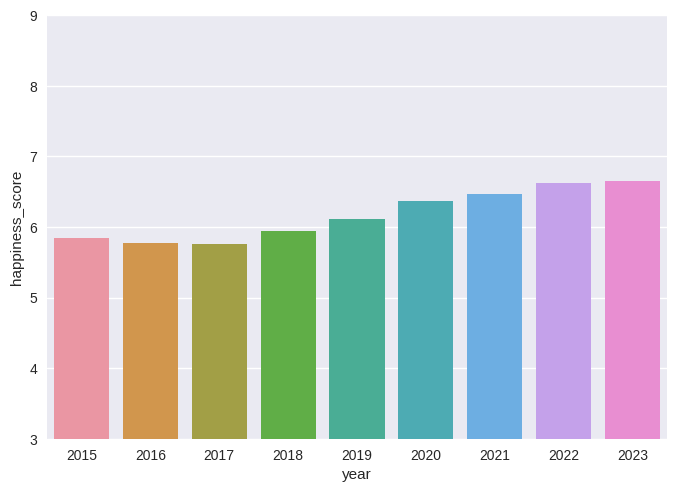

Lithuania
    year    country                      region  happiness_score
55  2015  Lithuania  Central and Eastern Europe           5.8330
59  2016  Lithuania  Central and Eastern Europe           5.8130
51  2017  Lithuania  Central and Eastern Europe           5.9020
49  2018  Lithuania  Central and Eastern Europe           5.9520
41  2019  Lithuania  Central and Eastern Europe           6.1490
40  2020  Lithuania  Central and Eastern Europe           6.2155
37  2021  Lithuania  Central and Eastern Europe           6.2550
33  2022  Lithuania  Central and Eastern Europe           6.4460
19  2023  Lithuania  Central and Eastern Europe           6.7630


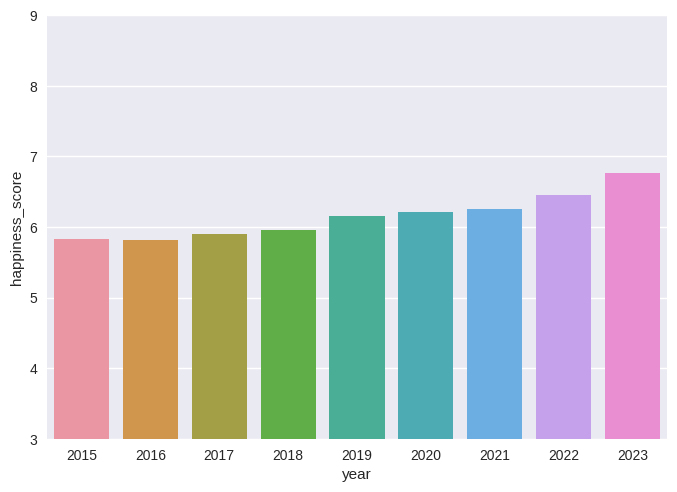

Nicaragua
    year    country                       region  happiness_score
56  2015  Nicaragua  Latin America and Caribbean           5.8280
47  2016  Nicaragua  Latin America and Caribbean           5.9920
42  2017  Nicaragua  Latin America and Caribbean           6.0710
40  2018  Nicaragua  Latin America and Caribbean           6.1410
44  2019  Nicaragua  Latin America and Caribbean           6.1050
45  2020  Nicaragua  Latin America and Caribbean           6.1371
54  2021  Nicaragua  Latin America and Caribbean           5.9720
44  2022  Nicaragua  Latin America and Caribbean           6.1650
39  2023  Nicaragua  Latin America and Caribbean           6.2590


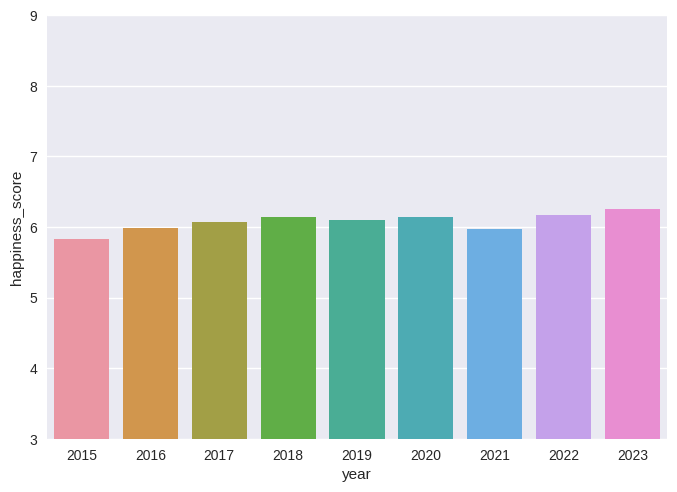

Peru
    year country                       region  happiness_score
57  2015    Peru  Latin America and Caribbean           5.8240
63  2016    Peru  Latin America and Caribbean           5.7430
62  2017    Peru  Latin America and Caribbean           5.7150
64  2018    Peru  Latin America and Caribbean           5.6630
64  2019    Peru  Latin America and Caribbean           5.6970
62  2020    Peru  Latin America and Caribbean           5.7968
62  2021    Peru  Latin America and Caribbean           5.8400
73  2022    Peru  Latin America and Caribbean           5.5590
74  2023    Peru  Latin America and Caribbean           5.5260


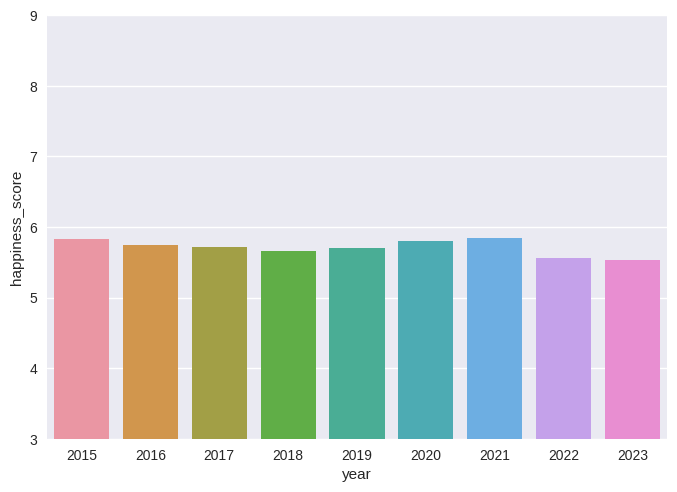

Belarus
    year  country                      region  happiness_score
58  2015  Belarus  Central and Eastern Europe           5.8130
60  2016  Belarus  Central and Eastern Europe           5.8020
66  2017  Belarus  Central and Eastern Europe           5.5690
72  2018  Belarus  Central and Eastern Europe           5.4830
80  2019  Belarus  Central and Eastern Europe           5.3230
74  2020  Belarus  Central and Eastern Europe           5.5399
74  2021  Belarus  Central and Eastern Europe           5.5340
64  2022  Belarus  Central and Eastern Europe           5.8210


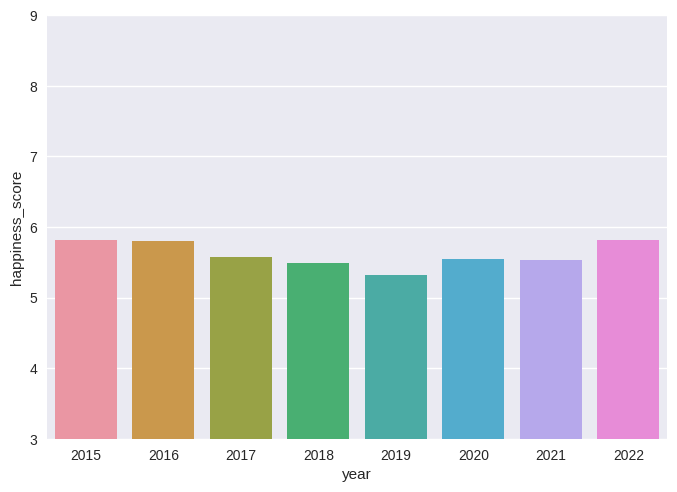

Poland
    year country                      region  happiness_score
59  2015  Poland  Central and Eastern Europe           5.7910
56  2016  Poland  Central and Eastern Europe           5.8350
45  2017  Poland  Central and Eastern Europe           5.9730
41  2018  Poland  Central and Eastern Europe           6.1230
39  2019  Poland  Central and Eastern Europe           6.1820
42  2020  Poland  Central and Eastern Europe           6.1863
43  2021  Poland  Central and Eastern Europe           6.1660
47  2022  Poland  Central and Eastern Europe           6.1230
38  2023  Poland  Central and Eastern Europe           6.2600


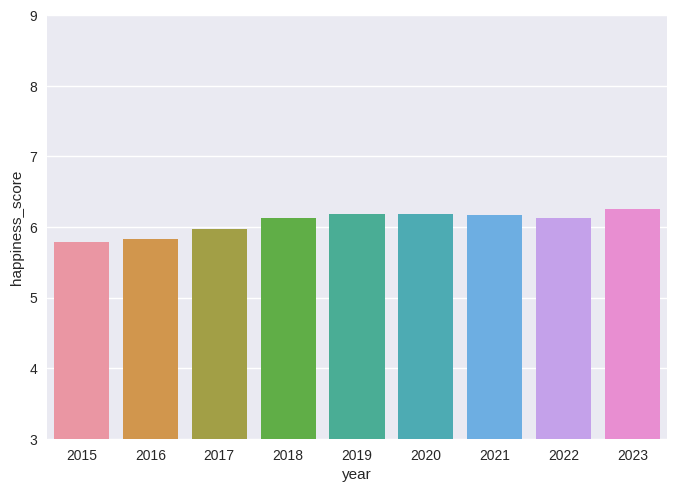

Malaysia
    year   country             region  happiness_score
60  2015  Malaysia  Southeastern Asia           5.7700
46  2016  Malaysia  Southeastern Asia           6.0050
41  2017  Malaysia  Southeastern Asia           6.0840
34  2018  Malaysia  Southeastern Asia           6.3220
79  2019  Malaysia  Southeastern Asia           5.3390
81  2020  Malaysia  Southeastern Asia           5.3843
80  2021  Malaysia  Southeastern Asia           5.3840
69  2022  Malaysia  Southeastern Asia           5.7110
54  2023  Malaysia  Southeastern Asia           6.0120


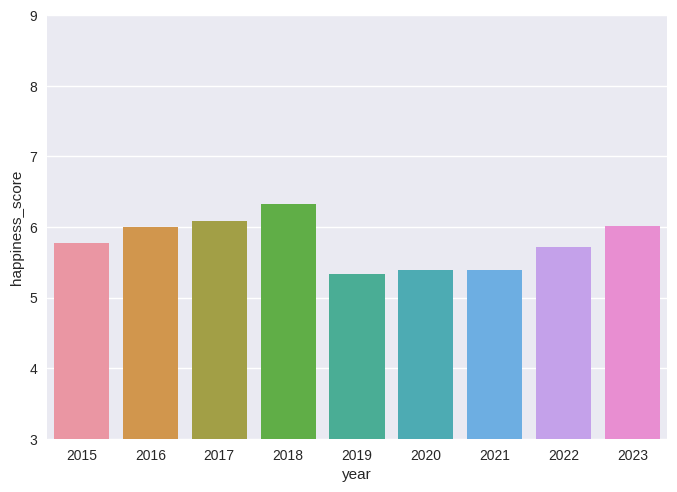

Croatia
    year  country                      region  happiness_score
61  2015  Croatia  Central and Eastern Europe           5.7590
73  2016  Croatia  Central and Eastern Europe           5.4880
76  2017  Croatia  Central and Eastern Europe           5.2930
81  2018  Croatia  Central and Eastern Europe           5.3210
74  2019  Croatia  Central and Eastern Europe           5.4320
78  2020  Croatia  Central and Eastern Europe           5.5047
59  2021  Croatia  Central and Eastern Europe           5.8820
46  2022  Croatia  Central and Eastern Europe           6.1250
47  2023  Croatia  Central and Eastern Europe           6.1250


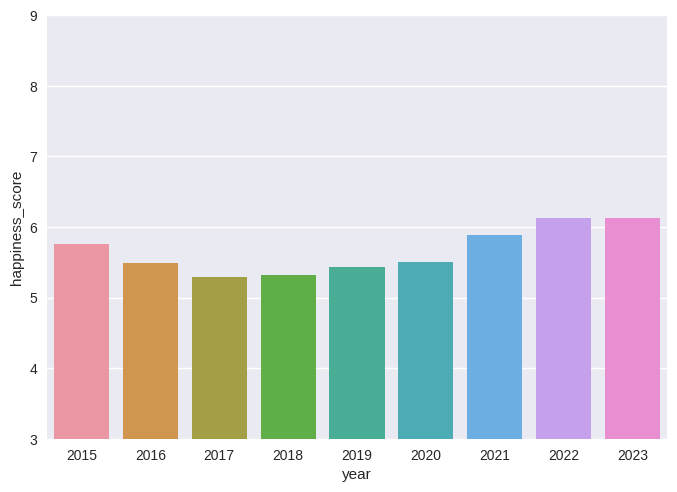

Libya
    year country                           region  happiness_score
62  2015   Libya  Middle East and Northern Africa           5.7540
66  2016   Libya  Middle East and Northern Africa           5.6150
67  2017   Libya  Middle East and Northern Africa           5.5250
69  2018   Libya  Middle East and Northern Africa           5.5660
71  2019   Libya  Middle East and Northern Africa           5.5250
79  2020   Libya  Middle East and Northern Africa           5.4888
79  2021   Libya  Middle East and Northern Africa           5.4100
85  2022   Libya  Middle East and Northern Africa           5.3300


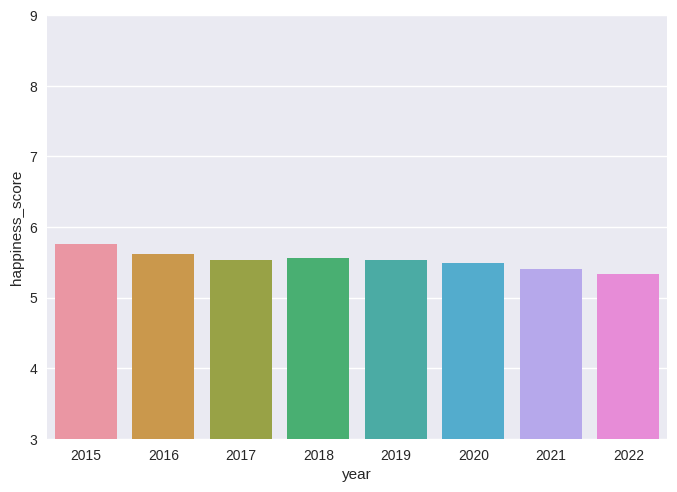

Russia
    year country                      region  happiness_score
63  2015  Russia  Central and Eastern Europe            5.716
55  2016  Russia  Central and Eastern Europe            5.856
48  2017  Russia  Central and Eastern Europe            5.963
58  2018  Russia  Central and Eastern Europe            5.810
67  2019  Russia  Central and Eastern Europe            5.648
72  2020  Russia  Central and Eastern Europe            5.546
75  2021  Russia  Central and Eastern Europe            5.477
79  2022  Russia  Central and Eastern Europe            5.459
69  2023  Russia  Central and Eastern Europe            5.661


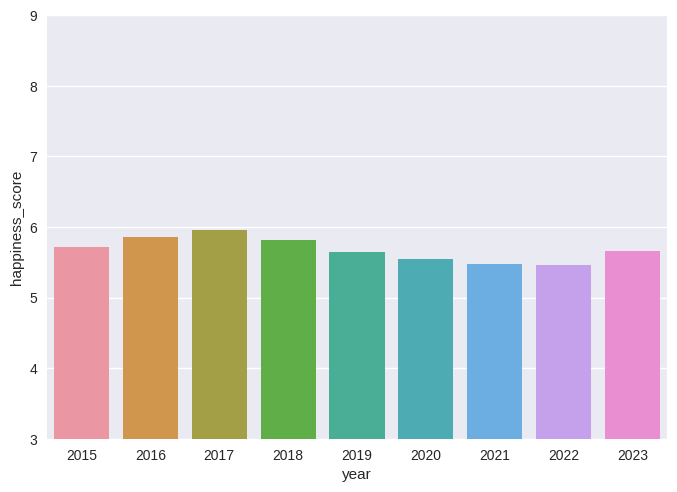

Jamaica
    year  country                       region  happiness_score
64  2015  Jamaica  Latin America and Caribbean           5.7090
72  2016  Jamaica  Latin America and Caribbean           5.5100
75  2017  Jamaica  Latin America and Caribbean           5.3110
55  2018  Jamaica  Latin America and Caribbean           5.8900
55  2019  Jamaica  Latin America and Caribbean           5.8900
59  2020  Jamaica  Latin America and Caribbean           5.8898
36  2021  Jamaica  Latin America and Caribbean           6.3090
62  2022  Jamaica  Latin America and Caribbean           5.8500
67  2023  Jamaica  Latin America and Caribbean           5.7030


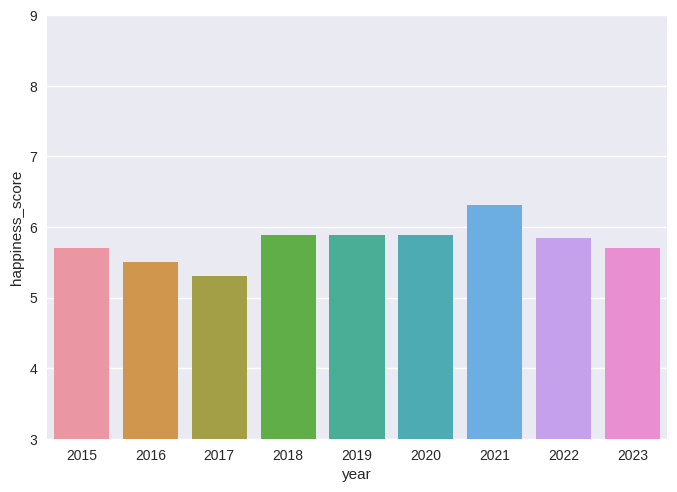

North Cyprus
    year       country          region  happiness_score
65  2015  North Cyprus  Western Europe           5.6950
61  2016  North Cyprus  Western Europe           5.7710
60  2017  North Cyprus  Western Europe           5.8100
75  2020  North Cyprus  Western Europe           5.5355
73  2021  North Cyprus  Western Europe           5.5360
78  2022  North Cyprus  Western Europe           5.4670


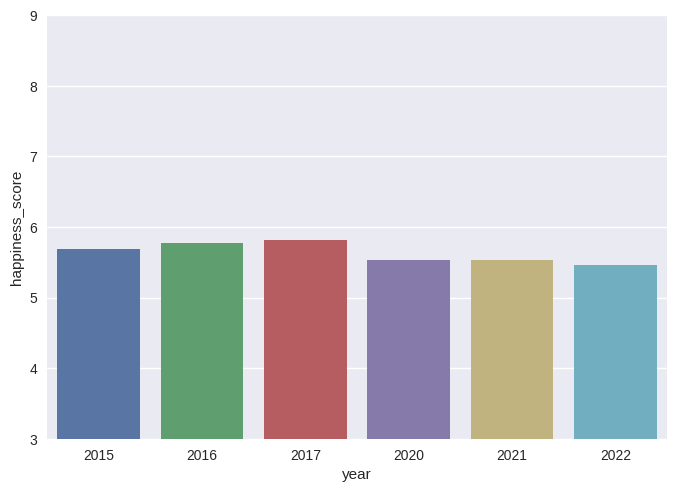

Cyprus
    year country          region  happiness_score
66  2015  Cyprus  Western Europe            5.689
68  2016  Cyprus  Western Europe            5.546
64  2017  Cyprus  Western Europe            5.621
60  2018  Cyprus  Western Europe            5.762
48  2019  Cyprus  Western Europe            6.046
44  2020  Cyprus  Western Europe            6.159
38  2021  Cyprus  Western Europe            6.223
40  2022  Cyprus  Western Europe            6.221
45  2023  Cyprus  Western Europe            6.130


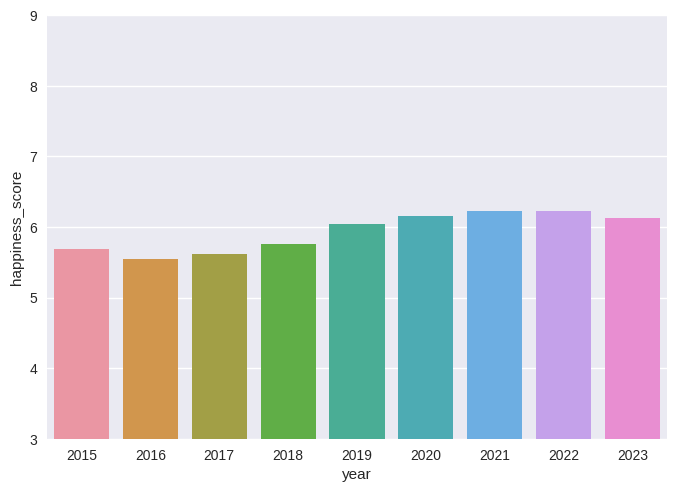

Algeria
     year  country                           region  happiness_score
67   2015  Algeria  Middle East and Northern Africa           5.6050
37   2016  Algeria  Middle East and Northern Africa           6.3550
52   2017  Algeria  Middle East and Northern Africa           5.8720
83   2018  Algeria  Middle East and Northern Africa           5.2950
87   2019  Algeria  Middle East and Northern Africa           5.2110
99   2020  Algeria  Middle East and Northern Africa           5.0051
108  2021  Algeria  Middle East and Northern Africa           4.8870
95   2022  Algeria  Middle East and Northern Africa           5.1220
80   2023  Algeria  Middle East and Northern Africa           5.3290


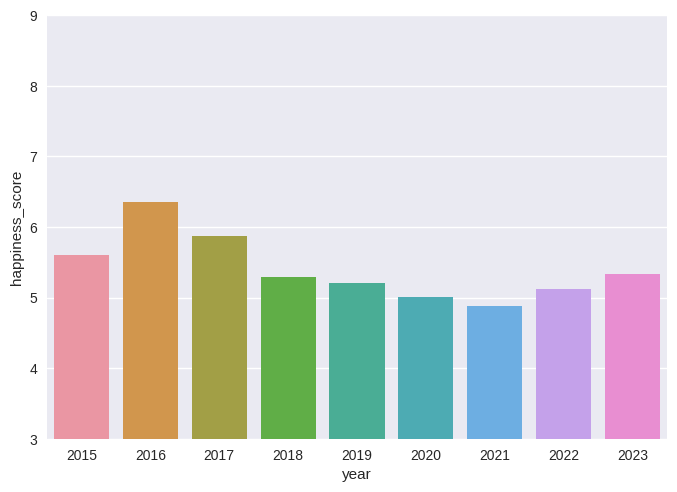

Kosovo
    year country                      region  happiness_score
68  2015  Kosovo  Central and Eastern Europe           5.5890
76  2016  Kosovo  Central and Eastern Europe           5.4010
77  2017  Kosovo  Central and Eastern Europe           5.2790
65  2018  Kosovo  Central and Eastern Europe           5.6620
45  2019  Kosovo  Central and Eastern Europe           6.1000
34  2020  Kosovo  Central and Eastern Europe           6.3252
32  2021  Kosovo  Central and Eastern Europe           6.3720
31  2022  Kosovo  Central and Eastern Europe           6.4550
33  2023  Kosovo  Central and Eastern Europe           6.3680


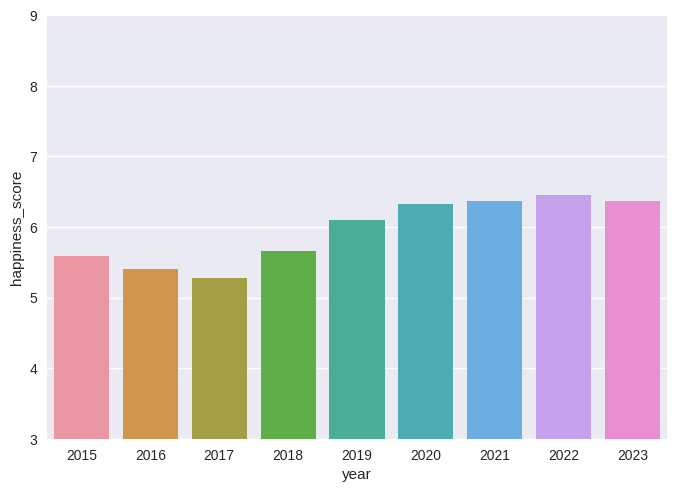

Turkmenistan
    year       country                      region  happiness_score
69  2015  Turkmenistan  Central and Eastern Europe           5.5480
64  2016  Turkmenistan  Central and Eastern Europe           5.6580
58  2017  Turkmenistan  Central and Eastern Europe           5.8220
67  2018  Turkmenistan  Central and Eastern Europe           5.6360
86  2019  Turkmenistan  Central and Eastern Europe           5.2470
94  2020  Turkmenistan  Central and Eastern Europe           5.1191
96  2021  Turkmenistan  Central and Eastern Europe           5.0660
77  2022  Turkmenistan  Central and Eastern Europe           5.4740


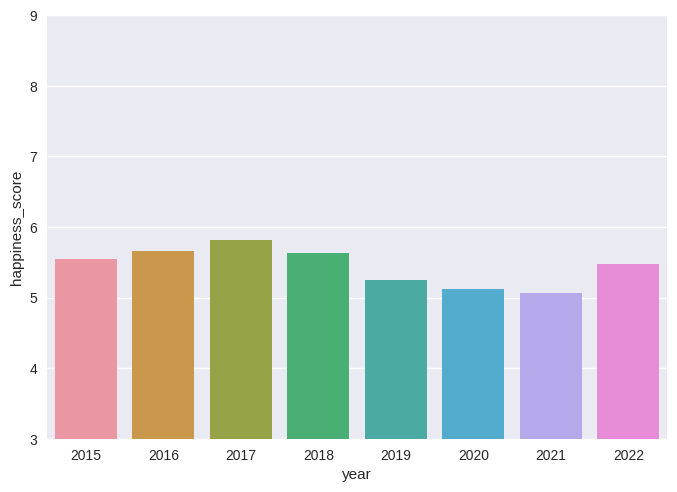

Mauritius
    year    country              region  happiness_score
70  2015  Mauritius  Sub-Saharan Africa           5.4770
65  2016  Mauritius  Sub-Saharan Africa           5.6480
63  2017  Mauritius  Sub-Saharan Africa           5.6290
54  2018  Mauritius  Sub-Saharan Africa           5.8910
56  2019  Mauritius  Sub-Saharan Africa           5.8880
48  2020  Mauritius  Sub-Saharan Africa           6.1013
49  2021  Mauritius  Sub-Saharan Africa           6.0490
51  2022  Mauritius  Sub-Saharan Africa           6.0710
58  2023  Mauritius  Sub-Saharan Africa           5.9020


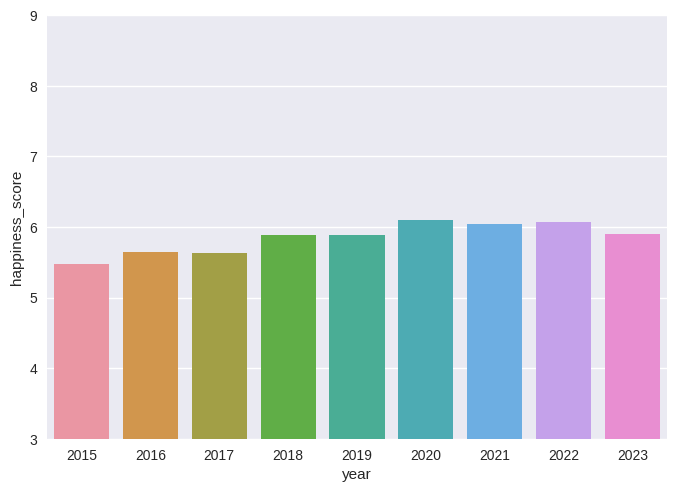

Hong Kong S.A.R. of China
    year                    country        region  happiness_score
71  2015  Hong Kong S.A.R. of China  Eastern Asia           5.4740
74  2016  Hong Kong S.A.R. of China  Eastern Asia           5.4580
70  2017  Hong Kong S.A.R. of China  Eastern Asia           5.4720
75  2018  Hong Kong S.A.R. of China  Eastern Asia           5.4300
75  2019  Hong Kong S.A.R. of China  Eastern Asia           5.4300
77  2020  Hong Kong S.A.R. of China  Eastern Asia           5.5104
76  2021  Hong Kong S.A.R. of China  Eastern Asia           5.4770
80  2022  Hong Kong S.A.R. of China  Eastern Asia           5.4250
81  2023  Hong Kong S.A.R. of China  Eastern Asia           5.3080


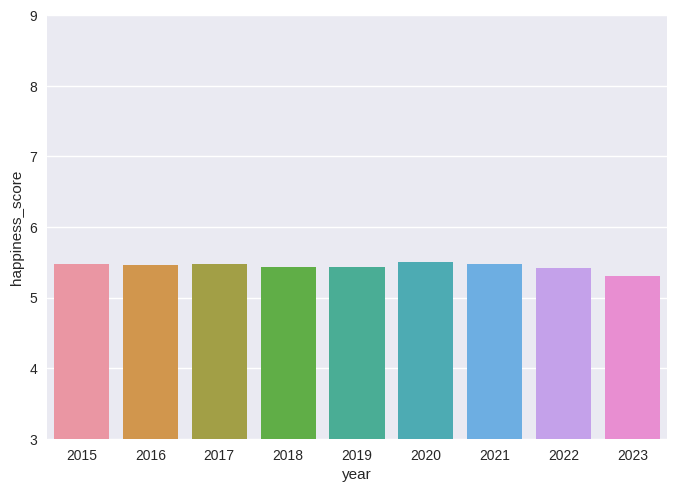

Estonia
    year  country                      region  happiness_score
72  2015  Estonia  Central and Eastern Europe           5.4290
71  2016  Estonia  Central and Eastern Europe           5.5170
65  2017  Estonia  Central and Eastern Europe           5.6110
62  2018  Estonia  Central and Eastern Europe           5.7390
54  2019  Estonia  Central and Eastern Europe           5.8930
50  2020  Estonia  Central and Eastern Europe           6.0218
39  2021  Estonia  Central and Eastern Europe           6.1890
35  2022  Estonia  Central and Eastern Europe           6.3410
30  2023  Estonia  Central and Eastern Europe           6.4550


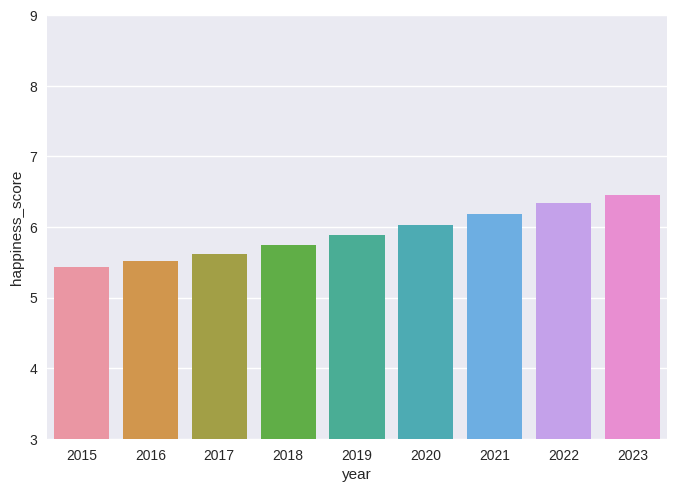

Indonesia
    year    country             region  happiness_score
73  2015  Indonesia  Southeastern Asia           5.3990
78  2016  Indonesia  Southeastern Asia           5.3140
80  2017  Indonesia  Southeastern Asia           5.2620
95  2018  Indonesia  Southeastern Asia           5.0930
91  2019  Indonesia  Southeastern Asia           5.1920
83  2020  Indonesia  Southeastern Asia           5.2856
81  2021  Indonesia  Southeastern Asia           5.3450
86  2022  Indonesia  Southeastern Asia           5.2400
83  2023  Indonesia  Southeastern Asia           5.2770


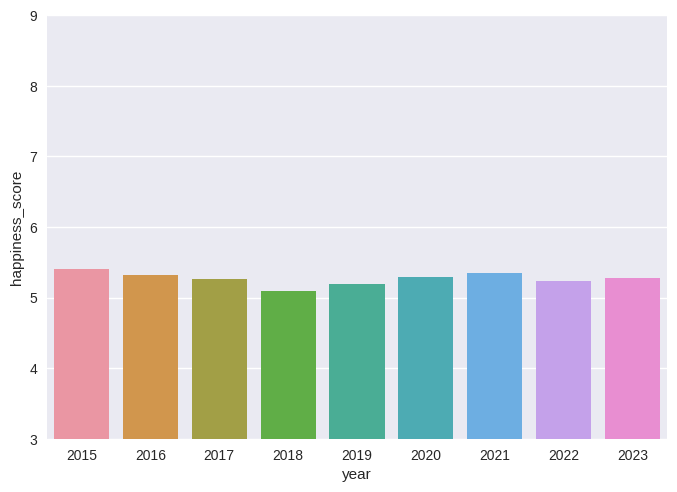

Vietnam
    year  country             region  happiness_score
74  2015  Vietnam  Southeastern Asia           5.3600
95  2016  Vietnam  Southeastern Asia           5.0610
93  2017  Vietnam  Southeastern Asia           5.0740
94  2018  Vietnam  Southeastern Asia           5.1030
93  2019  Vietnam  Southeastern Asia           5.1750
82  2020  Vietnam  Southeastern Asia           5.3535
78  2021  Vietnam  Southeastern Asia           5.4110
76  2022  Vietnam  Southeastern Asia           5.4850
64  2023  Vietnam  Southeastern Asia           5.7630


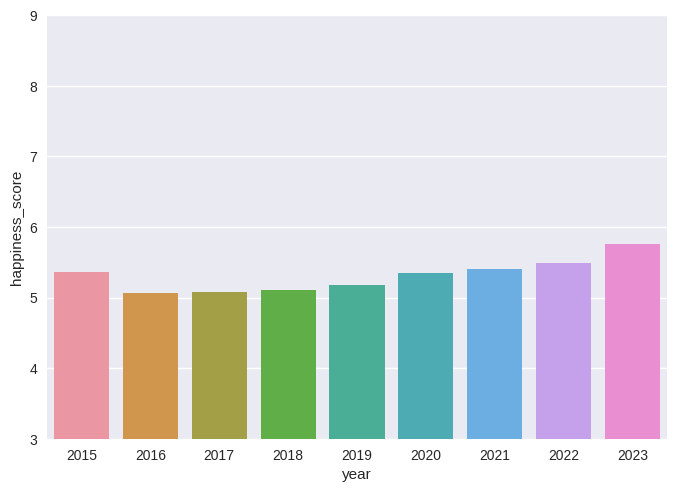

Turkiye
     year  country                           region  happiness_score
75   2015  Turkiye  Middle East and Northern Africa           5.3320
77   2016  Turkiye  Middle East and Northern Africa           5.3890
68   2017  Turkiye  Middle East and Northern Africa           5.5000
73   2018  Turkiye  Middle East and Northern Africa           5.4830
78   2019  Turkiye  Middle East and Northern Africa           5.3730
92   2020  Turkiye  Middle East and Northern Africa           5.1318
103  2021  Turkiye  Middle East and Northern Africa           4.9480
111  2022  Turkiye  Middle East and Northern Africa           4.7440
105  2023  Turkiye  Middle East and Northern Africa           4.6140


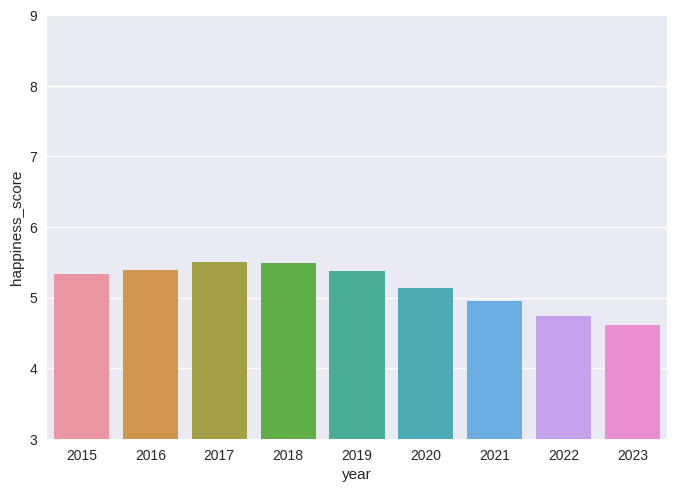

Kyrgyzstan
    year     country                      region  happiness_score
76  2015  Kyrgyzstan  Central and Eastern Europe           5.2860
84  2016  Kyrgyzstan  Central and Eastern Europe           5.1850
97  2017  Kyrgyzstan  Central and Eastern Europe           5.0040
91  2018  Kyrgyzstan  Central and Eastern Europe           5.1310
85  2019  Kyrgyzstan  Central and Eastern Europe           5.2610
73  2020  Kyrgyzstan  Central and Eastern Europe           5.5415
66  2021  Kyrgyzstan  Central and Eastern Europe           5.7440
63  2022  Kyrgyzstan  Central and Eastern Europe           5.8280
61  2023  Kyrgyzstan  Central and Eastern Europe           5.8250


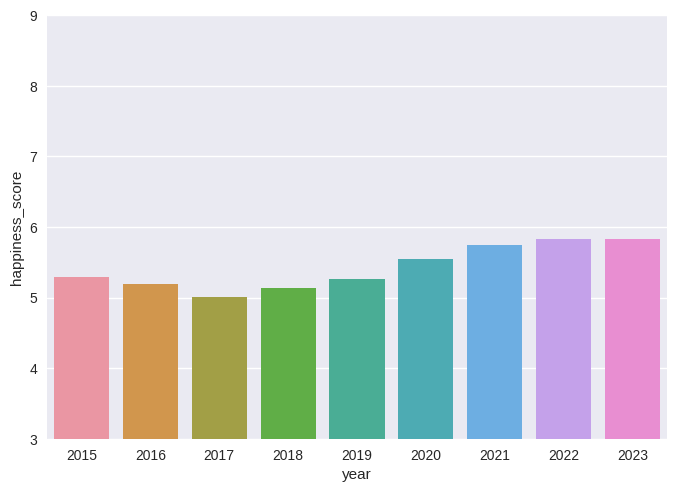

Nigeria
     year  country              region  happiness_score
77   2015  Nigeria  Sub-Saharan Africa           5.2680
102  2016  Nigeria  Sub-Saharan Africa           4.8750
94   2017  Nigeria  Sub-Saharan Africa           5.0740
90   2018  Nigeria  Sub-Saharan Africa           5.1550
84   2019  Nigeria  Sub-Saharan Africa           5.2650
114  2020  Nigeria  Sub-Saharan Africa           4.7241
115  2021  Nigeria  Sub-Saharan Africa           4.7590
117  2022  Nigeria  Sub-Saharan Africa           4.5520
94   2023  Nigeria  Sub-Saharan Africa           4.9810


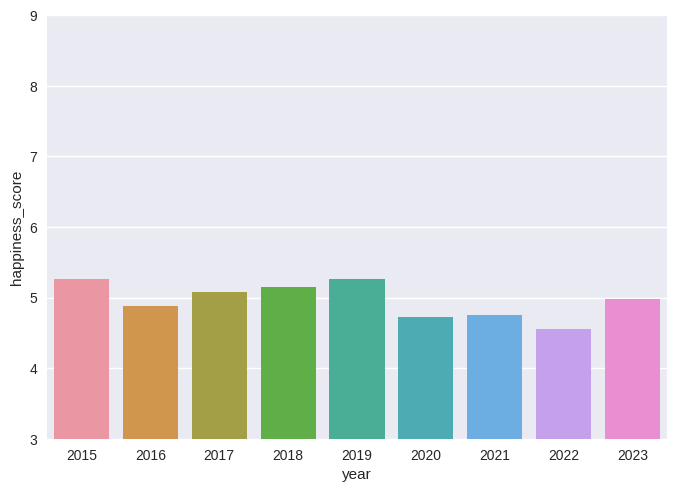

Bhutan
    year country         region  happiness_score
78  2015  Bhutan  Southern Asia            5.253
83  2016  Bhutan  Southern Asia            5.196
96  2017  Bhutan  Southern Asia            5.011
96  2018  Bhutan  Southern Asia            5.082
94  2019  Bhutan  Southern Asia            5.082


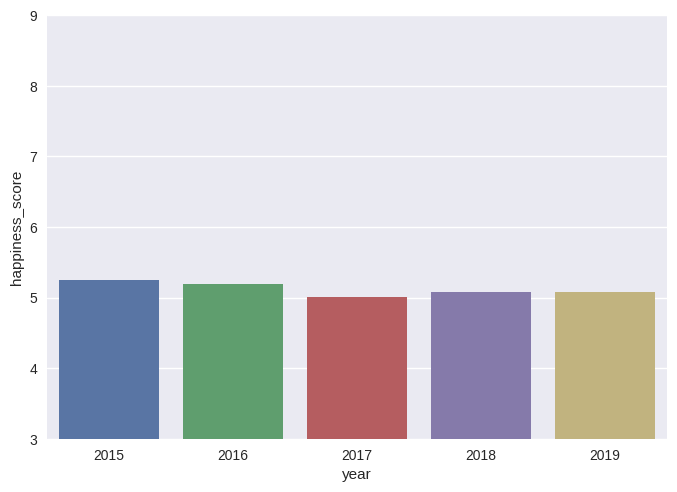

Azerbaijan
    year     country                      region  happiness_score
79  2015  Azerbaijan  Central and Eastern Europe           5.2120
80  2016  Azerbaijan  Central and Eastern Europe           5.2910
84  2017  Azerbaijan  Central and Eastern Europe           5.2340
86  2018  Azerbaijan  Central and Eastern Europe           5.2010
89  2019  Azerbaijan  Central and Eastern Europe           5.2080
88  2020  Azerbaijan  Central and Eastern Europe           5.1648
89  2021  Azerbaijan  Central and Eastern Europe           5.1710
91  2022  Azerbaijan  Central and Eastern Europe           5.1730


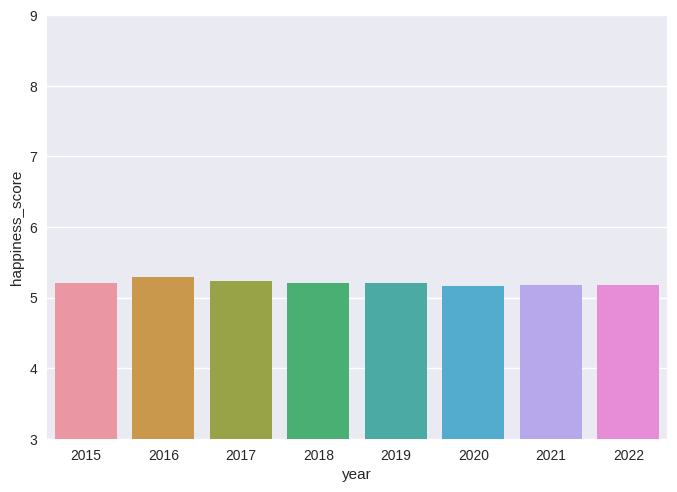

Pakistan
     year   country         region  happiness_score
80   2015  Pakistan  Southern Asia           5.1940
91   2016  Pakistan  Southern Asia           5.1320
79   2017  Pakistan  Southern Asia           5.2690
74   2018  Pakistan  Southern Asia           5.4720
66   2019  Pakistan  Southern Asia           5.6530
65   2020  Pakistan  Southern Asia           5.6933
104  2021  Pakistan  Southern Asia           4.9340
120  2022  Pakistan  Southern Asia           4.5160
107  2023  Pakistan  Southern Asia           4.5550


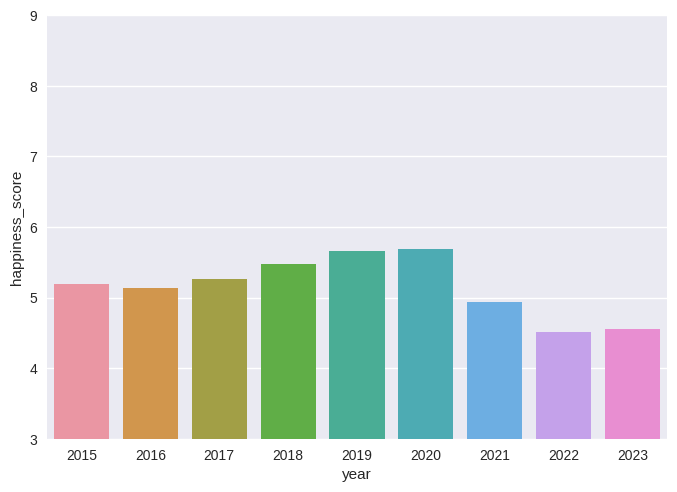

Jordan
     year country                           region  happiness_score
81   2015  Jordan  Middle East and Northern Africa           5.1920
79   2016  Jordan  Middle East and Northern Africa           5.3030
73   2017  Jordan  Middle East and Northern Africa           5.3360
89   2018  Jordan  Middle East and Northern Africa           5.1610
100  2019  Jordan  Middle East and Northern Africa           4.9060
118  2020  Jordan  Middle East and Northern Africa           4.6334
126  2021  Jordan  Middle East and Northern Africa           4.3950
133  2022  Jordan  Middle East and Northern Africa           4.1520
122  2023  Jordan  Middle East and Northern Africa           4.1200


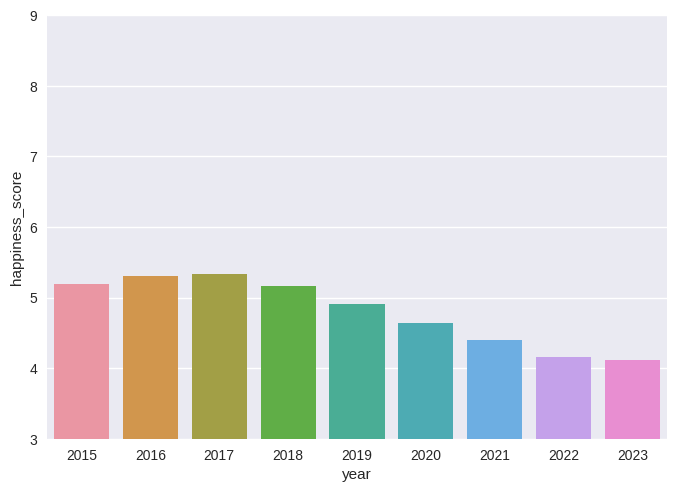

Montenegro
    year     country                      region  happiness_score
82  2015  Montenegro  Central and Eastern Europe           5.1920
87  2016  Montenegro  Central and Eastern Europe           5.1610
82  2017  Montenegro  Central and Eastern Europe           5.2370
80  2018  Montenegro  Central and Eastern Europe           5.3470
72  2019  Montenegro  Central and Eastern Europe           5.5230
71  2020  Montenegro  Central and Eastern Europe           5.5461
71  2021  Montenegro  Central and Eastern Europe           5.5810
74  2022  Montenegro  Central and Eastern Europe           5.5470
66  2023  Montenegro  Central and Eastern Europe           5.7220


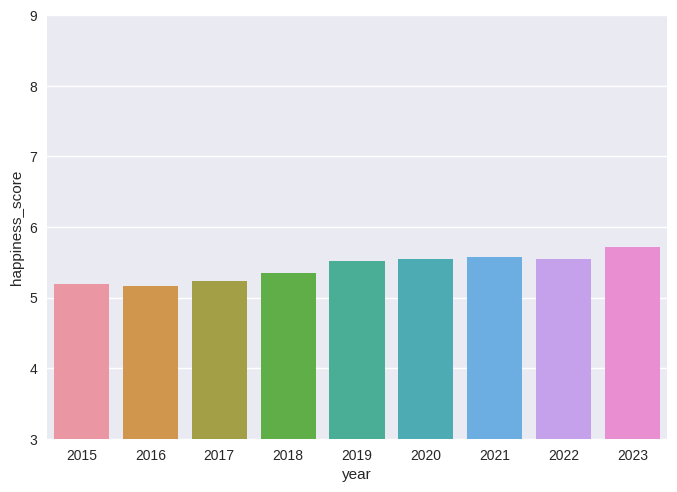

China
    year country        region  happiness_score
83  2015   China  Eastern Asia           5.1400
82  2016   China  Eastern Asia           5.2450
78  2017   China  Eastern Asia           5.2730
85  2018   China  Eastern Asia           5.2460
92  2019   China  Eastern Asia           5.1910
93  2020   China  Eastern Asia           5.1239
83  2021   China  Eastern Asia           5.3390
71  2022   China  Eastern Asia           5.5850
63  2023   China  Eastern Asia           5.8180


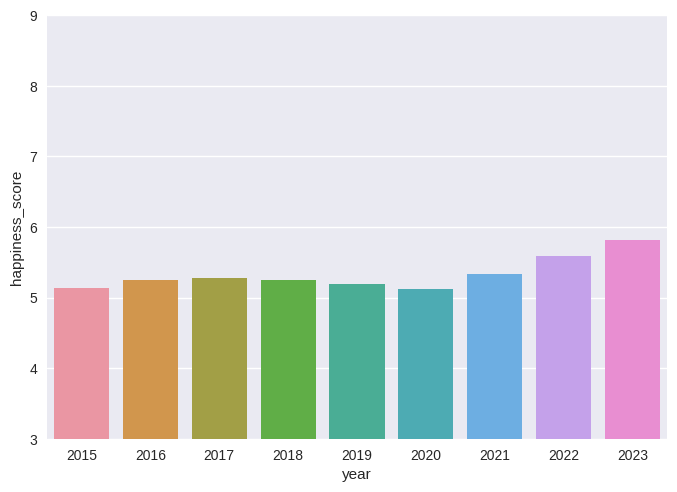

Zambia
     year country              region  happiness_score
84   2015  Zambia  Sub-Saharan Africa           5.1290
105  2016  Zambia  Sub-Saharan Africa           4.7950
115  2017  Zambia  Sub-Saharan Africa           4.5140
124  2018  Zambia  Sub-Saharan Africa           4.3770
137  2019  Zambia  Sub-Saharan Africa           4.1070
140  2020  Zambia  Sub-Saharan Africa           3.7594
136  2021  Zambia  Sub-Saharan Africa           4.0730
136  2022  Zambia  Sub-Saharan Africa           3.7600
127  2023  Zambia  Sub-Saharan Africa           3.9820


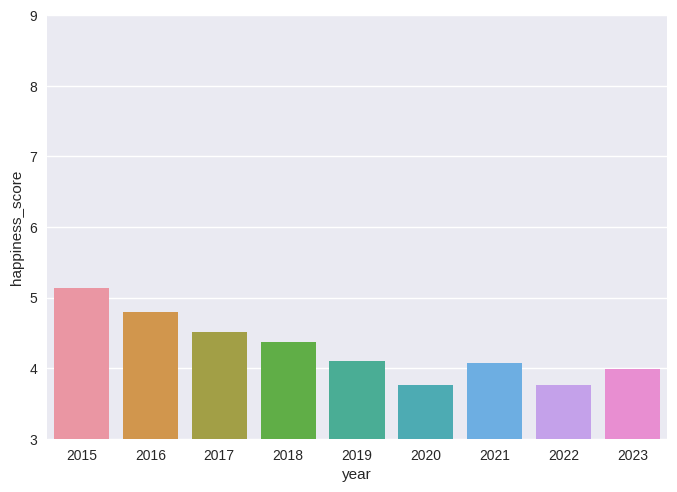

Romania
    year  country                      region  happiness_score
85  2015  Romania  Central and Eastern Europe           5.1240
70  2016  Romania  Central and Eastern Europe           5.5280
56  2017  Romania  Central and Eastern Europe           5.8250
51  2018  Romania  Central and Eastern Europe           5.9450
47  2019  Romania  Central and Eastern Europe           6.0700
46  2020  Romania  Central and Eastern Europe           6.1237
45  2021  Romania  Central and Eastern Europe           6.1400
27  2022  Romania  Central and Eastern Europe           6.4770
23  2023  Romania  Central and Eastern Europe           6.5890


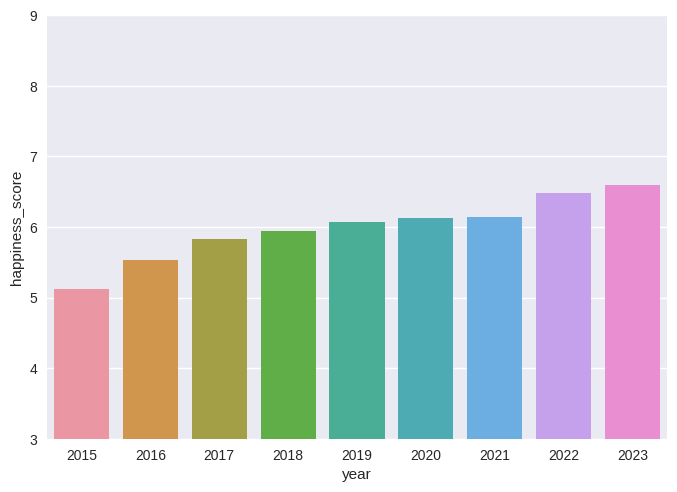

Serbia
    year country                      region  happiness_score
86  2015  Serbia  Central and Eastern Europe           5.1230
85  2016  Serbia  Central and Eastern Europe           5.1770
72  2017  Serbia  Central and Eastern Europe           5.3950
77  2018  Serbia  Central and Eastern Europe           5.3980
69  2019  Serbia  Central and Eastern Europe           5.6030
63  2020  Serbia  Central and Eastern Europe           5.7782
47  2021  Serbia  Central and Eastern Europe           6.0780
42  2022  Serbia  Central and Eastern Europe           6.1780
44  2023  Serbia  Central and Eastern Europe           6.1440


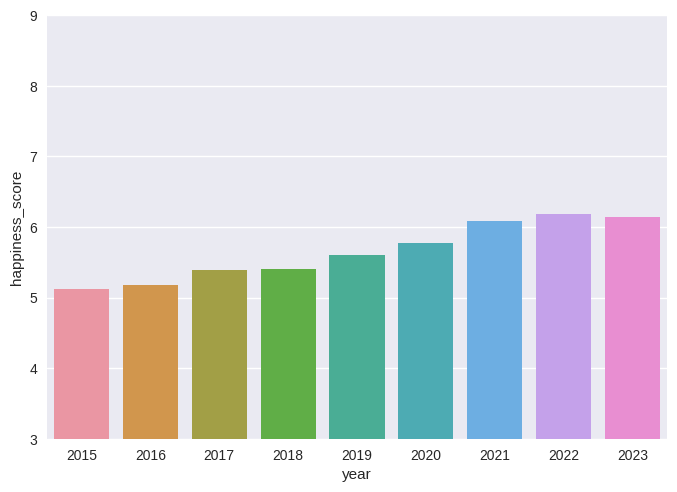

Portugal
    year   country          region  happiness_score
87  2015  Portugal  Western Europe           5.1020
93  2016  Portugal  Western Europe           5.1230
88  2017  Portugal  Western Europe           5.1950
76  2018  Portugal  Western Europe           5.4100
65  2019  Portugal  Western Europe           5.6930
58  2020  Portugal  Western Europe           5.9109
57  2021  Portugal  Western Europe           5.9290
55  2022  Portugal  Western Europe           6.0160
55  2023  Portugal  Western Europe           5.9680


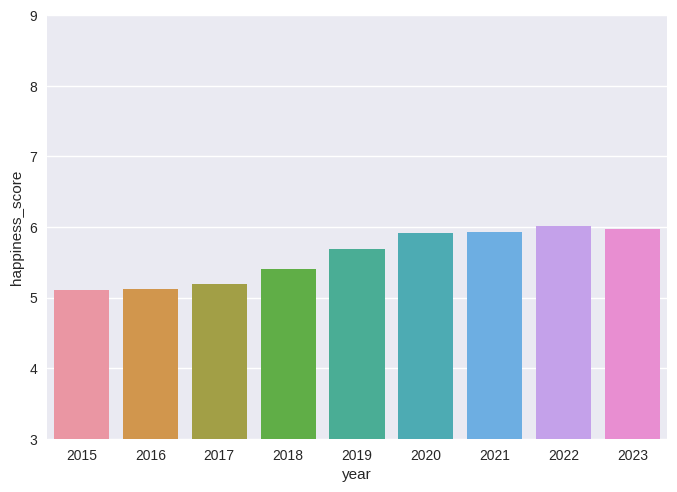

Latvia
    year country                      region  happiness_score
88  2015  Latvia  Central and Eastern Europe            5.098
67  2016  Latvia  Central and Eastern Europe            5.560
53  2017  Latvia  Central and Eastern Europe            5.850
52  2018  Latvia  Central and Eastern Europe            5.933
52  2019  Latvia  Central and Eastern Europe            5.940
56  2020  Latvia  Central and Eastern Europe            5.950
50  2021  Latvia  Central and Eastern Europe            6.032
41  2022  Latvia  Central and Eastern Europe            6.180
40  2023  Latvia  Central and Eastern Europe            6.213


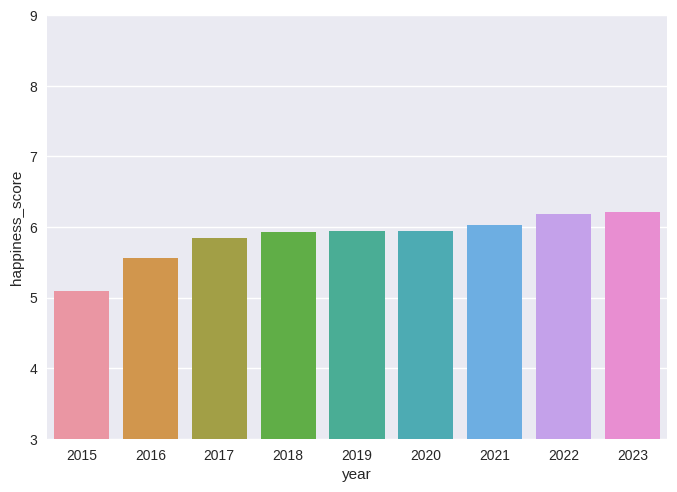

Philippines
    year      country             region  happiness_score
89  2015  Philippines  Southeastern Asia            5.073
81  2016  Philippines  Southeastern Asia            5.279
71  2017  Philippines  Southeastern Asia            5.430
70  2018  Philippines  Southeastern Asia            5.524
68  2019  Philippines  Southeastern Asia            5.631
51  2020  Philippines  Southeastern Asia            6.006
60  2021  Philippines  Southeastern Asia            5.880
59  2022  Philippines  Southeastern Asia            5.904
75  2023  Philippines  Southeastern Asia            5.523


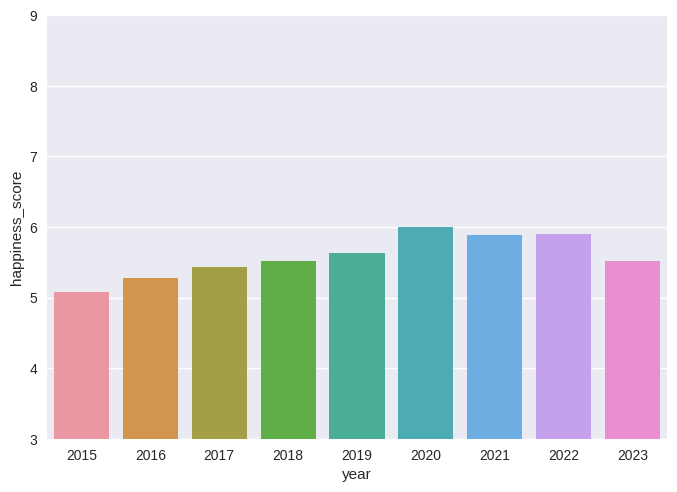

Somaliland region
    year            country              region  happiness_score
90  2015  Somaliland region  Sub-Saharan Africa            5.057


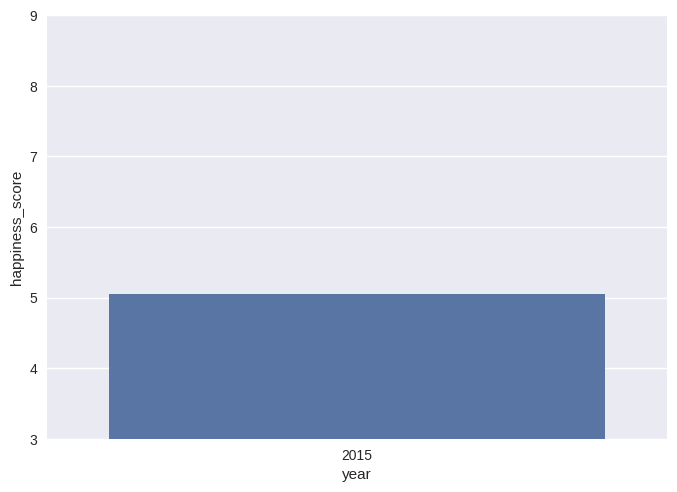

Morocco
     year  country                           region  happiness_score
91   2015  Morocco  Middle East and Northern Africa           5.0130
89   2016  Morocco  Middle East and Northern Africa           5.1510
83   2017  Morocco  Middle East and Northern Africa           5.2350
84   2018  Morocco  Middle East and Northern Africa           5.2540
88   2019  Morocco  Middle East and Northern Africa           5.2080
96   2020  Morocco  Middle East and Northern Africa           5.0948
105  2021  Morocco  Middle East and Northern Africa           4.9180
99   2022  Morocco  Middle East and Northern Africa           5.0600
99   2023  Morocco  Middle East and Northern Africa           4.9030


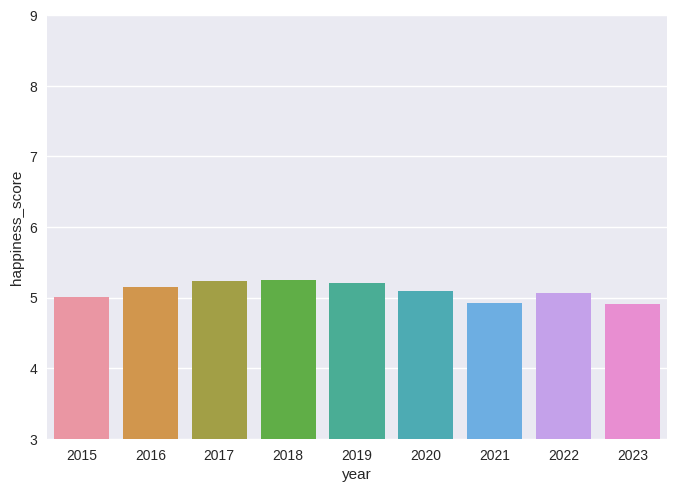

North Macedonia
    year          country                      region  happiness_score
92  2015  North Macedonia  Central and Eastern Europe           5.0070
94  2016  North Macedonia  Central and Eastern Europe           5.1210
91  2017  North Macedonia  Central and Eastern Europe           5.1750
88  2018  North Macedonia  Central and Eastern Europe           5.1850
83  2019  North Macedonia  Central and Eastern Europe           5.2740
89  2020  North Macedonia  Central and Eastern Europe           5.1598
93  2021  North Macedonia  Central and Eastern Europe           5.1010
88  2022  North Macedonia  Central and Eastern Europe           5.1990
86  2023  North Macedonia  Central and Eastern Europe           5.2540


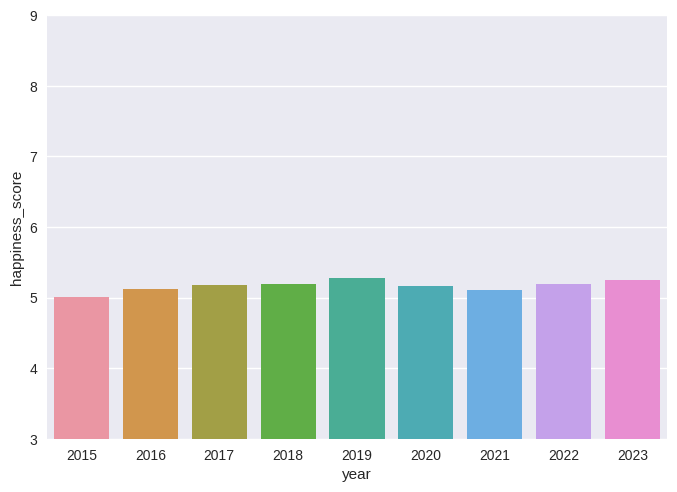

Mozambique
     year     country              region  happiness_score
93   2015  Mozambique  Sub-Saharan Africa           4.9710
112  2017  Mozambique  Sub-Saharan Africa           4.5500
122  2018  Mozambique  Sub-Saharan Africa           4.4170
122  2019  Mozambique  Sub-Saharan Africa           4.4660
119  2020  Mozambique  Sub-Saharan Africa           4.6236
114  2021  Mozambique  Sub-Saharan Africa           4.7940
100  2022  Mozambique  Sub-Saharan Africa           5.0480
96   2023  Mozambique  Sub-Saharan Africa           4.9540


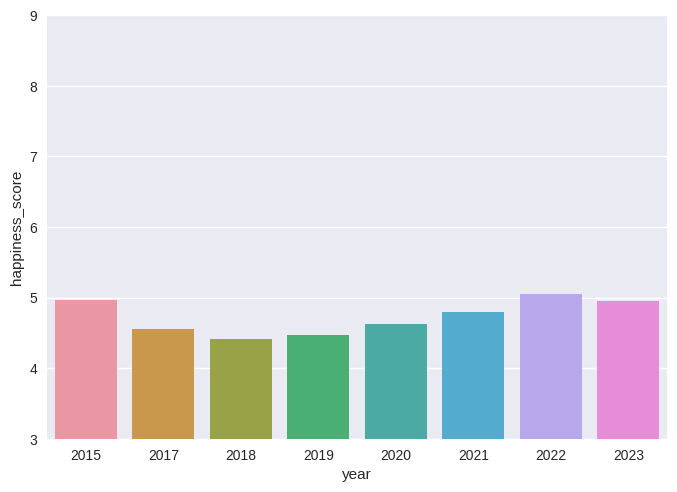

Albania
     year  country                      region  happiness_score
94   2015  Albania  Central and Eastern Europe           4.9590
108  2016  Albania  Central and Eastern Europe           4.6550
108  2017  Albania  Central and Eastern Europe           4.6440
111  2018  Albania  Central and Eastern Europe           4.5860
106  2019  Albania  Central and Eastern Europe           4.7190
104  2020  Albania  Central and Eastern Europe           4.8827
92   2021  Albania  Central and Eastern Europe           5.1170
89   2022  Albania  Central and Eastern Europe           5.1990
82   2023  Albania  Central and Eastern Europe           5.2770


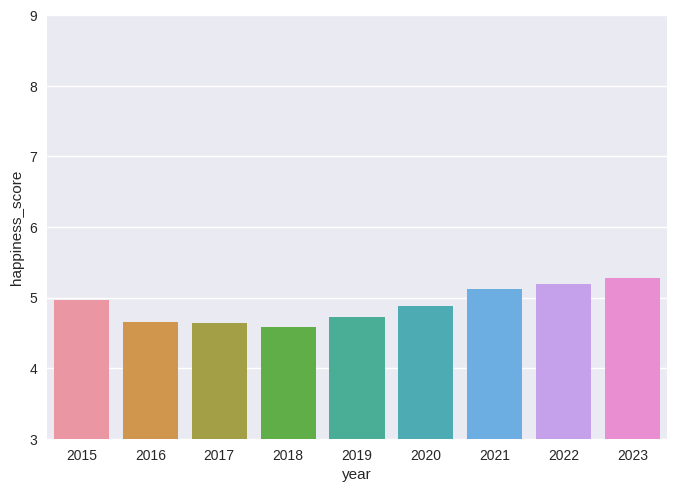

Bosnia and Herzegovina
    year                 country                      region  happiness_score
95  2015  Bosnia and Herzegovina  Central and Eastern Europe           4.9490
86  2016  Bosnia and Herzegovina  Central and Eastern Europe           5.1630
89  2017  Bosnia and Herzegovina  Central and Eastern Europe           5.1820
92  2018  Bosnia and Herzegovina  Central and Eastern Europe           5.1290
77  2019  Bosnia and Herzegovina  Central and Eastern Europe           5.3860
68  2020  Bosnia and Herzegovina  Central and Eastern Europe           5.6741
63  2021  Bosnia and Herzegovina  Central and Eastern Europe           5.8130
66  2022  Bosnia and Herzegovina  Central and Eastern Europe           5.7680
70  2023  Bosnia and Herzegovina  Central and Eastern Europe           5.6330


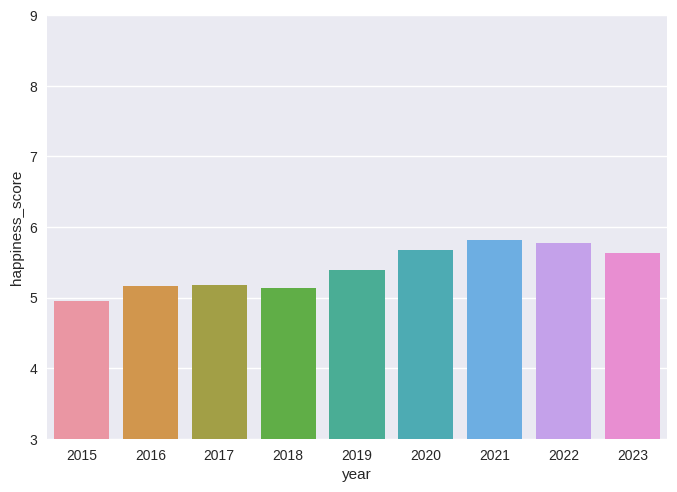

Lesotho
     year  country              region  happiness_score
96   2015  Lesotho  Sub-Saharan Africa           4.8980
138  2017  Lesotho  Sub-Saharan Africa           3.8080
140  2018  Lesotho  Sub-Saharan Africa           3.8080
143  2019  Lesotho  Sub-Saharan Africa           3.8020
142  2020  Lesotho  Sub-Saharan Africa           3.6528
144  2021  Lesotho  Sub-Saharan Africa           3.5120
140  2022  Lesotho  Sub-Saharan Africa           3.5120


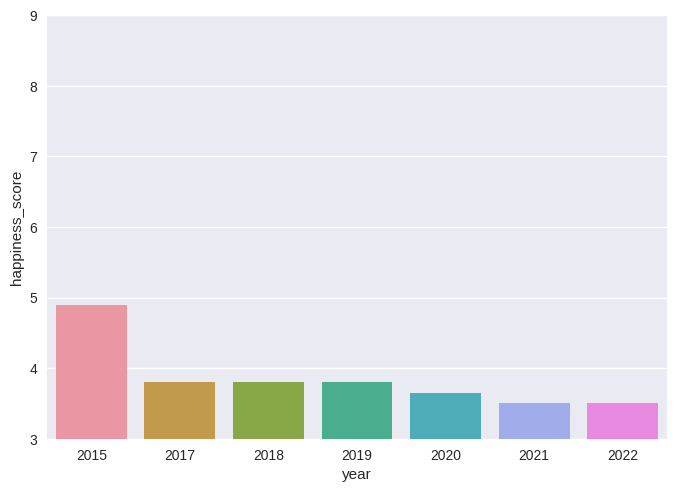

Dominican Republic
    year             country                       region  happiness_score
97  2015  Dominican Republic  Latin America and Caribbean           4.8850
88  2016  Dominican Republic  Latin America and Caribbean           5.1550
85  2017  Dominican Republic  Latin America and Caribbean           5.2300
82  2018  Dominican Republic  Latin America and Caribbean           5.3020
76  2019  Dominican Republic  Latin America and Caribbean           5.4250
67  2020  Dominican Republic  Latin America and Caribbean           5.6892
72  2021  Dominican Republic  Latin America and Caribbean           5.5450
68  2022  Dominican Republic  Latin America and Caribbean           5.7370
72  2023  Dominican Republic  Latin America and Caribbean           5.5690


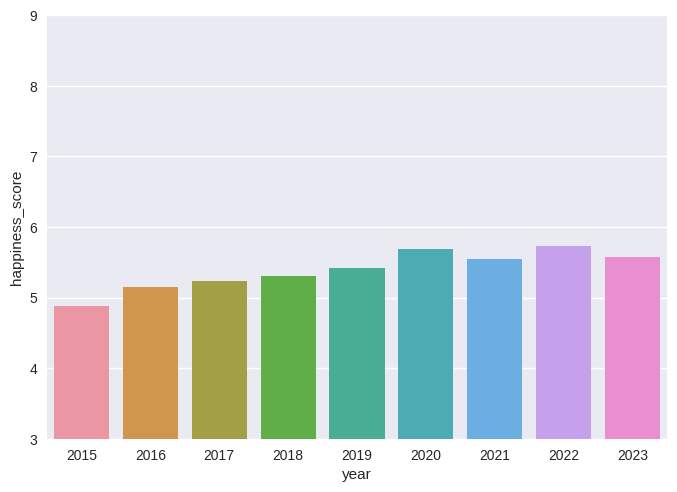

Laos
     year country             region  happiness_score
98   2015    Laos  Southeastern Asia           4.8760
101  2016    Laos  Southeastern Asia           4.8760
109  2018    Laos  Southeastern Asia           4.6230
104  2019    Laos  Southeastern Asia           4.7960
103  2020    Laos  Southeastern Asia           4.8886
99   2021    Laos  Southeastern Asia           5.0300
94   2022    Laos  Southeastern Asia           5.1400
88   2023    Laos  Southeastern Asia           5.1110


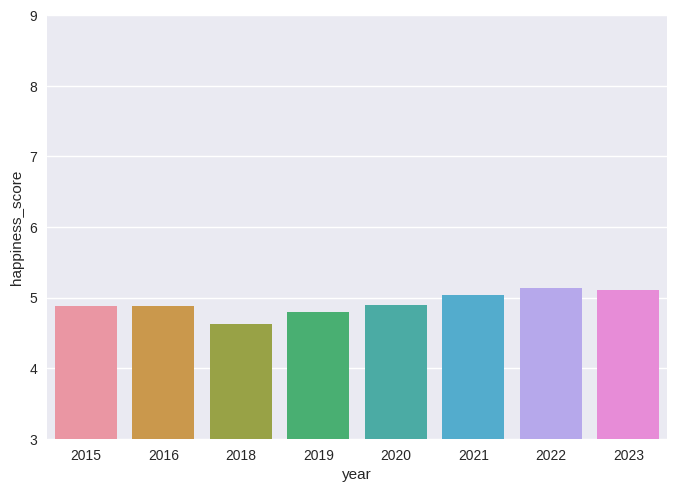

Mongolia
     year   country        region  happiness_score
99   2015  Mongolia  Eastern Asia           4.8740
100  2016  Mongolia  Eastern Asia           4.9070
99   2017  Mongolia  Eastern Asia           4.9550
93   2018  Mongolia  Eastern Asia           5.1250
82   2019  Mongolia  Eastern Asia           5.2850
80   2020  Mongolia  Eastern Asia           5.4562
69   2021  Mongolia  Eastern Asia           5.6770
67   2022  Mongolia  Eastern Asia           5.7610
60   2023  Mongolia  Eastern Asia           5.8400


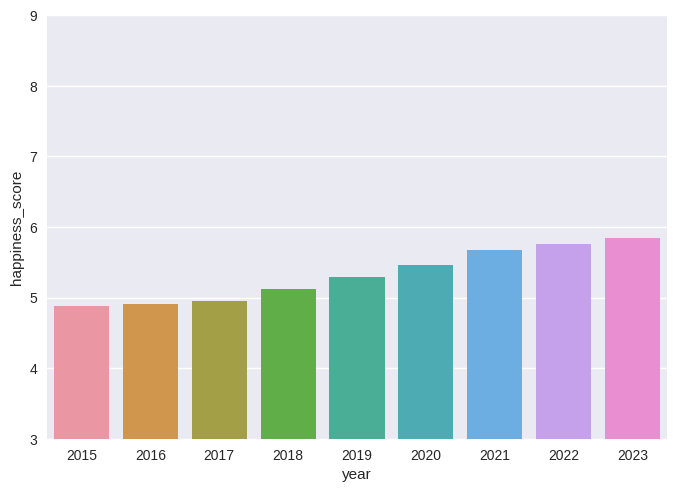

Swaziland
     year    country              region  happiness_score
100  2015  Swaziland  Sub-Saharan Africa           4.8670
134  2019  Swaziland  Sub-Saharan Africa           4.2120
131  2020  Swaziland  Sub-Saharan Africa           4.3081
129  2021  Swaziland  Sub-Saharan Africa           4.3080


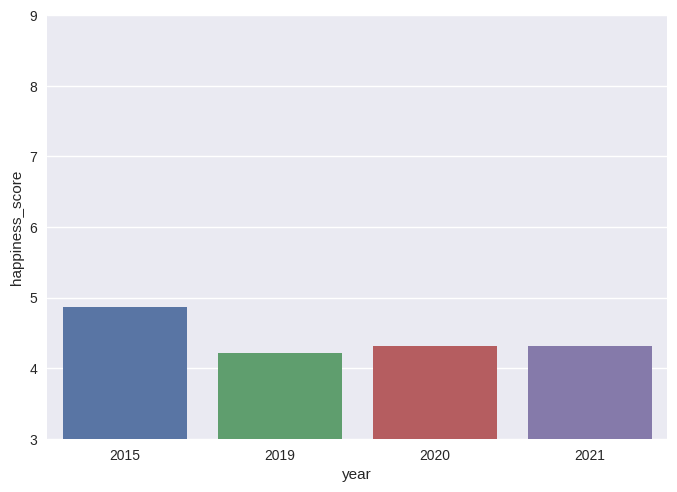

Greece
     year country          region  happiness_score
101  2015  Greece  Western Europe            4.857
98   2016  Greece  Western Europe            5.033
86   2017  Greece  Western Europe            5.227
78   2018  Greece  Western Europe            5.358
81   2019  Greece  Western Europe            5.287
76   2020  Greece  Western Europe            5.515
67   2021  Greece  Western Europe            5.723
57   2022  Greece  Western Europe            5.948
57   2023  Greece  Western Europe            5.931


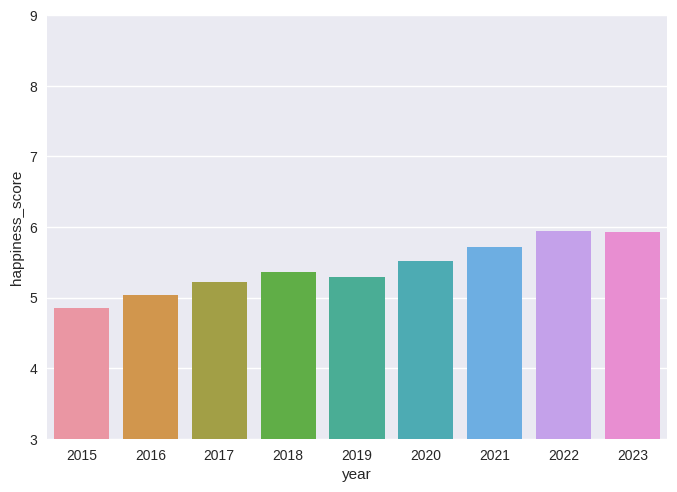

Lebanon
     year  country                           region  happiness_score
102  2015  Lebanon  Middle East and Northern Africa           4.8390
92   2016  Lebanon  Middle East and Northern Africa           5.1290
87   2017  Lebanon  Middle East and Northern Africa           5.2250
79   2018  Lebanon  Middle East and Northern Africa           5.3580
90   2019  Lebanon  Middle East and Northern Africa           5.1970
110  2020  Lebanon  Middle East and Northern Africa           4.7715
122  2021  Lebanon  Middle East and Northern Africa           4.5840
144  2022  Lebanon  Middle East and Northern Africa           2.9550
135  2023  Lebanon  Middle East and Northern Africa           2.3920


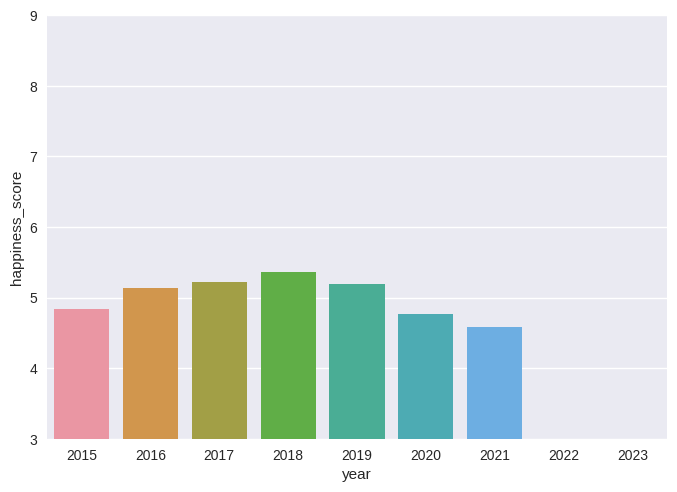

Hungary
     year  country                      region  happiness_score
103  2015  Hungary  Central and Eastern Europe           4.8000
90   2016  Hungary  Central and Eastern Europe           5.1450
74   2017  Hungary  Central and Eastern Europe           5.3240
68   2018  Hungary  Central and Eastern Europe           5.6200
61   2019  Hungary  Central and Eastern Europe           5.7580
52   2020  Hungary  Central and Eastern Europe           6.0004
52   2021  Hungary  Central and Eastern Europe           5.9920
50   2022  Hungary  Central and Eastern Europe           6.0860
50   2023  Hungary  Central and Eastern Europe           6.0410


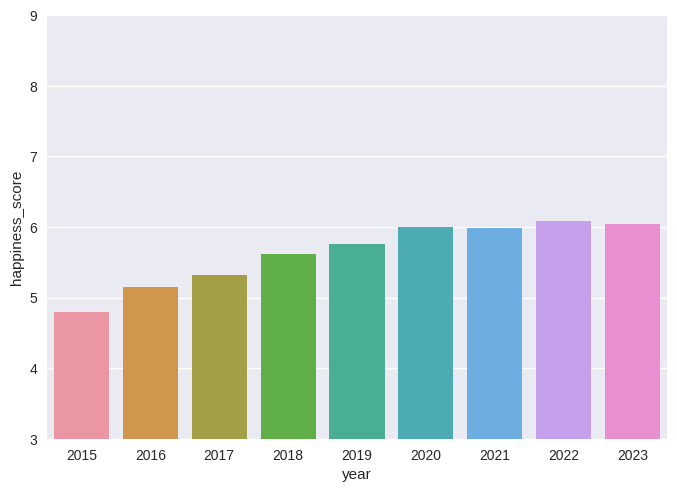

Honduras
     year   country                       region  happiness_score
104  2015  Honduras  Latin America and Caribbean           4.7880
103  2016  Honduras  Latin America and Caribbean           4.8710
90   2017  Honduras  Latin America and Caribbean           5.1810
71   2018  Honduras  Latin America and Caribbean           5.5040
58   2019  Honduras  Latin America and Caribbean           5.8600
55   2020  Honduras  Latin America and Caribbean           5.9532
58   2021  Honduras  Latin America and Caribbean           5.9190
54   2022  Honduras  Latin America and Caribbean           6.0220
52   2023  Honduras  Latin America and Caribbean           6.0230


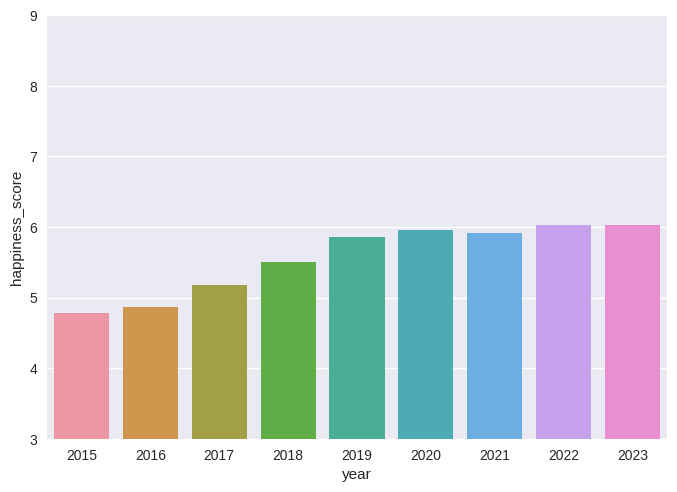

Tajikistan
     year     country                      region  happiness_score
105  2015  Tajikistan  Central and Eastern Europe           4.7860
99   2016  Tajikistan  Central and Eastern Europe           4.9960
95   2017  Tajikistan  Central and Eastern Europe           5.0410
87   2018  Tajikistan  Central and Eastern Europe           5.1990
73   2019  Tajikistan  Central and Eastern Europe           5.4670
70   2020  Tajikistan  Central and Eastern Europe           5.5557
77   2021  Tajikistan  Central and Eastern Europe           5.4660
82   2022  Tajikistan  Central and Eastern Europe           5.3770
79   2023  Tajikistan  Central and Eastern Europe           5.3300


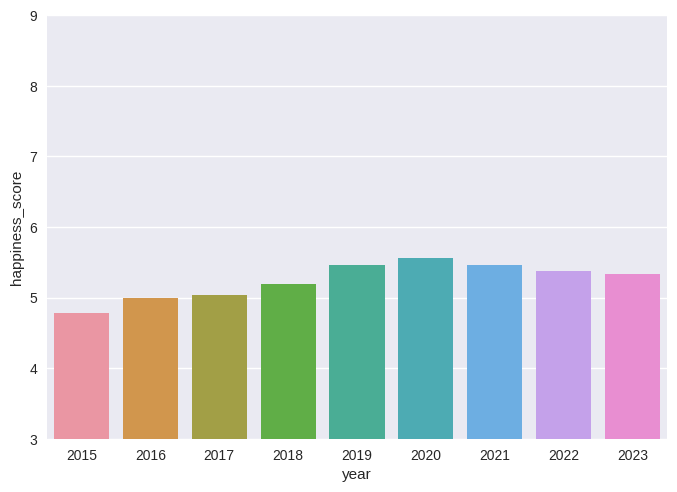

Tunisia
     year  country                           region  happiness_score
106  2015  Tunisia  Middle East and Northern Africa           4.7390
97   2016  Tunisia  Middle East and Northern Africa           5.0450
101  2017  Tunisia  Middle East and Northern Africa           4.8050
110  2018  Tunisia  Middle East and Northern Africa           4.5920
123  2019  Tunisia  Middle East and Northern Africa           4.4610
127  2020  Tunisia  Middle East and Northern Africa           4.3922
121  2021  Tunisia  Middle East and Northern Africa           4.5960
119  2022  Tunisia  Middle East and Northern Africa           4.5160
109  2023  Tunisia  Middle East and Northern Africa           4.4970


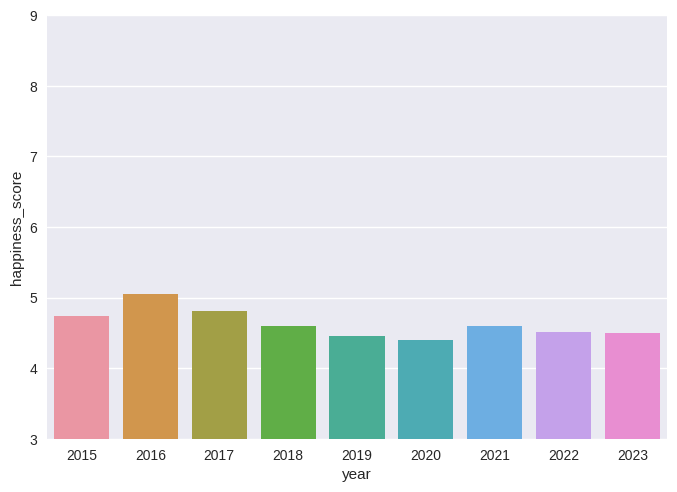

State of Palestine
     year             country                           region  \
107  2015  State of Palestine  Middle East and Northern Africa   
107  2016  State of Palestine  Middle East and Northern Africa   
102  2017  State of Palestine  Middle East and Northern Africa   
103  2018  State of Palestine  Middle East and Northern Africa   
109  2019  State of Palestine  Middle East and Northern Africa   
124  2020  State of Palestine  Middle East and Northern Africa   
124  2021  State of Palestine  Middle East and Northern Africa   
98   2023  State of Palestine  Middle East and Northern Africa   

     happiness_score  
107           4.7150  
107           4.7540  
102           4.7750  
103           4.7430  
109           4.6960  
124           4.5528  
124           4.5170  
98            4.9080  


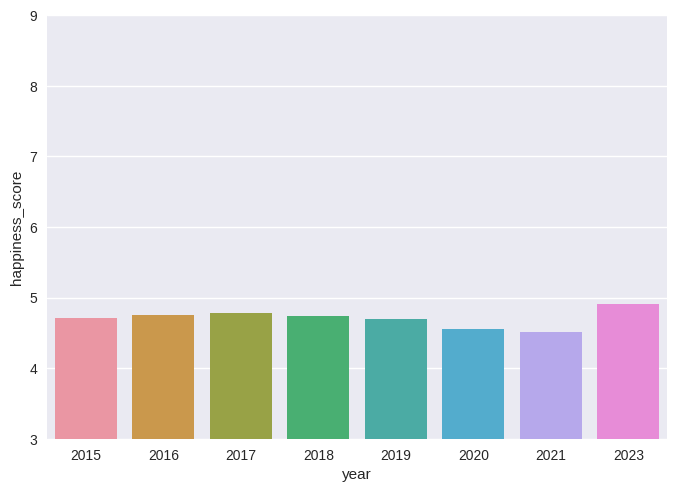

Bangladesh
     year     country         region  happiness_score
108  2015  Bangladesh  Southern Asia           4.6940
109  2016  Bangladesh  Southern Asia           4.6430
109  2017  Bangladesh  Southern Asia           4.6080
114  2018  Bangladesh  Southern Asia           4.5000
124  2019  Bangladesh  Southern Asia           4.4560
106  2020  Bangladesh  Southern Asia           4.8328
100  2021  Bangladesh  Southern Asia           5.0250
93   2022  Bangladesh  Southern Asia           5.1550
117  2023  Bangladesh  Southern Asia           4.2820


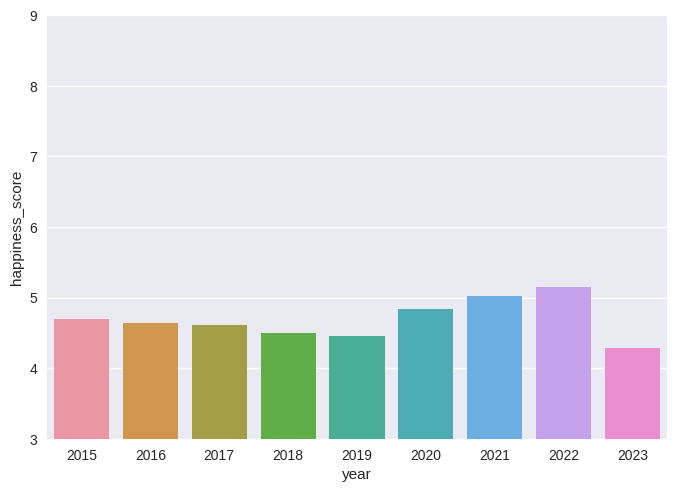

Iran
     year country                           region  happiness_score
109  2015    Iran  Middle East and Northern Africa           4.6860
104  2016    Iran  Middle East and Northern Africa           4.8130
107  2017    Iran  Middle East and Northern Africa           4.6920
105  2018    Iran  Middle East and Northern Africa           4.7070
116  2019    Iran  Middle East and Northern Africa           4.5480
117  2020    Iran  Middle East and Northern Africa           4.6724
117  2021    Iran  Middle East and Northern Africa           4.7210
109  2022    Iran  Middle East and Northern Africa           4.8880
100  2023    Iran  Middle East and Northern Africa           4.8760


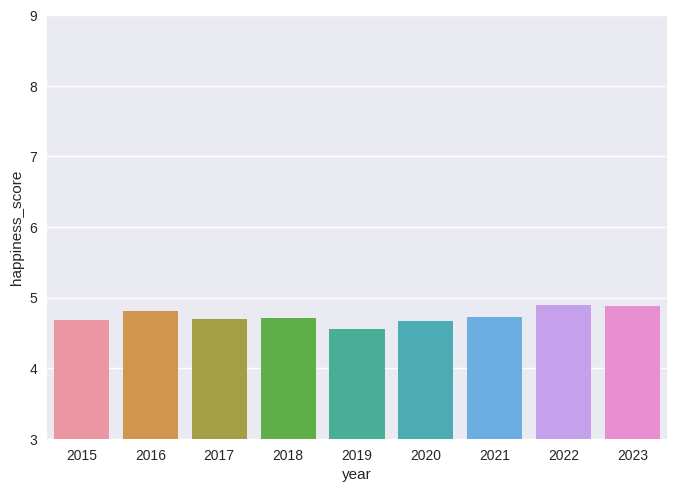

Ukraine
     year  country                      region  happiness_score
110  2015  Ukraine  Central and Eastern Europe           4.6810
122  2016  Ukraine  Central and Eastern Europe           4.3240
131  2017  Ukraine  Central and Eastern Europe           4.0960
137  2018  Ukraine  Central and Eastern Europe           4.1030
132  2019  Ukraine  Central and Eastern Europe           4.3320
122  2020  Ukraine  Central and Eastern Europe           4.5607
109  2021  Ukraine  Central and Eastern Europe           4.8750
97   2022  Ukraine  Central and Eastern Europe           5.0840
91   2023  Ukraine  Central and Eastern Europe           5.0710


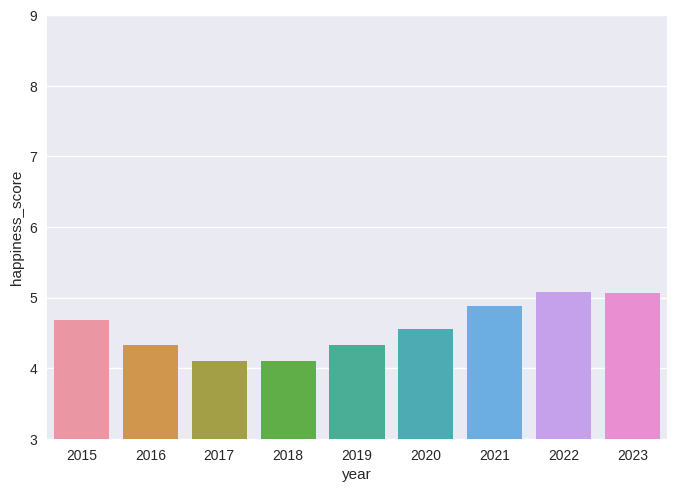

Iraq
     year country                           region  happiness_score
111  2015    Iraq  Middle East and Northern Africa           4.6770
111  2016    Iraq  Middle East and Northern Africa           4.5750
116  2017    Iraq  Middle East and Northern Africa           4.4970
116  2018    Iraq  Middle East and Northern Africa           4.4560
125  2019    Iraq  Middle East and Northern Africa           4.4370
109  2020    Iraq  Middle East and Northern Africa           4.7848
110  2021    Iraq  Middle East and Northern Africa           4.8540
106  2022    Iraq  Middle East and Northern Africa           4.9410
97   2023    Iraq  Middle East and Northern Africa           4.9410


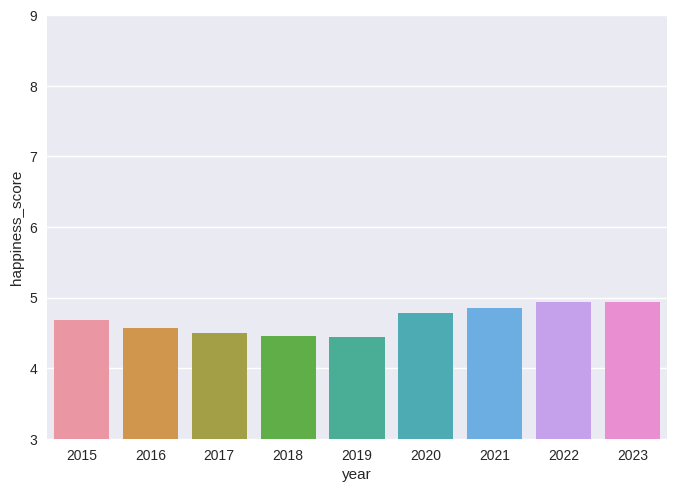

South Africa
     year       country              region  happiness_score
112  2015  South Africa  Sub-Saharan Africa           4.6420
115  2016  South Africa  Sub-Saharan Africa           4.4590
100  2017  South Africa  Sub-Saharan Africa           4.8290
104  2018  South Africa  Sub-Saharan Africa           4.7240
105  2019  South Africa  Sub-Saharan Africa           4.7220
108  2020  South Africa  Sub-Saharan Africa           4.8141
102  2021  South Africa  Sub-Saharan Africa           4.9560
90   2022  South Africa  Sub-Saharan Africa           5.1940
84   2023  South Africa  Sub-Saharan Africa           5.2750


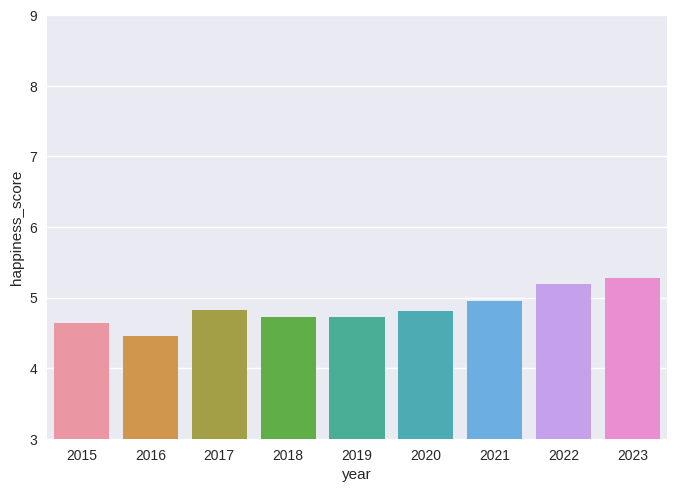

Ghana
     year country              region  happiness_score
113  2015   Ghana  Sub-Saharan Africa            4.633
123  2016   Ghana  Sub-Saharan Africa            4.276
130  2017   Ghana  Sub-Saharan Africa            4.120
107  2018   Ghana  Sub-Saharan Africa            4.657
97   2019   Ghana  Sub-Saharan Africa            4.996
90   2020   Ghana  Sub-Saharan Africa            5.148
94   2021   Ghana  Sub-Saharan Africa            5.088
110  2022   Ghana  Sub-Saharan Africa            4.872
106  2023   Ghana  Sub-Saharan Africa            4.605


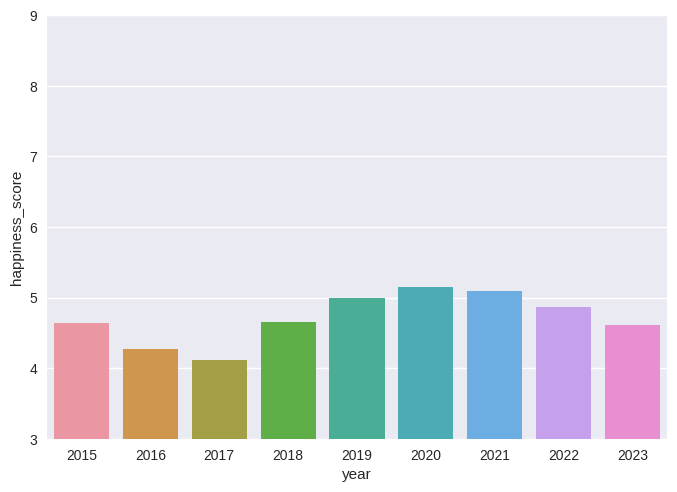

Zimbabwe
     year   country              region  happiness_score
114  2015  Zimbabwe  Sub-Saharan Africa           4.6100
130  2016  Zimbabwe  Sub-Saharan Africa           4.1930
137  2017  Zimbabwe  Sub-Saharan Africa           3.8750
143  2018  Zimbabwe  Sub-Saharan Africa           3.6920
145  2019  Zimbabwe  Sub-Saharan Africa           3.6630
150  2020  Zimbabwe  Sub-Saharan Africa           3.2992
147  2021  Zimbabwe  Sub-Saharan Africa           3.1450
143  2022  Zimbabwe  Sub-Saharan Africa           2.9950
133  2023  Zimbabwe  Sub-Saharan Africa           3.2040


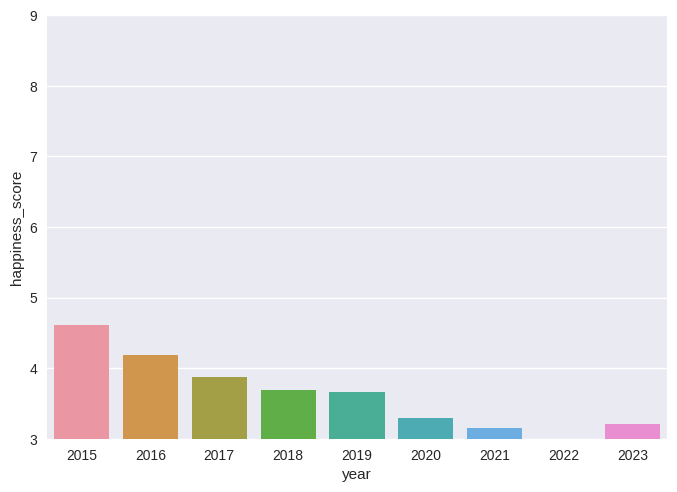

Liberia
     year  country              region  happiness_score
115  2015  Liberia  Sub-Saharan Africa           4.5710
149  2016  Liberia  Sub-Saharan Africa           3.6220
147  2017  Liberia  Sub-Saharan Africa           3.5330
148  2018  Liberia  Sub-Saharan Africa           3.4950
140  2019  Liberia  Sub-Saharan Africa           3.9750
123  2020  Liberia  Sub-Saharan Africa           4.5579
119  2021  Liberia  Sub-Saharan Africa           4.6250
96   2022  Liberia  Sub-Saharan Africa           5.1220
124  2023  Liberia  Sub-Saharan Africa           4.0420


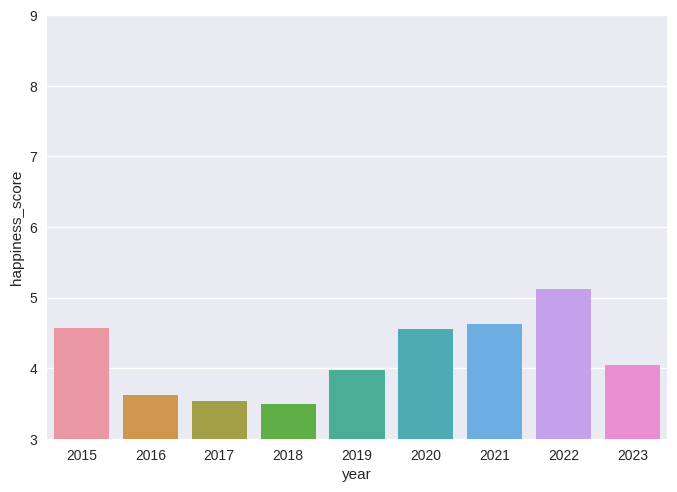

India
     year country         region  happiness_score
116  2015   India  Southern Asia           4.5650
117  2016   India  Southern Asia           4.4040
121  2017   India  Southern Asia           4.3150
132  2018   India  Southern Asia           4.1900
139  2019   India  Southern Asia           4.0150
143  2020   India  Southern Asia           3.5733
138  2021   India  Southern Asia           3.8190
135  2022   India  Southern Asia           3.7770
125  2023   India  Southern Asia           4.0360


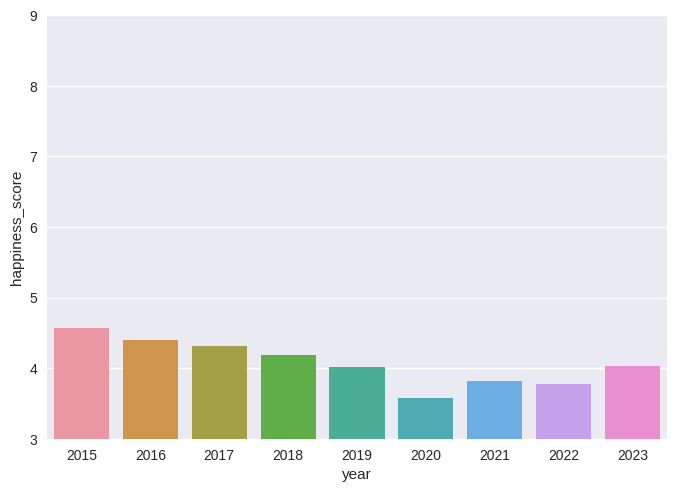

Sudan
     year country              region  happiness_score
117  2015   Sudan  Sub-Saharan Africa            4.550
132  2016   Sudan  Sub-Saharan Africa            4.139
129  2017   Sudan  Sub-Saharan Africa            4.139
136  2018   Sudan  Sub-Saharan Africa            4.139


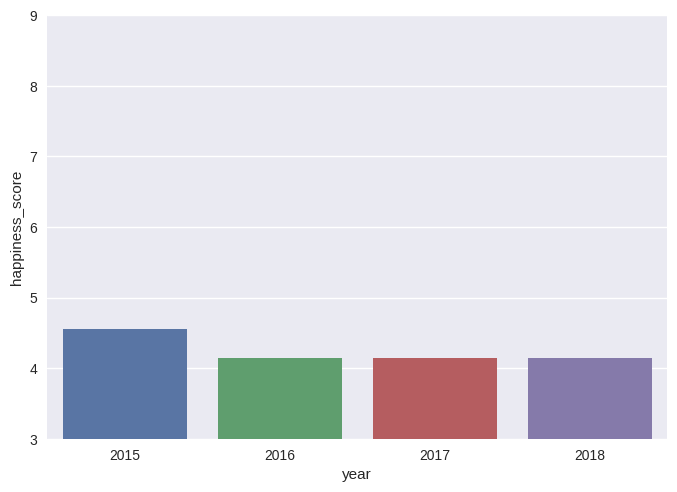

Haiti
     year country                       region  happiness_score
118  2015   Haiti  Latin America and Caribbean           4.5180
135  2016   Haiti  Latin America and Caribbean           4.0280
144  2017   Haiti  Latin America and Caribbean           3.6030
147  2018   Haiti  Latin America and Caribbean           3.5820
146  2019   Haiti  Latin America and Caribbean           3.5970
141  2020   Haiti  Latin America and Caribbean           3.7208
142  2021   Haiti  Latin America and Caribbean           3.6150


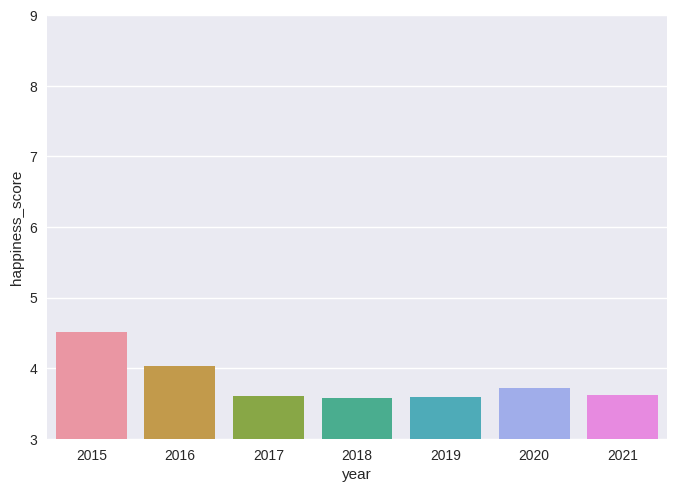

Congo (Kinshasa)
     year           country              region  happiness_score
119  2015  Congo (Kinshasa)  Sub-Saharan Africa            4.517
124  2016  Congo (Kinshasa)  Sub-Saharan Africa            4.272
125  2017  Congo (Kinshasa)  Sub-Saharan Africa            4.280
131  2018  Congo (Kinshasa)  Sub-Saharan Africa            4.245
126  2019  Congo (Kinshasa)  Sub-Saharan Africa            4.418
130  2020  Congo (Kinshasa)  Sub-Saharan Africa            4.311
132  2023  Congo (Kinshasa)  Sub-Saharan Africa            3.207


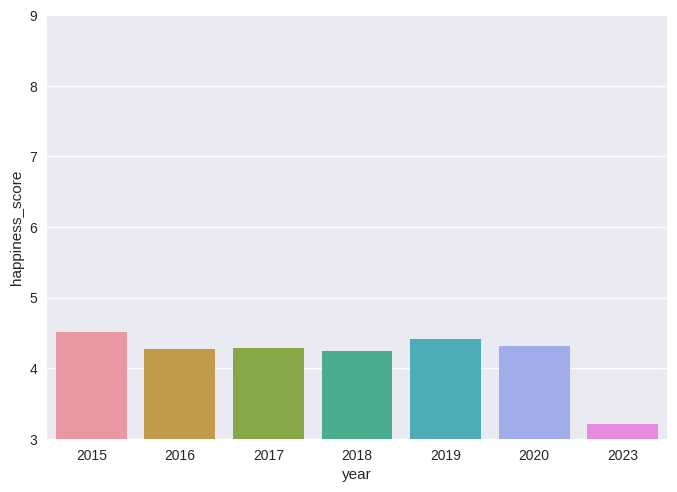

Nepal
     year country         region  happiness_score
120  2015   Nepal  Southern Asia           4.5140
106  2016   Nepal  Southern Asia           4.7930
98   2017   Nepal  Southern Asia           4.9620
100  2018   Nepal  Southern Asia           4.8800
99   2019   Nepal  Southern Asia           4.9130
91   2020   Nepal  Southern Asia           5.1372
86   2021   Nepal  Southern Asia           5.2690
83   2022   Nepal  Southern Asia           5.3770
77   2023   Nepal  Southern Asia           5.3600


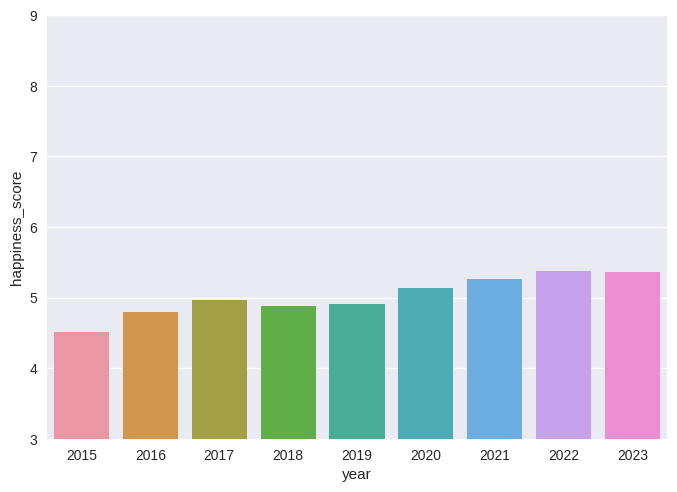

Ethiopia
     year   country              region  happiness_score
121  2015  Ethiopia  Sub-Saharan Africa           4.5120
114  2016  Ethiopia  Sub-Saharan Africa           4.5080
118  2017  Ethiopia  Sub-Saharan Africa           4.4600
126  2018  Ethiopia  Sub-Saharan Africa           4.3500
133  2019  Ethiopia  Sub-Saharan Africa           4.2860
135  2020  Ethiopia  Sub-Saharan Africa           4.1862
132  2021  Ethiopia  Sub-Saharan Africa           4.2750
130  2022  Ethiopia  Sub-Saharan Africa           4.2410
123  2023  Ethiopia  Sub-Saharan Africa           4.0910


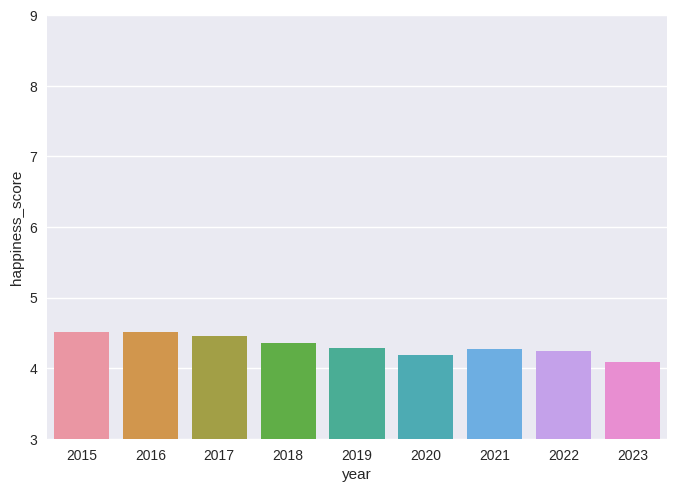

Sierra Leone
     year       country              region  happiness_score
122  2015  Sierra Leone  Sub-Saharan Africa           4.5070
110  2016  Sierra Leone  Sub-Saharan Africa           4.6350
105  2017  Sierra Leone  Sub-Saharan Africa           4.7090
112  2018  Sierra Leone  Sub-Saharan Africa           4.5710
128  2019  Sierra Leone  Sub-Saharan Africa           4.3740
138  2020  Sierra Leone  Sub-Saharan Africa           3.9264
137  2021  Sierra Leone  Sub-Saharan Africa           3.8490
139  2022  Sierra Leone  Sub-Saharan Africa           3.5740
134  2023  Sierra Leone  Sub-Saharan Africa           3.1380


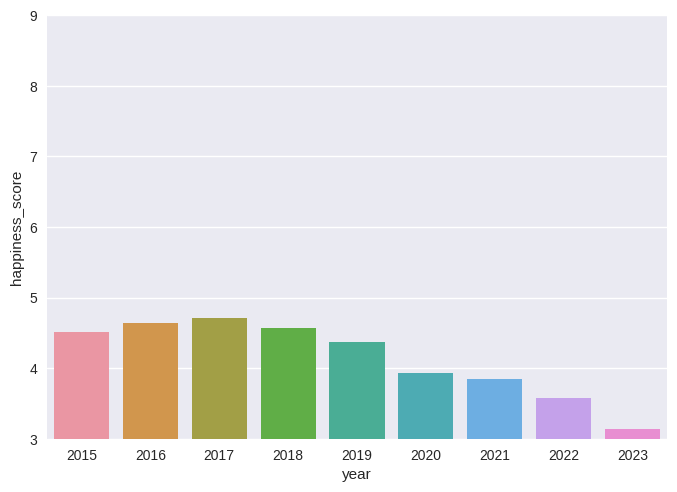

Mauritania
     year     country              region  happiness_score
123  2015  Mauritania  Sub-Saharan Africa           4.4360
129  2016  Mauritania  Sub-Saharan Africa           4.2010
122  2017  Mauritania  Sub-Saharan Africa           4.2920
125  2018  Mauritania  Sub-Saharan Africa           4.3560
121  2019  Mauritania  Sub-Saharan Africa           4.4900
128  2020  Mauritania  Sub-Saharan Africa           4.3746
133  2021  Mauritania  Sub-Saharan Africa           4.2270
132  2022  Mauritania  Sub-Saharan Africa           4.1530
102  2023  Mauritania  Sub-Saharan Africa           4.7240


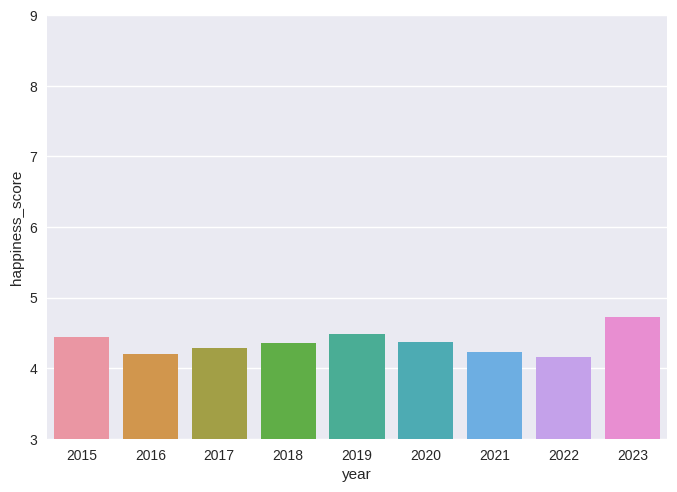

Kenya
     year country              region  happiness_score
124  2015   Kenya  Sub-Saharan Africa            4.419
121  2016   Kenya  Sub-Saharan Africa            4.356
111  2017   Kenya  Sub-Saharan Africa            4.553
123  2018   Kenya  Sub-Saharan Africa            4.410
120  2019   Kenya  Sub-Saharan Africa            4.509
120  2020   Kenya  Sub-Saharan Africa            4.583
120  2021   Kenya  Sub-Saharan Africa            4.607
118  2022   Kenya  Sub-Saharan Africa            4.543
110  2023   Kenya  Sub-Saharan Africa            4.487


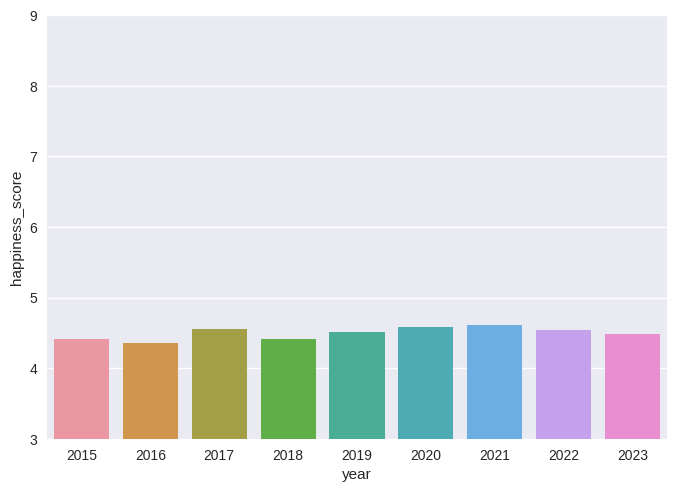

Djibouti
     year   country              region  happiness_score
125  2015  Djibouti  Sub-Saharan Africa            4.369


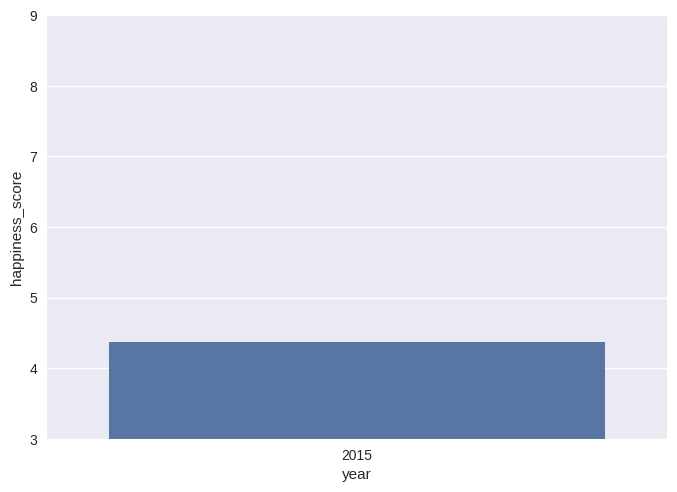

Armenia
     year  country                      region  happiness_score
126  2015  Armenia  Central and Eastern Europe           4.3500
120  2016  Armenia  Central and Eastern Europe           4.3600
120  2017  Armenia  Central and Eastern Europe           4.3760
128  2018  Armenia  Central and Eastern Europe           4.3210
115  2019  Armenia  Central and Eastern Europe           4.5590
115  2020  Armenia  Central and Eastern Europe           4.6768
85   2021  Armenia  Central and Eastern Europe           5.2830
81   2022  Armenia  Central and Eastern Europe           5.3990
78   2023  Armenia  Central and Eastern Europe           5.3420


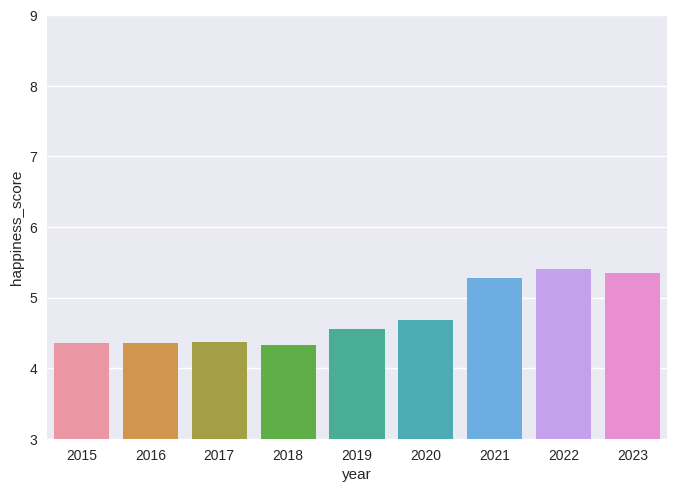

Botswana
     year   country              region  happiness_score
127  2015  Botswana  Sub-Saharan Africa           4.3320
136  2016  Botswana  Sub-Saharan Africa           3.9740
141  2017  Botswana  Sub-Saharan Africa           3.7660
145  2018  Botswana  Sub-Saharan Africa           3.5900
147  2019  Botswana  Sub-Saharan Africa           3.4880
146  2020  Botswana  Sub-Saharan Africa           3.4789
145  2021  Botswana  Sub-Saharan Africa           3.4670
141  2022  Botswana  Sub-Saharan Africa           3.4710
131  2023  Botswana  Sub-Saharan Africa           3.4350


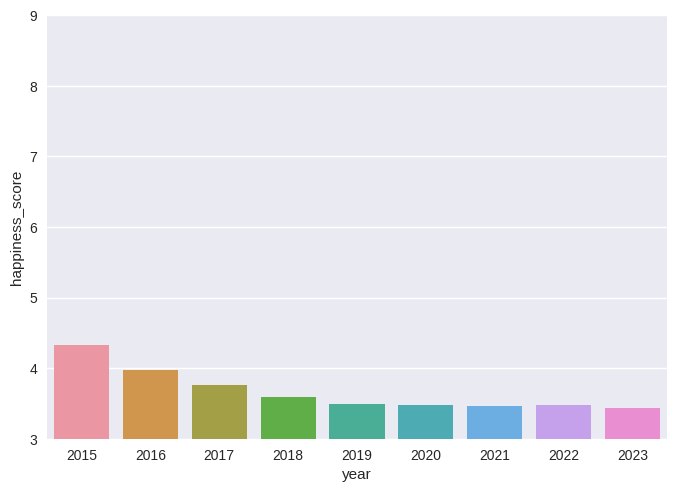

Myanmar
     year  country             region  happiness_score
128  2015  Myanmar  Southeastern Asia            4.307
118  2016  Myanmar  Southeastern Asia            4.395
113  2017  Myanmar  Southeastern Asia            4.545
129  2018  Myanmar  Southeastern Asia            4.308
130  2019  Myanmar  Southeastern Asia            4.360
132  2020  Myanmar  Southeastern Asia            4.308
125  2021  Myanmar  Southeastern Asia            4.426
125  2022  Myanmar  Southeastern Asia            4.394
116  2023  Myanmar  Southeastern Asia            4.372


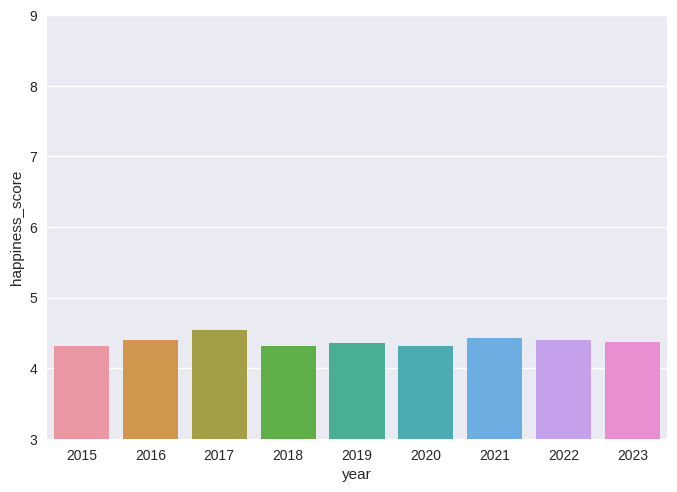

Georgia
     year  country                      region  happiness_score
129  2015  Georgia  Central and Eastern Europe           4.2970
125  2016  Georgia  Central and Eastern Europe           4.2520
124  2017  Georgia  Central and Eastern Europe           4.2860
127  2018  Georgia  Central and Eastern Europe           4.3400
118  2019  Georgia  Central and Eastern Europe           4.5190
116  2020  Georgia  Central and Eastern Europe           4.6726
107  2021  Georgia  Central and Eastern Europe           4.8910
104  2022  Georgia  Central and Eastern Europe           4.9730
89   2023  Georgia  Central and Eastern Europe           5.1090


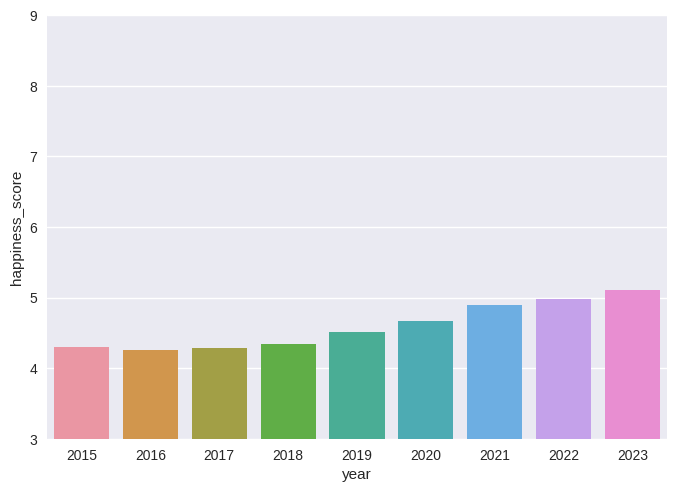

Malawi
     year country              region  happiness_score
130  2015  Malawi  Sub-Saharan Africa            4.292
131  2016  Malawi  Sub-Saharan Africa            4.156
135  2017  Malawi  Sub-Saharan Africa            3.970
146  2018  Malawi  Sub-Saharan Africa            3.587
149  2019  Malawi  Sub-Saharan Africa            3.410
144  2020  Malawi  Sub-Saharan Africa            3.538
143  2021  Malawi  Sub-Saharan Africa            3.600
137  2022  Malawi  Sub-Saharan Africa            3.750
130  2023  Malawi  Sub-Saharan Africa            3.495


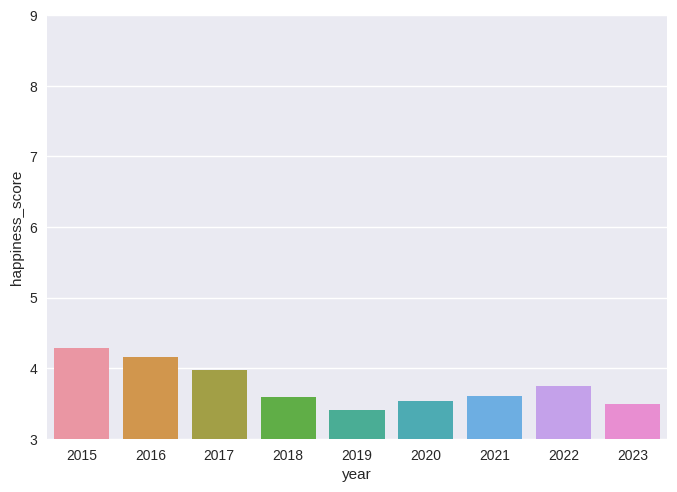

Sri Lanka
     year    country         region  happiness_score
131  2015  Sri Lanka  Southern Asia            4.271
116  2016  Sri Lanka  Southern Asia            4.415
119  2017  Sri Lanka  Southern Asia            4.440
115  2018  Sri Lanka  Southern Asia            4.471
129  2019  Sri Lanka  Southern Asia            4.366
129  2020  Sri Lanka  Southern Asia            4.327
128  2021  Sri Lanka  Southern Asia            4.325
126  2022  Sri Lanka  Southern Asia            4.362
111  2023  Sri Lanka  Southern Asia            4.442


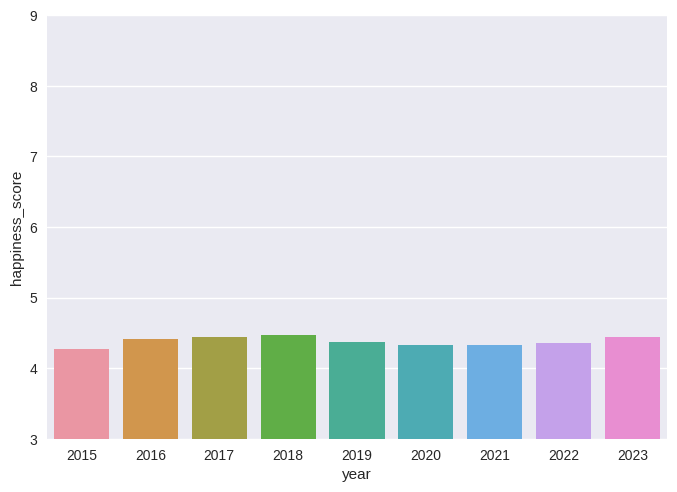

Cameroon
     year   country              region  happiness_score
132  2015  Cameroon  Sub-Saharan Africa           4.2520
113  2016  Cameroon  Sub-Saharan Africa           4.5130
106  2017  Cameroon  Sub-Saharan Africa           4.6950
98   2018  Cameroon  Sub-Saharan Africa           4.9750
95   2019  Cameroon  Sub-Saharan Africa           5.0440
97   2020  Cameroon  Sub-Saharan Africa           5.0849
90   2021  Cameroon  Sub-Saharan Africa           5.1420
101  2022  Cameroon  Sub-Saharan Africa           5.0480
95   2023  Cameroon  Sub-Saharan Africa           4.9730


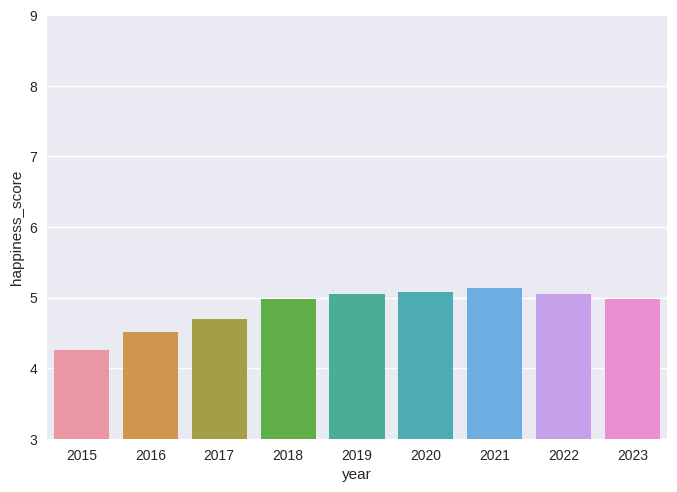

Bulgaria
     year   country                      region  happiness_score
133  2015  Bulgaria  Central and Eastern Europe           4.2180
128  2016  Bulgaria  Central and Eastern Europe           4.2170
104  2017  Bulgaria  Central and Eastern Europe           4.7140
99   2018  Bulgaria  Central and Eastern Europe           4.9330
96   2019  Bulgaria  Central and Eastern Europe           5.0110
95   2020  Bulgaria  Central and Eastern Europe           5.1015
87   2021  Bulgaria  Central and Eastern Europe           5.2660
84   2022  Bulgaria  Central and Eastern Europe           5.3710
76   2023  Bulgaria  Central and Eastern Europe           5.4660


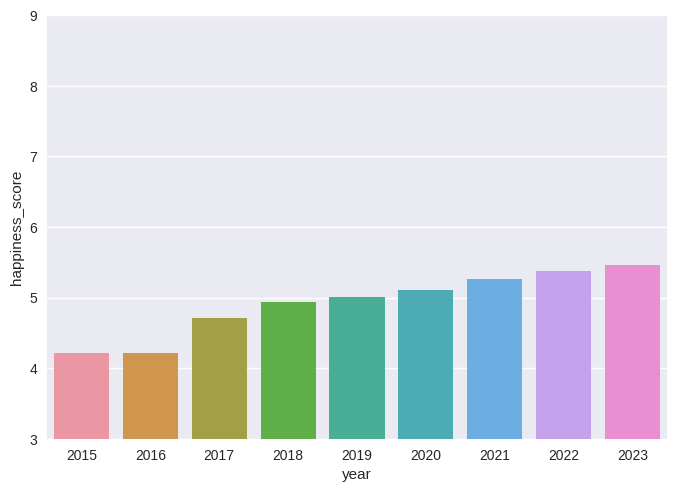

Egypt
     year country                           region  happiness_score
134  2015   Egypt  Middle East and Northern Africa           4.1940
119  2016   Egypt  Middle East and Northern Africa           4.3620
103  2017   Egypt  Middle East and Northern Africa           4.7350
121  2018   Egypt  Middle East and Northern Africa           4.4190
136  2019   Egypt  Middle East and Northern Africa           4.1660
137  2020   Egypt  Middle East and Northern Africa           4.1514
131  2021   Egypt  Middle East and Northern Africa           4.2830
128  2022   Egypt  Middle East and Northern Africa           4.2880
120  2023   Egypt  Middle East and Northern Africa           4.1700


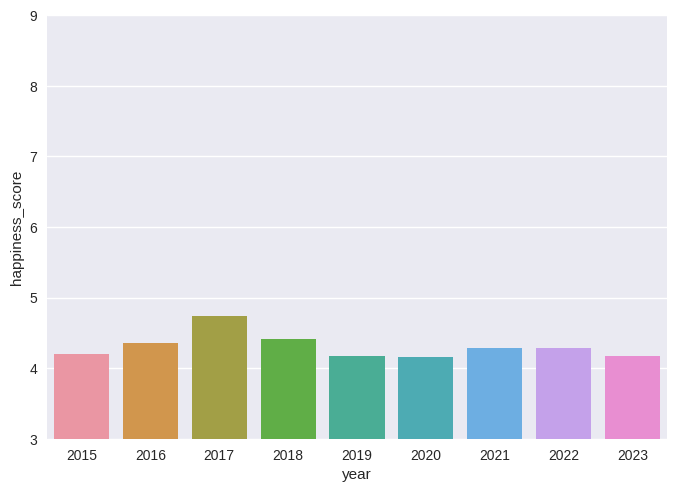

Yemen
     year country                           region  happiness_score
135  2015   Yemen  Middle East and Northern Africa           4.0770
146  2016   Yemen  Middle East and Northern Africa           3.7240
145  2017   Yemen  Middle East and Northern Africa           3.5930
151  2018   Yemen  Middle East and Northern Africa           3.3550
150  2019   Yemen  Middle East and Northern Africa           3.3800
145  2020   Yemen  Middle East and Northern Africa           3.5274
140  2021   Yemen  Middle East and Northern Africa           3.6580
131  2022   Yemen  Middle East and Northern Africa           4.1970


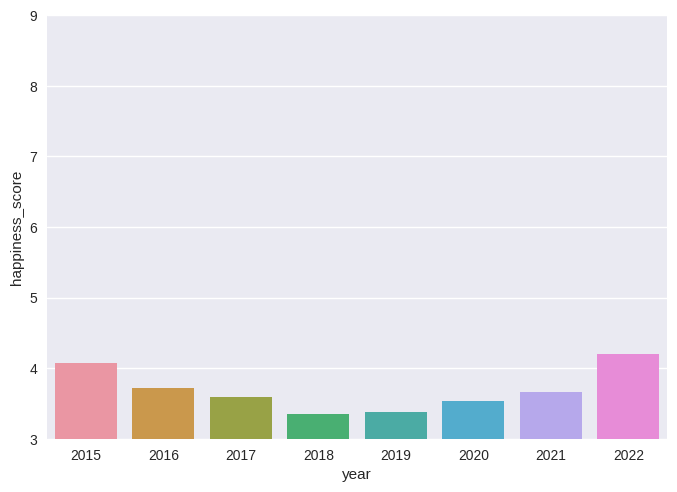

Angola
     year country              region  happiness_score
136  2015  Angola  Sub-Saharan Africa            4.033
140  2016  Angola  Sub-Saharan Africa            3.866
139  2017  Angola  Sub-Saharan Africa            3.795
141  2018  Angola  Sub-Saharan Africa            3.795


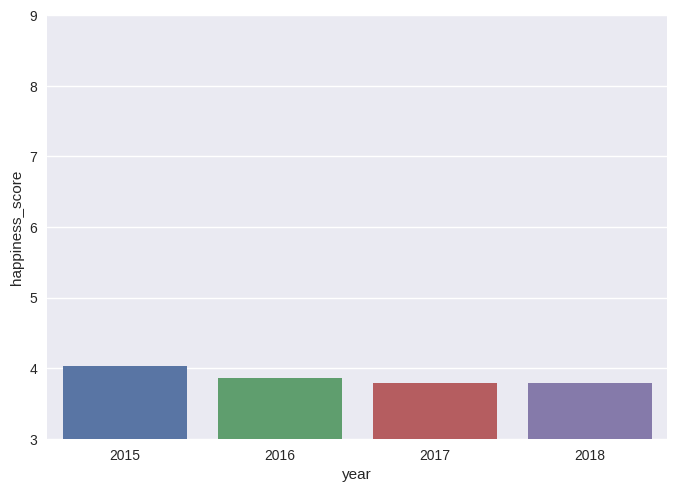

Mali
     year country              region  happiness_score
137  2015    Mali  Sub-Saharan Africa           3.9950
134  2016    Mali  Sub-Saharan Africa           4.0730
126  2017    Mali  Sub-Saharan Africa           4.1900
117  2018    Mali  Sub-Saharan Africa           4.4470
127  2019    Mali  Sub-Saharan Africa           4.3900
113  2020    Mali  Sub-Saharan Africa           4.7293
116  2021    Mali  Sub-Saharan Africa           4.7230
122  2022    Mali  Sub-Saharan Africa           4.4790
119  2023    Mali  Sub-Saharan Africa           4.1980


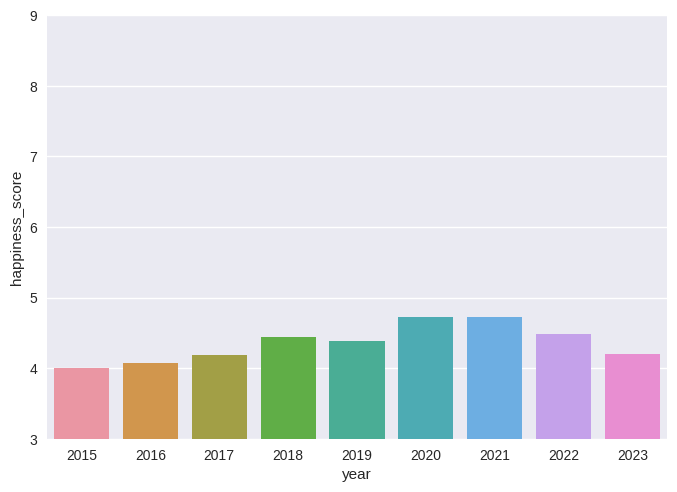

Congo (Brazzaville)
     year              country              region  happiness_score
138  2015  Congo (Brazzaville)  Sub-Saharan Africa           3.9890
126  2016  Congo (Brazzaville)  Sub-Saharan Africa           4.2360
123  2017  Congo (Brazzaville)  Sub-Saharan Africa           4.2910
113  2018  Congo (Brazzaville)  Sub-Saharan Africa           4.5590
102  2019  Congo (Brazzaville)  Sub-Saharan Africa           4.8120
87   2020  Congo (Brazzaville)  Sub-Saharan Africa           5.1944
82   2021  Congo (Brazzaville)  Sub-Saharan Africa           5.3420
85   2023  Congo (Brazzaville)  Sub-Saharan Africa           5.2670


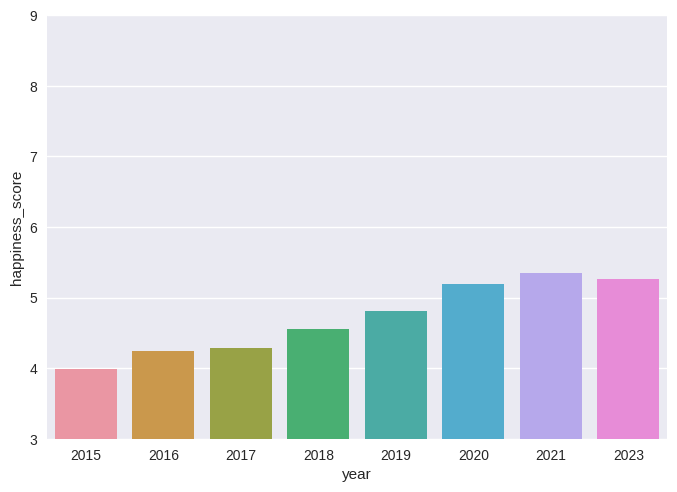

Comoros
     year  country              region  happiness_score
139  2015  Comoros  Sub-Saharan Africa           3.9560
137  2016  Comoros  Sub-Saharan Africa           3.9560
141  2019  Comoros  Sub-Saharan Africa           3.9730
133  2020  Comoros  Sub-Saharan Africa           4.2886
130  2021  Comoros  Sub-Saharan Africa           4.2890
115  2022  Comoros  Sub-Saharan Africa           4.6090
129  2023  Comoros  Sub-Saharan Africa           3.5450


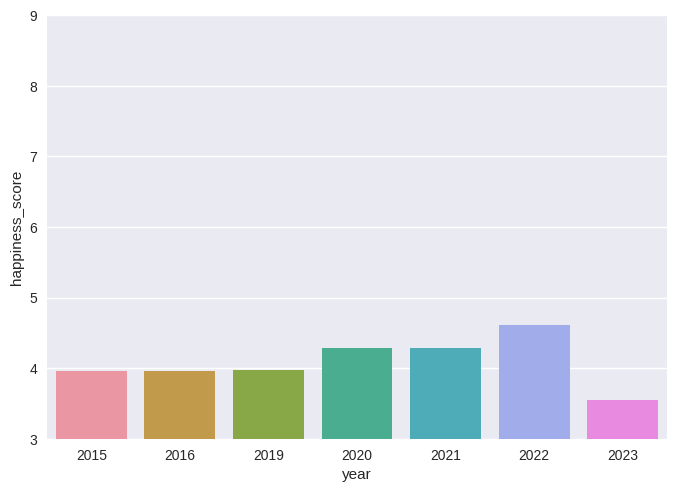

Uganda
     year country              region  happiness_score
140  2015  Uganda  Sub-Saharan Africa            3.931
145  2016  Uganda  Sub-Saharan Africa            3.739
132  2017  Uganda  Sub-Saharan Africa            4.081
134  2018  Uganda  Sub-Saharan Africa            4.161
135  2019  Uganda  Sub-Saharan Africa            4.189
125  2020  Uganda  Sub-Saharan Africa            4.432
118  2021  Uganda  Sub-Saharan Africa            4.636
116  2022  Uganda  Sub-Saharan Africa            4.603
112  2023  Uganda  Sub-Saharan Africa            4.432


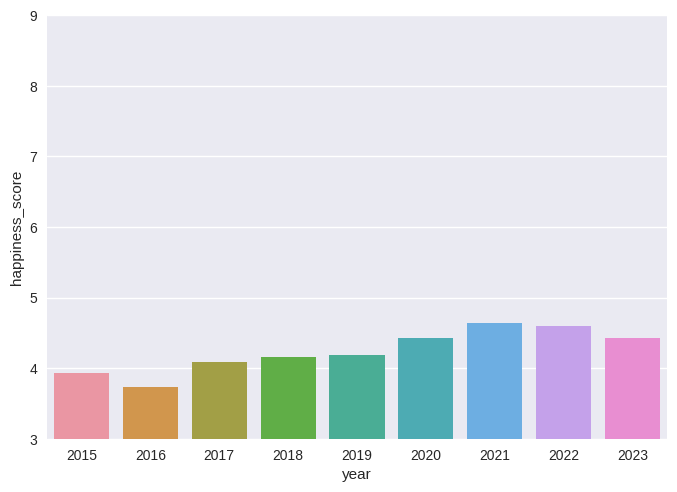

Senegal
     year  country              region  happiness_score
141  2015  Senegal  Sub-Saharan Africa           3.9040
127  2016  Senegal  Sub-Saharan Africa           4.2190
114  2017  Senegal  Sub-Saharan Africa           4.5350
108  2018  Senegal  Sub-Saharan Africa           4.6310
110  2019  Senegal  Sub-Saharan Africa           4.6810
100  2020  Senegal  Sub-Saharan Africa           4.9808
91   2021  Senegal  Sub-Saharan Africa           5.1320
102  2022  Senegal  Sub-Saharan Africa           5.0460
101  2023  Senegal  Sub-Saharan Africa           4.8550


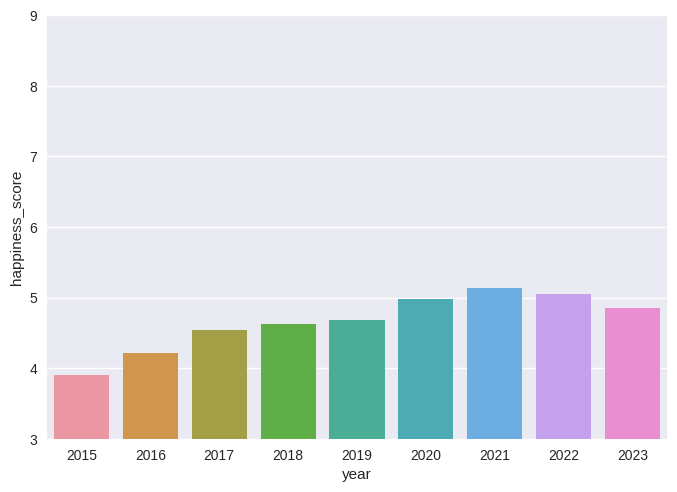

Gabon
     year country              region  happiness_score
142  2015   Gabon  Sub-Saharan Africa           3.8960
133  2016   Gabon  Sub-Saharan Africa           4.1210
117  2017   Gabon  Sub-Saharan Africa           4.4650
102  2018   Gabon  Sub-Saharan Africa           4.7580
103  2019   Gabon  Sub-Saharan Africa           4.7990
107  2020   Gabon  Sub-Saharan Africa           4.8293
111  2021   Gabon  Sub-Saharan Africa           4.8520
105  2022   Gabon  Sub-Saharan Africa           4.9580
93   2023   Gabon  Sub-Saharan Africa           5.0350


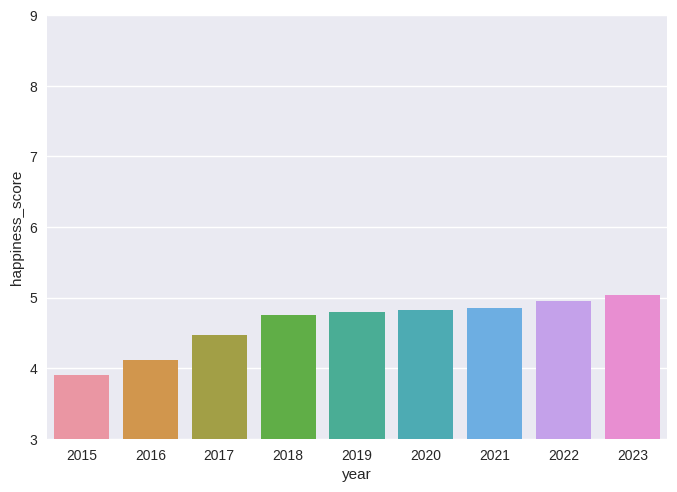

Niger
     year country              region  happiness_score
143  2015   Niger  Sub-Saharan Africa           3.8450
141  2016   Niger  Sub-Saharan Africa           3.8560
134  2017   Niger  Sub-Saharan Africa           4.0280
133  2018   Niger  Sub-Saharan Africa           4.1660
113  2019   Niger  Sub-Saharan Africa           4.6280
102  2020   Niger  Sub-Saharan Africa           4.9096
95   2021   Niger  Sub-Saharan Africa           5.0740
103  2022   Niger  Sub-Saharan Africa           5.0030
108  2023   Niger  Sub-Saharan Africa           4.5010


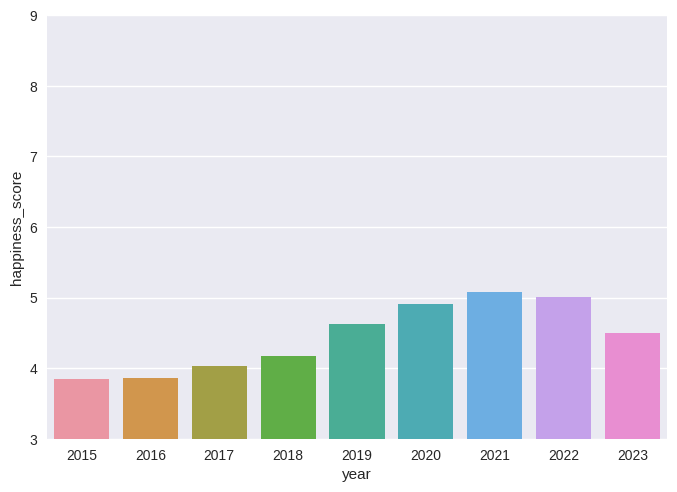

Cambodia
     year   country             region  happiness_score
144  2015  Cambodia  Southeastern Asia           3.8190
139  2016  Cambodia  Southeastern Asia           3.9070
128  2017  Cambodia  Southeastern Asia           4.1680
119  2018  Cambodia  Southeastern Asia           4.4330
108  2019  Cambodia  Southeastern Asia           4.7000
105  2020  Cambodia  Southeastern Asia           4.8484
113  2021  Cambodia  Southeastern Asia           4.8300
113  2022  Cambodia  Southeastern Asia           4.6400
114  2023  Cambodia  Southeastern Asia           4.3930


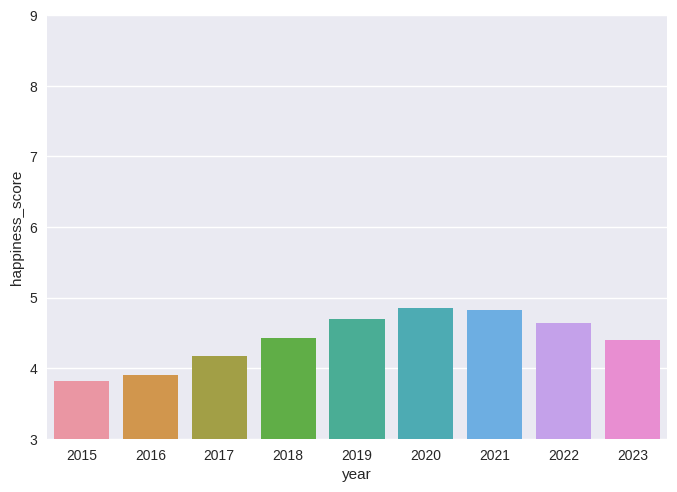

Tanzania
     year   country              region  happiness_score
145  2015  Tanzania  Sub-Saharan Africa           3.7810
148  2016  Tanzania  Sub-Saharan Africa           3.6660
152  2017  Tanzania  Sub-Saharan Africa           3.3490
152  2018  Tanzania  Sub-Saharan Africa           3.3030
152  2019  Tanzania  Sub-Saharan Africa           3.2310
147  2020  Tanzania  Sub-Saharan Africa           3.4762
141  2021  Tanzania  Sub-Saharan Africa           3.6230
138  2022  Tanzania  Sub-Saharan Africa           3.7020
128  2023  Tanzania  Sub-Saharan Africa           3.6940


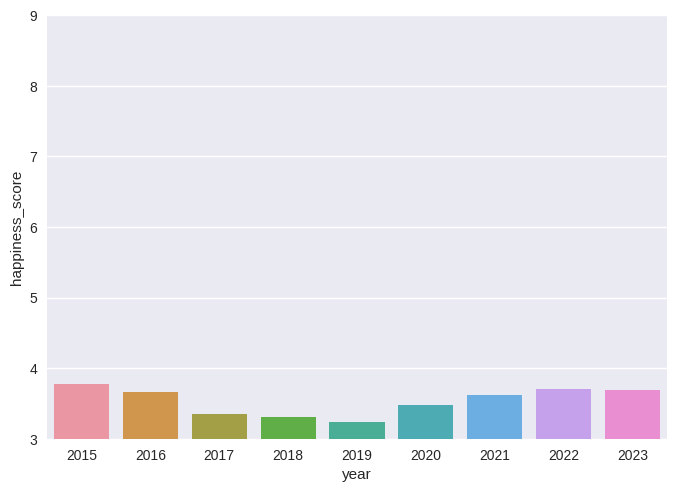

Madagascar
     year     country              region  happiness_score
146  2015  Madagascar  Sub-Saharan Africa           3.6810
147  2016  Madagascar  Sub-Saharan Africa           3.6950
143  2017  Madagascar  Sub-Saharan Africa           3.6440
142  2018  Madagascar  Sub-Saharan Africa           3.7740
142  2019  Madagascar  Sub-Saharan Africa           3.9330
136  2020  Madagascar  Sub-Saharan Africa           4.1656
134  2021  Madagascar  Sub-Saharan Africa           4.2080
127  2022  Madagascar  Sub-Saharan Africa           4.3390
126  2023  Madagascar  Sub-Saharan Africa           4.0190


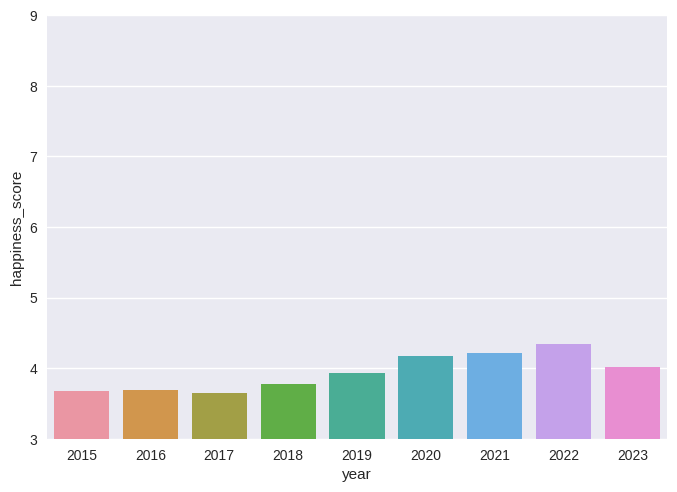

Central African Republic
     year                   country              region  happiness_score
147  2015  Central African Republic  Sub-Saharan Africa           3.6780
154  2017  Central African Republic  Sub-Saharan Africa           2.6930
154  2018  Central African Republic  Sub-Saharan Africa           3.0830
154  2019  Central African Republic  Sub-Saharan Africa           3.0830
148  2020  Central African Republic  Sub-Saharan Africa           3.4759


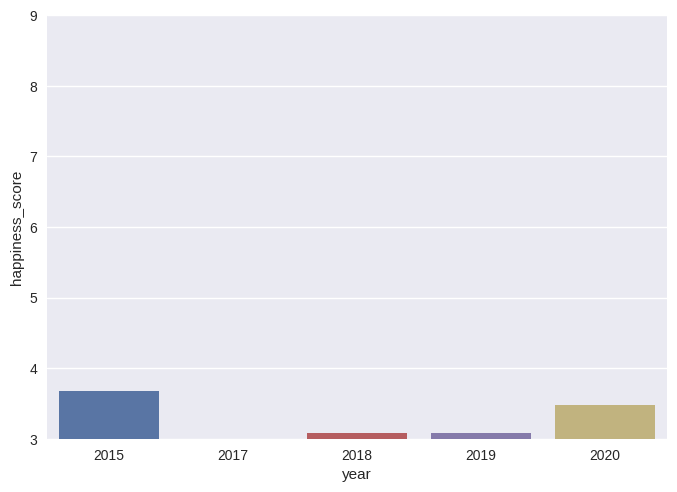

Chad
     year country              region  happiness_score
148  2015    Chad  Sub-Saharan Africa           3.6670
143  2016    Chad  Sub-Saharan Africa           3.7630
136  2017    Chad  Sub-Saharan Africa           3.9360
130  2018    Chad  Sub-Saharan Africa           4.3010
131  2019    Chad  Sub-Saharan Africa           4.3500
126  2020    Chad  Sub-Saharan Africa           4.4227
127  2021    Chad  Sub-Saharan Africa           4.3550
129  2022    Chad  Sub-Saharan Africa           4.2510
113  2023    Chad  Sub-Saharan Africa           4.3970


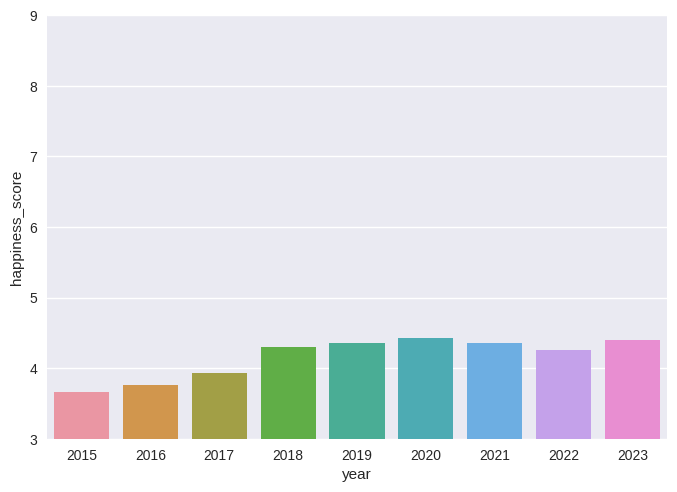

Guinea
     year country              region  happiness_score
149  2015  Guinea  Sub-Saharan Africa           3.6560
150  2016  Guinea  Sub-Saharan Africa           3.6070
148  2017  Guinea  Sub-Saharan Africa           3.5070
139  2018  Guinea  Sub-Saharan Africa           3.9640
117  2019  Guinea  Sub-Saharan Africa           4.5340
101  2020  Guinea  Sub-Saharan Africa           4.9493
101  2021  Guinea  Sub-Saharan Africa           4.9840
108  2022  Guinea  Sub-Saharan Africa           4.8910
90   2023  Guinea  Sub-Saharan Africa           5.0720


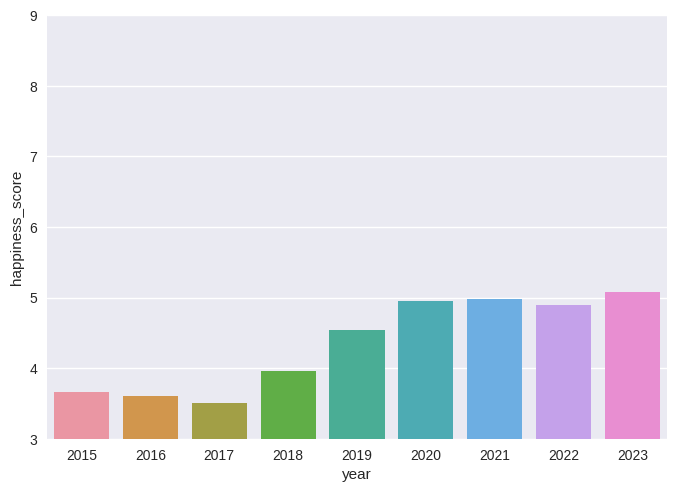

Ivory Coast
     year      country              region  happiness_score
150  2015  Ivory Coast  Sub-Saharan Africa           3.6550
138  2016  Ivory Coast  Sub-Saharan Africa           3.9160
127  2017  Ivory Coast  Sub-Saharan Africa           4.1800
106  2018  Ivory Coast  Sub-Saharan Africa           4.6710
98   2019  Ivory Coast  Sub-Saharan Africa           4.9440
84   2020  Ivory Coast  Sub-Saharan Africa           5.2333
84   2021  Ivory Coast  Sub-Saharan Africa           5.3060
87   2022  Ivory Coast  Sub-Saharan Africa           5.2350
92   2023  Ivory Coast  Sub-Saharan Africa           5.0530


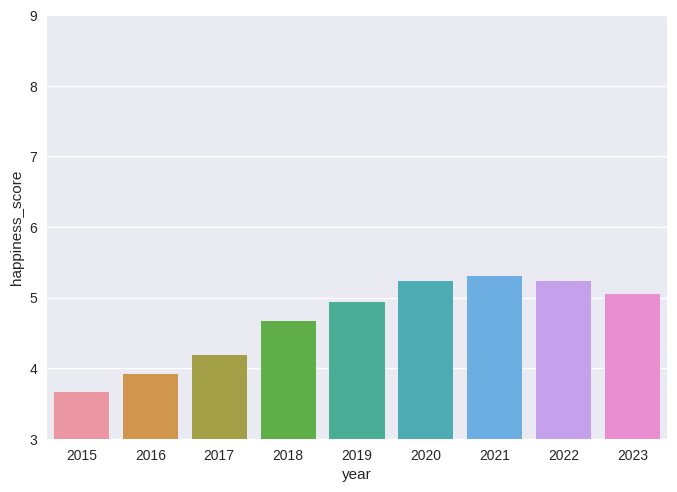

Burkina Faso
     year       country              region  happiness_score
151  2015  Burkina Faso  Sub-Saharan Africa           3.5870
144  2016  Burkina Faso  Sub-Saharan Africa           3.7390
133  2017  Burkina Faso  Sub-Saharan Africa           4.0320
120  2018  Burkina Faso  Sub-Saharan Africa           4.4240
114  2019  Burkina Faso  Sub-Saharan Africa           4.5870
111  2020  Burkina Faso  Sub-Saharan Africa           4.7687
112  2021  Burkina Faso  Sub-Saharan Africa           4.8340
112  2022  Burkina Faso  Sub-Saharan Africa           4.6700
103  2023  Burkina Faso  Sub-Saharan Africa           4.6380


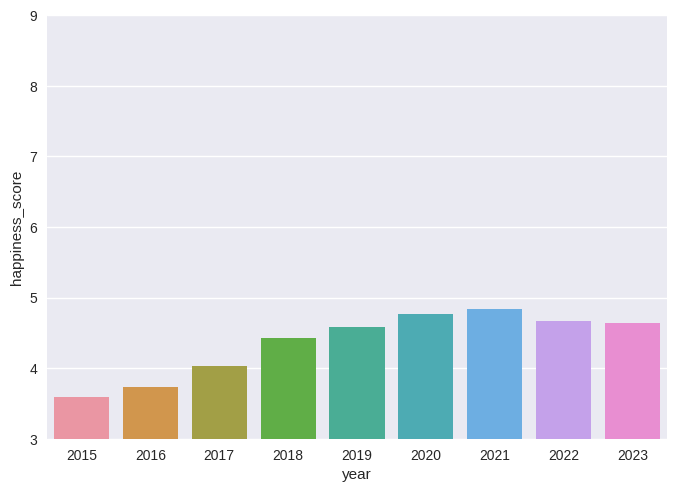

Afghanistan
     year      country         region  happiness_score
152  2015  Afghanistan  Southern Asia           3.5750
153  2016  Afghanistan  Southern Asia           3.3600
140  2017  Afghanistan  Southern Asia           3.7940
144  2018  Afghanistan  Southern Asia           3.6320
153  2019  Afghanistan  Southern Asia           3.2030
152  2020  Afghanistan  Southern Asia           2.5669
148  2021  Afghanistan  Southern Asia           2.5230
145  2022  Afghanistan  Southern Asia           2.4040
136  2023  Afghanistan  Southern Asia           1.8590


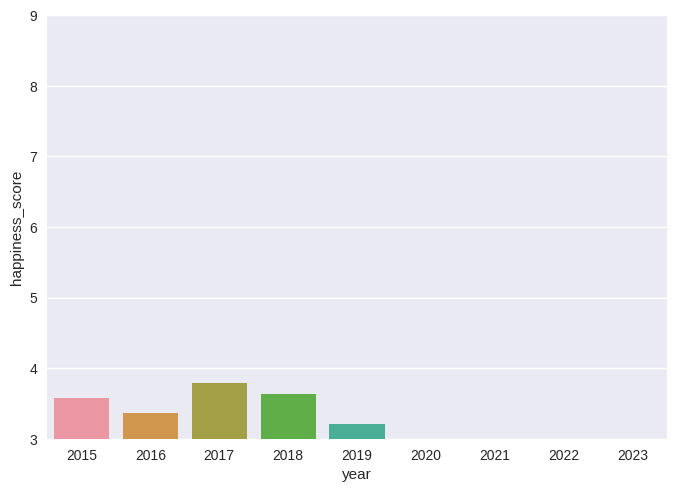

Rwanda
     year country              region  happiness_score
153  2015  Rwanda  Sub-Saharan Africa           3.4650
151  2016  Rwanda  Sub-Saharan Africa           3.5150
150  2017  Rwanda  Sub-Saharan Africa           3.4710
150  2018  Rwanda  Sub-Saharan Africa           3.4080
151  2019  Rwanda  Sub-Saharan Africa           3.3340
149  2020  Rwanda  Sub-Saharan Africa           3.3123
146  2021  Rwanda  Sub-Saharan Africa           3.4150
142  2022  Rwanda  Sub-Saharan Africa           3.2680


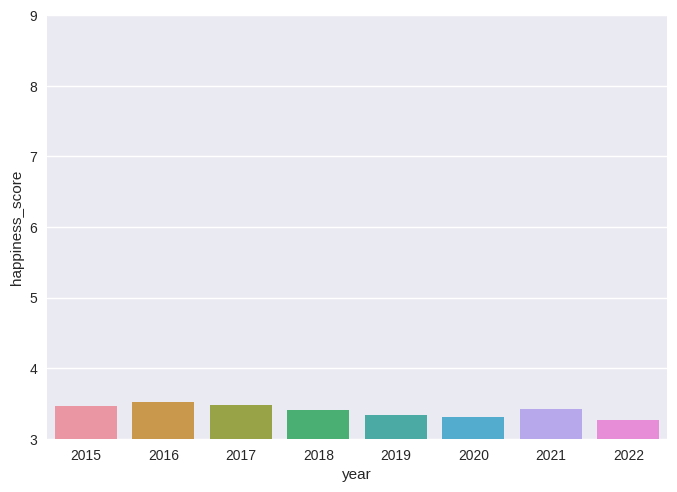

Benin
     year country              region  happiness_score
154  2015   Benin  Sub-Saharan Africa            3.340
152  2016   Benin  Sub-Saharan Africa            3.484
142  2017   Benin  Sub-Saharan Africa            3.657
135  2018   Benin  Sub-Saharan Africa            4.141
101  2019   Benin  Sub-Saharan Africa            4.883
85   2020   Benin  Sub-Saharan Africa            5.216
98   2021   Benin  Sub-Saharan Africa            5.045
114  2022   Benin  Sub-Saharan Africa            4.623
115  2023   Benin  Sub-Saharan Africa            4.374


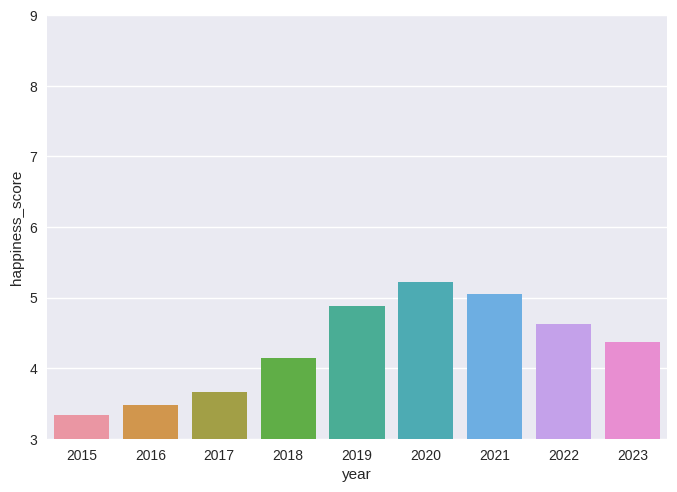

Syria
     year country                           region  happiness_score
155  2015   Syria  Middle East and Northern Africa            3.006
155  2016   Syria  Middle East and Northern Africa            3.069
151  2017   Syria  Middle East and Northern Africa            3.462
149  2018   Syria  Middle East and Northern Africa            3.462
148  2019   Syria  Middle East and Northern Africa            3.462


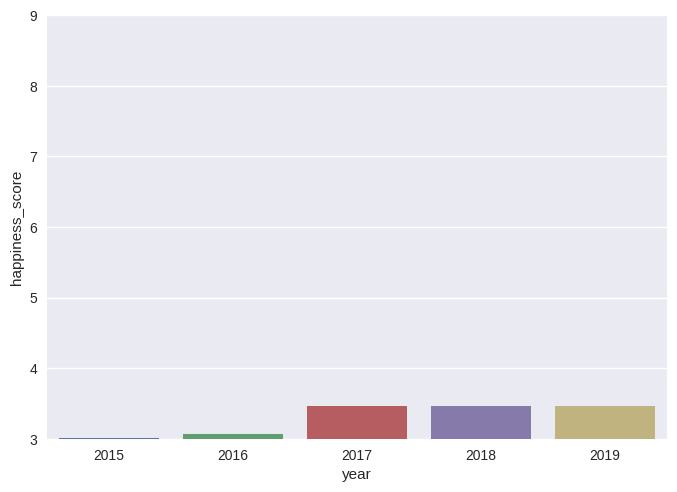

Burundi
     year  country              region  happiness_score
156  2015  Burundi  Sub-Saharan Africa           2.9050
156  2016  Burundi  Sub-Saharan Africa           2.9050
153  2017  Burundi  Sub-Saharan Africa           2.9050
155  2018  Burundi  Sub-Saharan Africa           2.9050
144  2019  Burundi  Sub-Saharan Africa           3.7750
139  2020  Burundi  Sub-Saharan Africa           3.7753
139  2021  Burundi  Sub-Saharan Africa           3.7750


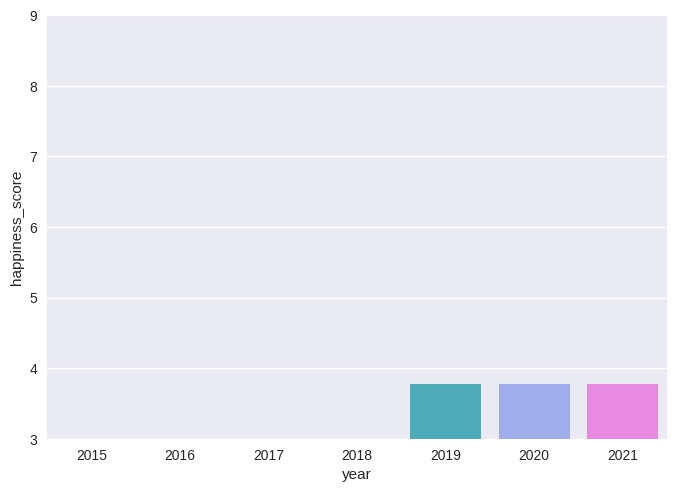

Togo
     year country              region  happiness_score
157  2015    Togo  Sub-Saharan Africa           2.8390
154  2016    Togo  Sub-Saharan Africa           3.3030
149  2017    Togo  Sub-Saharan Africa           3.4950
138  2018    Togo  Sub-Saharan Africa           3.9990
138  2019    Togo  Sub-Saharan Africa           4.0850
134  2020    Togo  Sub-Saharan Africa           4.1872
135  2021    Togo  Sub-Saharan Africa           4.1070
134  2022    Togo  Sub-Saharan Africa           4.1120
121  2023    Togo  Sub-Saharan Africa           4.1370


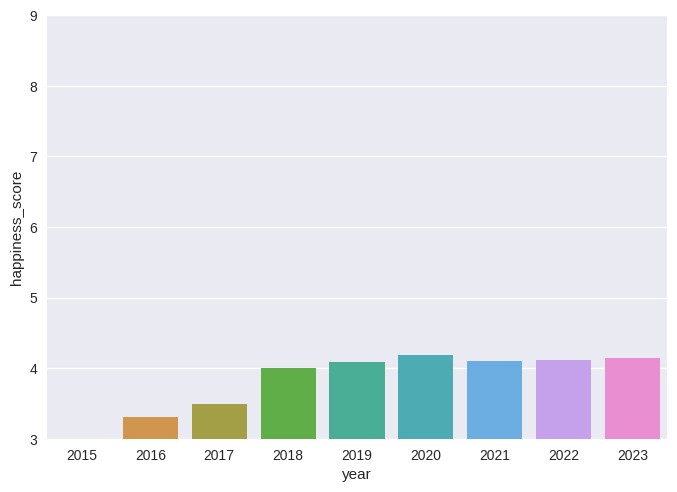

Puerto Rico
    year      country                       region  happiness_score
14  2016  Puerto Rico  Latin America and Caribbean            7.039


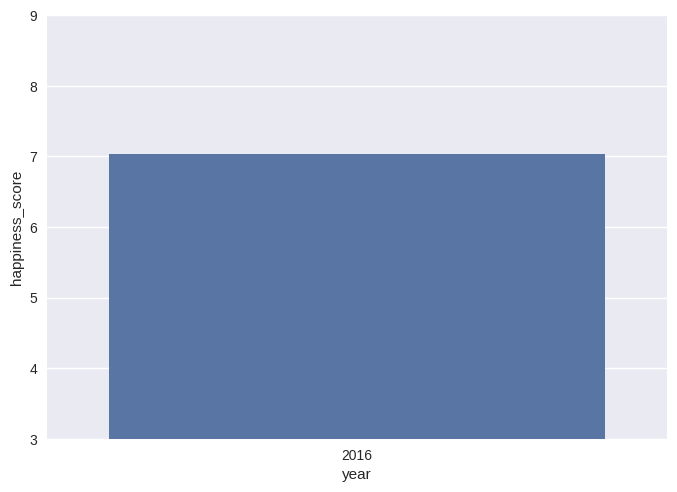

Belize
    year country                       region  happiness_score
51  2016  Belize  Latin America and Caribbean            5.956
49  2017  Belize  Latin America and Caribbean            5.956
48  2018  Belize  Latin America and Caribbean            5.956


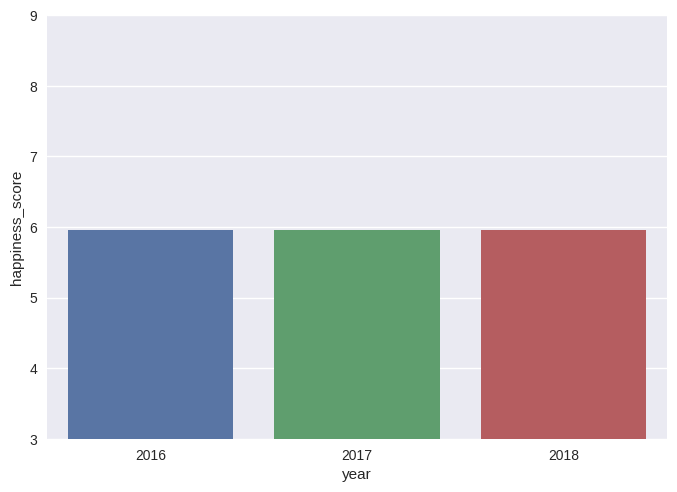

Somalia
     year  country              region  happiness_score
75   2016  Somalia  Sub-Saharan Africa            5.440
92   2017  Somalia  Sub-Saharan Africa            5.151
97   2018  Somalia  Sub-Saharan Africa            4.982
111  2019  Somalia  Sub-Saharan Africa            4.668


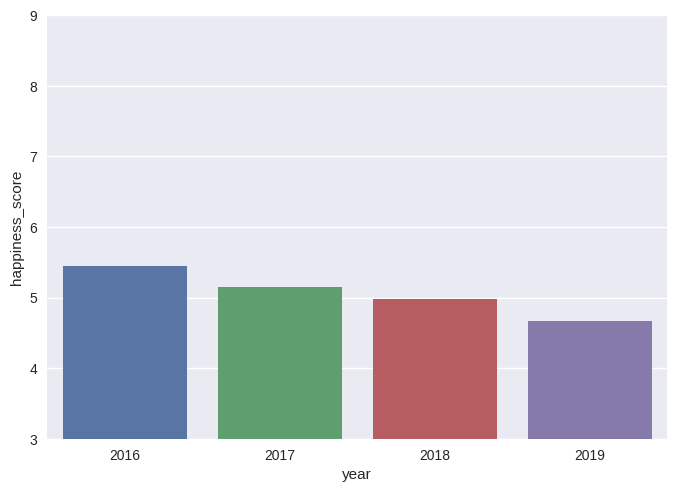

Somaliland Region
    year            country              region  happiness_score
96  2016  Somaliland Region  Sub-Saharan Africa            5.057


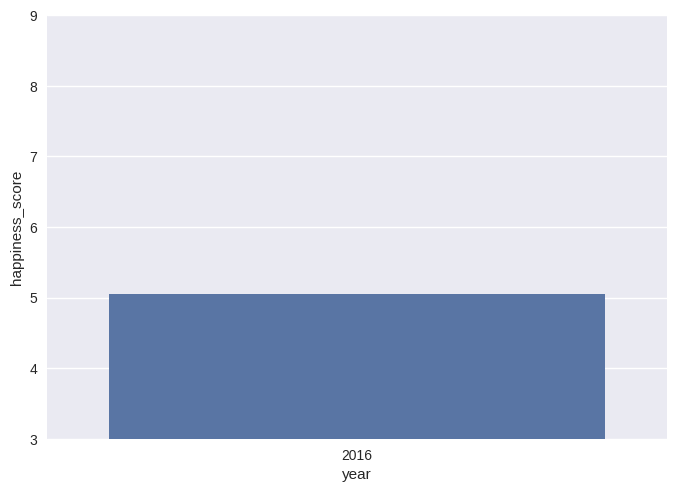

Namibia
     year  country              region  happiness_score
112  2016  Namibia  Sub-Saharan Africa           4.5740
110  2017  Namibia  Sub-Saharan Africa           4.5740
118  2018  Namibia  Sub-Saharan Africa           4.4410
112  2019  Namibia  Sub-Saharan Africa           4.6390
121  2020  Namibia  Sub-Saharan Africa           4.5711
123  2021  Namibia  Sub-Saharan Africa           4.5740
123  2022  Namibia  Sub-Saharan Africa           4.4590
104  2023  Namibia  Sub-Saharan Africa           4.6310


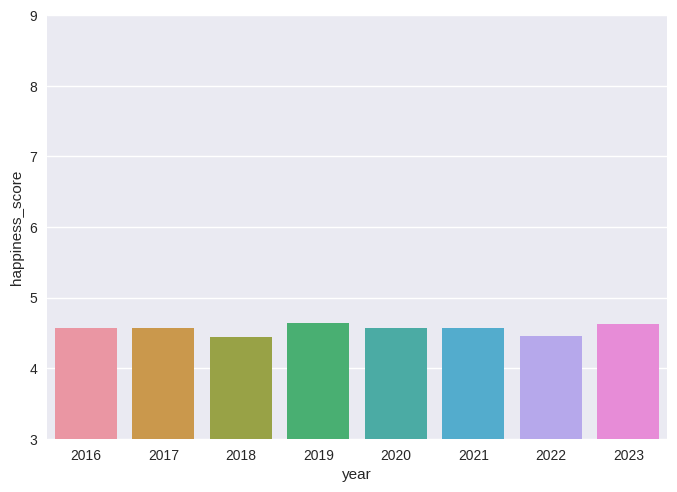

South Sudan
     year      country              region  happiness_score
142  2016  South Sudan  Sub-Saharan Africa           3.8320
146  2017  South Sudan  Sub-Saharan Africa           3.5910
153  2018  South Sudan  Sub-Saharan Africa           3.2540
155  2019  South Sudan  Sub-Saharan Africa           2.8530
151  2020  South Sudan  Sub-Saharan Africa           2.8166


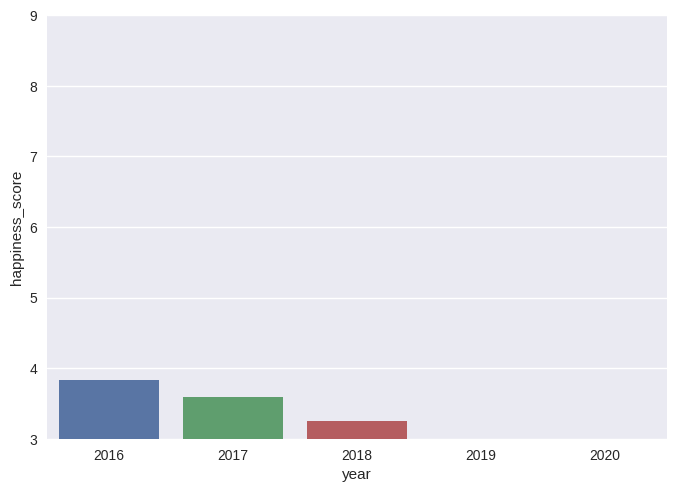

Trinidad & Tobago
    year            country             region  happiness_score
37  2018  Trinidad & Tobago  Trinidad & Tobago            6.192
38  2019  Trinidad & Tobago  Trinidad & Tobago            6.192


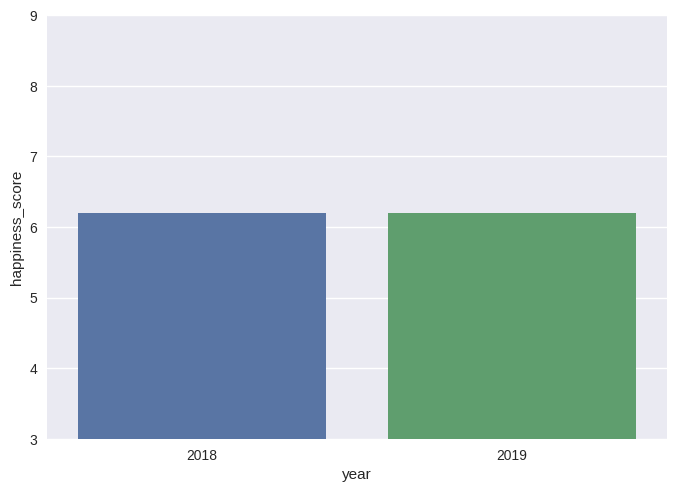

Northern Cyprus
    year          country           region  happiness_score
57  2018  Northern Cyprus  Northern Cyprus            5.835
63  2019  Northern Cyprus  Northern Cyprus            5.718


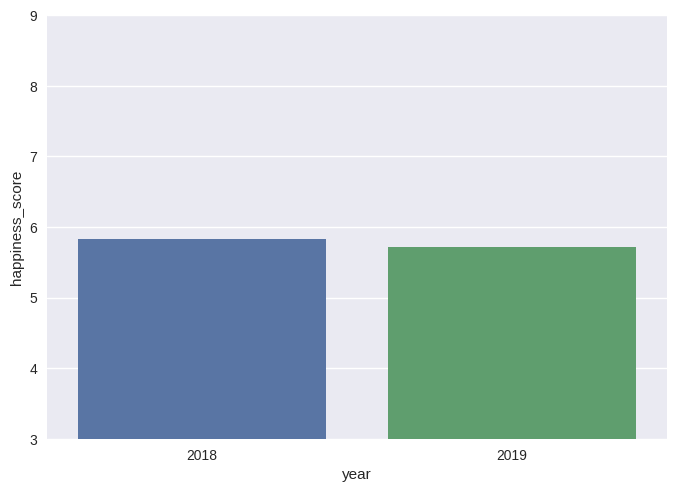

Gambia
     year country  region  happiness_score
119  2019  Gambia  Gambia           4.5160
112  2020  Gambia  Gambia           4.7506
97   2021  Gambia  Gambia           5.0510
92   2022  Gambia  Gambia           5.1640
118  2023  Gambia  Gambia           4.2790


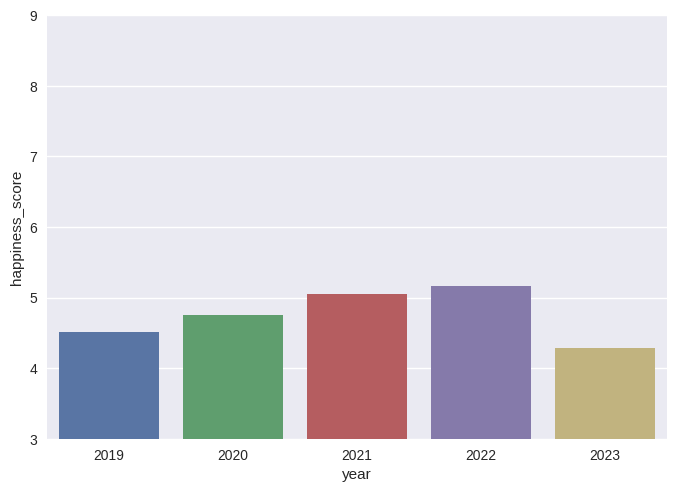

Maldives
    year   country    region  happiness_score
86  2020  Maldives  Maldives           5.1976
88  2021  Maldives  Maldives           5.1980


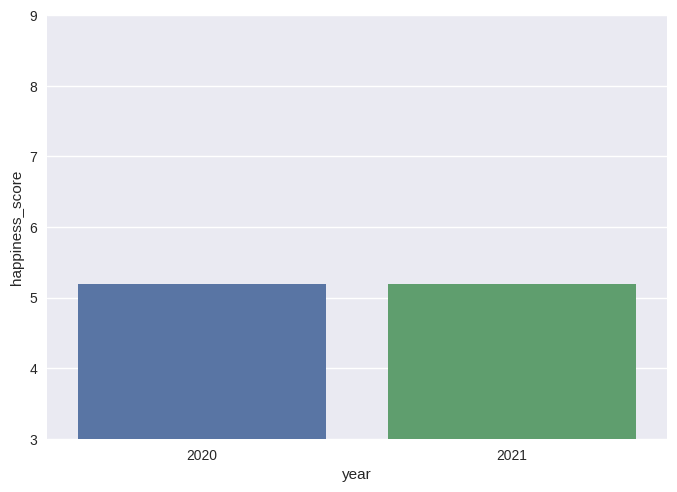

Congo
    year country region  happiness_score
98  2022   Congo  Congo            5.075


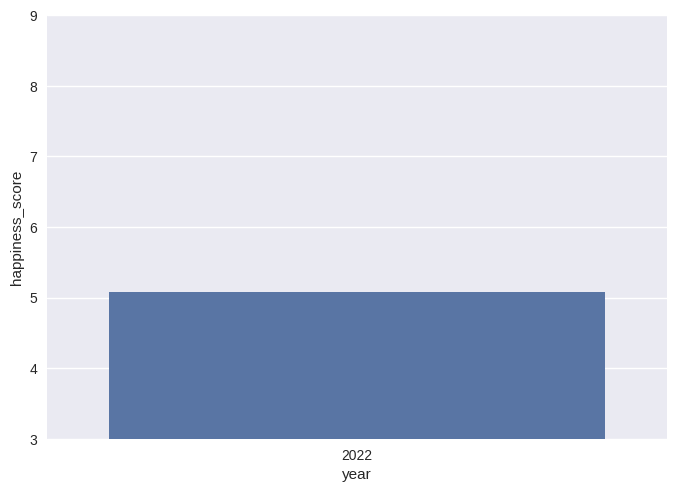

Palestinian Territories
     year                  country                   region  happiness_score
121  2022  Palestinian Territories  Palestinian Territories            4.483


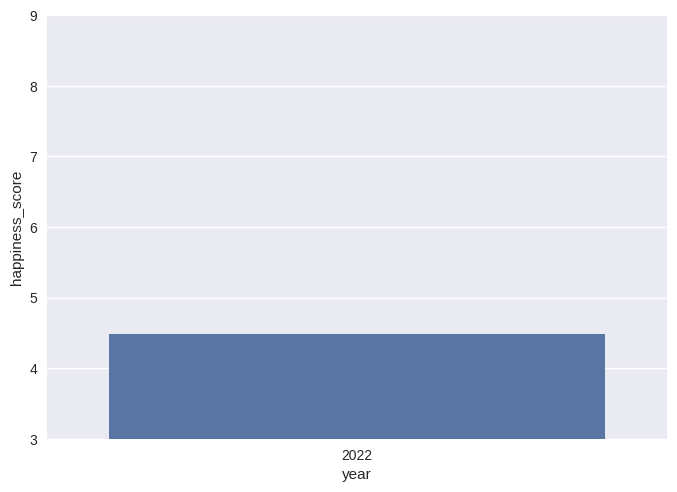

Eswatini, Kingdom of
     year               country                region  happiness_score
124  2022  Eswatini, Kingdom of  Eswatini, Kingdom of            4.396


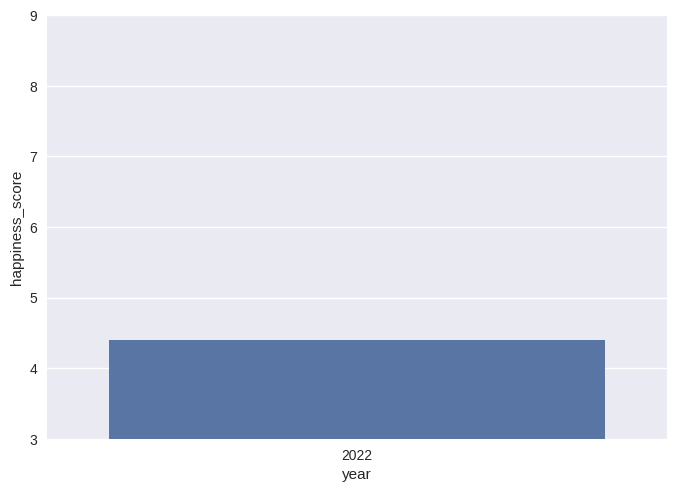

In [14]:
for country in df['country'].unique():
    df_country = df[df['country'] == country]
    print(country)
    print(df_country)
    sns.barplot(x = df_country['year'], y = df_country['happiness_score'])
    plt.ylim((3, 9))
    plt.show()

<Axes: xlabel='year', ylabel='happiness_score'>

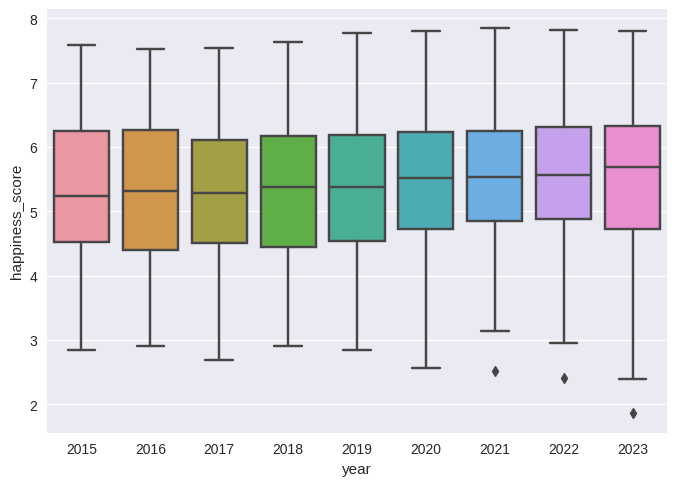

In [15]:
sns.boxplot(x=df['year'], y=df['happiness_score'])

In [25]:
print(df[df['year'] == 2015]['happiness_score'].median())
print(df[df['year'] == 2023]['happiness_score'].median())

5.2325
5.684
